<img src="https://github.com/FanyEstAg/Team-12-Proyecto-M4/blob/main/Imagenes/Worky.gif?raw=true" alt="Datos" title="Title text" />




# <font color=ED4DAE size = 7 face="Times New Roman"> **Ser Mujer en México, Estadísticas</font> <BR> <font size = 7 face="Calibri"> "Entorno Laboral"** </font>

<font size = 4 face="Calibri"> El presente trabajo aborda los 8 Postworks resultantes de los temas estudiados durante el **"Módulo 4: Análisis con Python"** de la tercera fase del **Programa: Becas Santander - BEDU - Disruptive Innovation: 3 caminos para impulsar tu carrera "Data Science"** impartido por el *TEAM BEDU* en alianza con *Santander*. 

<BR>

**TEAM BEDU:**

* **Dara Moreno,** *Learning Experience Executive*
* **Sergio Urbina,** *Expert*
* **Dalai Aguirre,** *Teaching Assistant*
* **Ulises Rodríguez,** *Teaching Assistant*

<BR>

La temática planteada da seguimiento al set de datos correspondiente a la incursión de las Mujeres en México en el ámbito laboral y las implicaciones que contrae consecuente al proyecto del *Módulo 3: Procesamiento con Python, Fase 2, TEAM-25.* 
</font>

<BR>

<font size = 4 face="Calibri" color=FB62CF> 
**TEAM 12:**

&#9674;  *Ana Machargo* <br>
&#9674;  *Angélica Rivera* <br>
&#9674;  *Estefanía Estrada* <br>
&#9674;  *Teresa Carrillo* <br>
</font>

<BR>

---

## 0 Importaciones

In [ ]:
%%html
<marquee style='width: 100%; color: #E44DED;'>
  <font size="4" face="Bookman Old Style" >
    <b>A continuación se importan las Bibliotecas/Módulos que usaremos a lo largo del proyecto</b>
  </font>
</marquee>

In [ ]:
#Importar Librerías
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew,kurtosis
import seaborn as sns
import matplotlib.pyplot as plt #Para graficar en Python
import re
import nltk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

## <font color=Deeppink> **1 Obteniendo estimados de locación y variabilidad** </font>

**OBJETIVO**

Utilizar estimados de locación y variabilidad para describir las columnas numéricas de un dataset.

**DESARROLLO**

Vamos a usar estimados de locación y variabilidad para describir nuestro dataset. Ya tenemos un dataset limpio, así que ahora toca extraer información útil de él.


<font color=4CABD9 size= 3 face="Courier"><blockquote>  **Recuerda que sólo es posible obtener estimados de locación y variabilidad cuando tenemos datos numéricos (tanto discretos como continuos).** </blockquote></font>

La actividad consiste en lo siguiente:

1. Identifica las columnas de tu dataset que tengan datos numéricos.
2. Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).
3. Obtén los siguientes estimados de tus columnas numéricas:
  * Promedio
  * Mediana  
  * Media Truncada 
  * Desviación estándar
  * Rango
  * Percentiles 25 y 75 (por lo menos)
  * Rango intercuartil



<img src="https://github.com/FanyEstAg/Team-12-Proyecto-M4/blob/main/Imagenes/Datos.jpg?raw=true" alt="Datos" title="Title text" />


### Motivos de Abandono del empleo

Retomando el Universo de datos utilizado en el proyecto anterior, obtenemos lo siguiente:

Vamos a Proceder a leer la información de los motivos de desempleo limpia del proyecto anterior ["Motivos de abandono de empleo"](https://raw.githubusercontent.com/teresacarrilloa/TEAM_12-Proyecto_M4/main/Archivos/motivos_desempleo_clean.csv) y almacenarlo en un dataframe para su exploración.


In [ ]:
#Lectura desde GitHub
df_desempleo_c = pd.read_csv("https://raw.githubusercontent.com/FanyEstAg/Team-12-Proyecto-M4/main/DataSets/motivos_desempleo_clean.csv" , sep = ',', encoding='utf-8' , index_col = 0)
df_desempleo_c.head()


primer_trimestre   total  ...  hombre_indefinido  mujer_indefinido
0              2010  609539  ...               3085               198
1              2011  628531  ...               1467              1439
2              2012  667781  ...               5808               607
3              2013  675433  ...               3679               879
4              2014  712369  ...               3854              1839

[5 rows x 40 columns]

Se eliminan las columnas correspondientes a los *totales por motivo de abandono de empleo*, debido a que cotamos con los motivos por género que en conjunto suman los totales, se puede simplificar el análisis eliminando la redundancia.

Los motivos indefinidos y otros no aportan un valor definido en el análisis, por lo que también se omitirán.

In [ ]:
df_desempleo = df_desempleo_c.drop(columns=['total',
                                            'total_conflictos_laborales',
                                            'total_sin_respuesta_exigencias',
                                            'total_condiciones_riesgosas',
                                            'total_acoso',
                                            'total_pension',
                                            'total_aumento_superacion',
                                            'total_independizarse',
                                            'total_retomar_estudios',
                                            'total_embarazo_familia',
                                            'total_un_familiar',
                                            'total_otros',
                                            'total_indefinido',
                                            'hombre_otros',
                                            'mujer_otros', 
                                            'hombre_indefinido', 
                                            'mujer_indefinido'])
df_desempleo.head()

primer_trimestre  total_hombre  ...  hombre_un_familiar  mujer_un_familiar
0              2010        312245  ...                1759              12104
1              2011        320328  ...                 444               9739
2              2012        348849  ...                2716               7551
3              2013        327429  ...                1036               8316
4              2014        362377  ...                1965               6952

[5 rows x 23 columns]

In [ ]:
df_desempleo.columns

Index(['primer_trimestre', 'total_hombre', 'total_mujer',
       'hombre_conflictos_laborales', 'mujer_conflictos_laborales',
       'hombre_sin_respuesta_exigencias', 'mujer_sin_respuesta_exigencias',
       'hombre_condiciones_riesgosas', 'mujer_condiciones_riesgosas',
       'hombre_acoso', 'mujer_acoso', 'hombre_pension', 'mujer_pension',
       'hombre_aumento_superacion', 'mujer_aumento_superacion',
       'hombre_independizarse', 'mujer_independizarse',
       'hombre_retomar_estudios', 'mujer_retomar_estudios',
       'hombre_embarazo_familia', 'mujer_embarazo_familia',
       'hombre_un_familiar', 'mujer_un_familiar'],
      dtype='object')

####  1. **Identificación de las columnas del dataset que tengan datos numéricos.**

Porcedemos a visualizar los tipos de dato que contiene el dataset



In [ ]:
df_desempleo.dtypes

primer_trimestre                   int64
total_hombre                       int64
total_mujer                        int64
hombre_conflictos_laborales        int64
mujer_conflictos_laborales         int64
hombre_sin_respuesta_exigencias    int64
mujer_sin_respuesta_exigencias     int64
hombre_condiciones_riesgosas       int64
mujer_condiciones_riesgosas        int64
hombre_acoso                       int64
mujer_acoso                        int64
hombre_pension                     int64
mujer_pension                      int64
hombre_aumento_superacion          int64
mujer_aumento_superacion           int64
hombre_independizarse              int64
mujer_independizarse               int64
hombre_retomar_estudios            int64
mujer_retomar_estudios             int64
hombre_embarazo_familia            int64
mujer_embarazo_familia             int64
hombre_un_familiar                 int64
mujer_un_familiar                  int64
dtype: object

Se aprecia que todos los tipos de datos son enteros, analizando a fondo la información obtenemos que: 

* La columna  **primer_trimestre** contiene los años a los que corresponde la información, esto es un *Dato Categórico Ordinal* 
* El resto de las columnas presentan las cantidades correspondientes al conteo de los abandonos de desempleo por género/motivo, es decir, *Datos Numéricos Discretos*.


#### 2. **Identificación de la relevancia de las columnas del dataset "Motivos de abandono de empleo"**

Las columnas más importantes para responder a la pregunta *¿Cuáles son los motivos de abandono de empleo más comunes siendo mujer?* serán aquellas que tengan la información correspondiente a las cifras de los motivos por los que las mujeres han abandonado su empleo, revisando todas las columnas obtenemos:



In [ ]:
df_desempleo.columns

Index(['primer_trimestre', 'total_hombre', 'total_mujer',
       'hombre_conflictos_laborales', 'mujer_conflictos_laborales',
       'hombre_sin_respuesta_exigencias', 'mujer_sin_respuesta_exigencias',
       'hombre_condiciones_riesgosas', 'mujer_condiciones_riesgosas',
       'hombre_acoso', 'mujer_acoso', 'hombre_pension', 'mujer_pension',
       'hombre_aumento_superacion', 'mujer_aumento_superacion',
       'hombre_independizarse', 'mujer_independizarse',
       'hombre_retomar_estudios', 'mujer_retomar_estudios',
       'hombre_embarazo_familia', 'mujer_embarazo_familia',
       'hombre_un_familiar', 'mujer_un_familiar'],
      dtype='object')

Resumiendo: las columnas de especial interés serán todas las que contienen cantidades de los casos de motivos de abandono de empleo para la mujer en México que se han presentado durante el primer trimestre de los años en cuestión y se tendrá como referncia las cifras de los motivos de abandono del empleo por parte de los hombres para poder realizar un comparativo.

#### 3. **Obtención de Estimados de Locación y Variabilidad**


##### Limpieza
Con la finalidad de omitir la columna **primer_trimestre** debido a que es un *dato categórico ordinal* obtenemos un dataframe para calcular los estimados de locación y variabilidad.

In [ ]:
df_desempleo_estim = df_desempleo.drop(columns=['primer_trimestre'])
df_desempleo_estim.columns

Index(['total_hombre', 'total_mujer', 'hombre_conflictos_laborales',
       'mujer_conflictos_laborales', 'hombre_sin_respuesta_exigencias',
       'mujer_sin_respuesta_exigencias', 'hombre_condiciones_riesgosas',
       'mujer_condiciones_riesgosas', 'hombre_acoso', 'mujer_acoso',
       'hombre_pension', 'mujer_pension', 'hombre_aumento_superacion',
       'mujer_aumento_superacion', 'hombre_independizarse',
       'mujer_independizarse', 'hombre_retomar_estudios',
       'mujer_retomar_estudios', 'hombre_embarazo_familia',
       'mujer_embarazo_familia', 'hombre_un_familiar', 'mujer_un_familiar'],
      dtype='object')

In [ ]:
#Dataframe final
df_desempleo_estim.head()

total_hombre  total_mujer  ...  hombre_un_familiar  mujer_un_familiar
0        312245       297294  ...                1759              12104
1        320328       308203  ...                 444               9739
2        348849       318932  ...                2716               7551
3        327429       348004  ...                1036               8316
4        362377       349992  ...                1965               6952

[5 rows x 22 columns]

Para visualizar mejor la comparativa de los motivos de desempleo entre mujeres y hombres se procede a reacomodar el Dataframe


In [ ]:
#Creacion de Dataframe con información de mujeres
df_desempleo_mujer = df_desempleo_estim[['total_mujer',
                                          'mujer_conflictos_laborales',
                                          'mujer_sin_respuesta_exigencias',
                                          'mujer_condiciones_riesgosas',
                                          'mujer_acoso',
                                          'mujer_pension',
                                          'mujer_aumento_superacion',
                                          'mujer_independizarse',
                                          'mujer_retomar_estudios',
                                          'mujer_embarazo_familia',
                                          'mujer_un_familiar']]

#Se renombran las columnas para conjuntar los dataframes                                        

df_desempleo_mujer.columns = ['total',
                              'conflictos_laborales',
                             'sin_respuesta_exigencias',
                             'condiciones_riesgosas',
                             'acoso',
                             'pension',
                             'aumento_superacion',
                             'independizarse',
                             'retomar_estudios',
                             'embarazo_familia',
                             'un_familiar']
df_desempleo_mujer.head()

total  conflictos_laborales  ...  embarazo_familia  un_familiar
0  297294                 22793  ...             76943        12104
1  308203                 19269  ...             82941         9739
2  318932                 29032  ...             96857         7551
3  348004                 23749  ...             91081         8316
4  349992                 19864  ...            103812         6952

[5 rows x 11 columns]

In [ ]:
#Creacion de Dataframe con información de hombrees
df_desempleo_hombre = df_desempleo_estim[['total_hombre',
                                          'hombre_conflictos_laborales',
                                          'hombre_sin_respuesta_exigencias',
                                          'hombre_condiciones_riesgosas',
                                          'hombre_acoso',
                                          'hombre_pension',
                                          'hombre_aumento_superacion',
                                          'hombre_independizarse',
                                          'hombre_retomar_estudios',
                                          'hombre_embarazo_familia',
                                          'hombre_un_familiar']]

#Se renombran las columnas para conjuntar los dataframes                                        

df_desempleo_hombre.columns = ['total',
                              'conflictos_laborales',
                             'sin_respuesta_exigencias',
                             'condiciones_riesgosas',
                             'acoso',
                             'pension',
                             'aumento_superacion',
                             'independizarse',
                             'retomar_estudios',
                             'embarazo_familia',
                             'un_familiar']
df_desempleo_hombre.head()

total  conflictos_laborales  ...  embarazo_familia  un_familiar
0  312245                 37552  ...              3037         1759
1  320328                 31967  ...              2453          444
2  348849                 44104  ...             14020         2716
3  327429                 31462  ...              6956         1036
4  362377                 35646  ...              5527         1965

[5 rows x 11 columns]

##### **Cálculo**
Se procede con la obtención de los estimados de Locación, Variabilidad y Orden.

In [ ]:
#Cálculo del Promedio de mujer y hombre
df_mot_prom_m = round(df_desempleo_mujer.mean(),2).to_frame(name='promedio_m').rename_axis('motivo')
df_mot_prom_h = round(df_desempleo_hombre.mean(),2).to_frame(name='promedio_h').rename_axis('motivo')

#Cálculo de la Mediana de mujer y hombre
df_mot_med_m = round(df_desempleo_mujer.median(),2).to_frame(name='mediana_m').rename_axis('motivo')
df_mot_med_h = round(df_desempleo_hombre.median(),2).to_frame(name='mediana_h').rename_axis('motivo')

#Cálculo de Media truncada de mujer
df_mot_medT_m = round(pd.DataFrame(stats.trim_mean(df_desempleo_mujer,0.1), 
                   index = ['total',
                              'conflictos_laborales',
                             'sin_respuesta_exigencias',
                             'condiciones_riesgosas',
                             'acoso',
                             'pension',
                             'aumento_superacion',
                             'independizarse',
                             'retomar_estudios',
                             'embarazo_familia',
                             'un_familiar'] ,
                   columns = ['media_trunc_m']),2).rename_axis('motivo')

#Cálculo de Media truncada de hombre
df_mot_medT_h = round(pd.DataFrame(stats.trim_mean(df_desempleo_hombre,0.1), 
                   index = ['total',
                              'conflictos_laborales',
                             'sin_respuesta_exigencias',
                             'condiciones_riesgosas',
                             'acoso',
                             'pension',
                             'aumento_superacion',
                             'independizarse',
                             'retomar_estudios',
                             'embarazo_familia',
                             'un_familiar'] ,
                   columns = ['media_trun_h']),2).rename_axis('motivo')

#Cálculo de la Desviación Estándar mujer y hombre
df_mot_ds_m = round(df_desempleo_mujer.std(),2).to_frame(name='desv_std_m').rename_axis('motivo')
df_mot_ds_h = round(df_desempleo_hombre.std(),2).to_frame(name='desv_std_h').rename_axis('motivo')

#Cálculo del Rango mujer y hombre
df_mot_rango_m = round(df_desempleo_mujer.max() - df_desempleo_mujer.min(),2).to_frame(name='rango_m').rename_axis('motivo')
df_mot_rango_h = round(df_desempleo_hombre.max() - df_desempleo_hombre.min(),2).to_frame(name='rango_h').rename_axis('motivo')

#Cálculo de Mínimo  mujer y hombre 
df_mot_min_m = round(df_desempleo_mujer.min(),2).to_frame(name='min_m').rename_axis('motivo')
df_mot_min_h = round(df_desempleo_hombre.min(),2).to_frame(name='min_h').rename_axis('motivo')

#Cálculo de Percentiles  25 mujer y hombre 
df_mot_per_25_m = round(df_desempleo_mujer.quantile(0.25),2).to_frame(name='percentil_25_m').rename_axis('motivo')
df_mot_per_25_h = round(df_desempleo_hombre.quantile(0.25),2).to_frame(name='percentil_25_h').rename_axis('motivo')

#Cálculo de Percentiles 50 mujer y hombre 
df_mot_per_50_m = round(df_desempleo_mujer.quantile(0.50),2).to_frame(name='percentil_50_m').rename_axis('motivo')
df_mot_per_50_h = round(df_desempleo_hombre.quantile(0.50),2).to_frame(name='percentil_50_h').rename_axis('motivo')

#Cálculo de Percentiles 75 mujer y hombre
df_mot_per_75_m = round(df_desempleo_mujer.quantile(0.75),2).to_frame(name='percentil_75_m').rename_axis('motivo')
df_mot_per_75_h = round(df_desempleo_hombre.quantile(0.75),2).to_frame(name='percentil_75_h').rename_axis('motivo')

#Cálculo de Máximo  mujer y hombre 
df_mot_max_m = round(df_desempleo_mujer.max(),2).to_frame(name='max_m').rename_axis('motivo')
df_mot_max_h = round(df_desempleo_hombre.max(),2).to_frame(name='max_h').rename_axis('motivo')

#Cálculo de Rango intercuartil mujer y hombre
df_mot_rango_i_m = round(df_desempleo_mujer.quantile(0.75) - df_desempleo_mujer.quantile(0.25) ,2).to_frame(name='iqr_m').rename_axis('motivo')
df_mot_rango_i_h = round(df_desempleo_hombre.quantile(0.75) - df_desempleo_hombre.quantile(0.25) ,2).to_frame(name='iqr_h').rename_axis('motivo')

#Concatenación de todos los estimados de locación, variuabilidad y orden
df_motivos_estimados_lov = pd.concat([df_mot_prom_m,df_mot_prom_h,
           df_mot_med_m,df_mot_med_h,
           df_mot_medT_m,df_mot_medT_h,
           df_mot_ds_m,df_mot_ds_h,
           df_mot_rango_m,df_mot_rango_h,
           df_mot_min_m,df_mot_min_h,
           df_mot_per_25_m,df_mot_per_25_h,
           df_mot_per_50_m,df_mot_per_50_h,
           df_mot_per_75_m,df_mot_per_75_h,
           df_mot_max_m,df_mot_max_h,
           df_mot_rango_i_m,df_mot_rango_i_h
           ], axis=1)

df_motivos_estimados_lov






promedio_m  promedio_h  ...    iqr_m    iqr_h
motivo                                            ...                  
total                      353553.18   362284.45  ...  58886.5  41535.0
conflictos_laborales        23381.82    36333.82  ...   3648.0   6012.5
sin_respuesta_exigencias     2882.64     8391.55  ...   1650.0   4958.0
condiciones_riesgosas       48597.55    64006.27  ...   5227.0  15001.0
acoso                        9511.00     9430.91  ...   2659.0   3962.0
pension                     13113.73    18644.55  ...   2445.0   4338.0
aumento_superacion          41594.18    77387.82  ...   9038.0  15109.0
independizarse               1824.55     4757.45  ...   1005.5   1793.5
retomar_estudios            46355.64    72565.09  ...  15640.0  13126.5
embarazo_familia           102316.55     7416.91  ...  17974.0   4552.0
un_familiar                  8294.45     2074.18  ...   2555.5    661.0

[11 rows x 22 columns]

##### Observaciones:

* **Promedios**

  * Del universo total en promedio son más hombres que mujeres, con cifras muy cercanas.

  * Los motivos de acoso, embarazo_familia y un_familiar fueron cifras de mayor peso para que en promedio una mujer abandone su empleo respecto a los hombres.

  * Los motivos de sin_respuesta_a_exigencias, superación e independizarse en promedio fueron más recurrentes por los hombres que por las mujeres con una diferencia mayor.

* **Mediana**

  * Se puede apreciar que el único motivo que ha presentado diferencia respecto de la tendencia comparada con los promedios es *acoso* debido a que la **media** del acoso a la mujer **(9349.0)** es menor respecto del **promedio (9511.00)** lo cuál nos indica que las cifras son en general menores al promedio.

 * En el caso de los hombres las cifras de **acoso** respecto del **promedio (9430.91)** en comparación con la **media (9515.0)** presentaron una diferencia que nos indica que el motivo de abandono de empleo de *acoso* es más frecuente en hombres que en mujeres.

* **Media Truncada**

 * Analizando el motivo de desempleo de **acoso** obtenemos que:

   * Se valida la presencia de valores atípicos en los datos de motivo **mujer_acoso** y **hombre_acoso** debido a que hay variaciones, pero se confirma que los motivos de acoso son mayormente en hombres.

* **Desviación estándar**

 * La desviación estándar del motivo **embarazo_familia**  en mujeres chico en comapración con la mediana lo cuál nos Indica que los valores están dispersos en la distribusión.

* **Rango**

 * Los motivos de abandono de empleo en mujeres con mayor diferencia son: **embarazo_familia** y **retomar_estudios**

  * Los motivos de abandono de empleo en mujeres con menor diferencia son: **independizarse** y **un_familiar**

* **Percentiles**

 * El 75% de los datos referentes al motivo **sin_respuesta_exigencias** en mujeres presenta valores por debajo de la media por lo que la tendencia es hacia los valores mínimos.

* **Rango Intercuartílico**

  * El motivo con e mayor rango intercuartílico en mujere es **embarazo_familia**

  * El motivo que ha presentado el mayor rango intercuartílico en hombre es **aumento_superación**

### Ingresos: Salarios Mínimos

Dando continuidad al tema del proyecto del módulo anterior "Salarios mínimos" se tiene el siguiente dataset ["Data Salarios mínimos"](https://github.com/FanyEstAg/Team-12-Proyecto-M4/blob/main/DataSets/salarios_final.csv) que se empleo para el actual proyecto.

In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_salarios = pd.read_csv("https://github.com/FanyEstAg/Team-12-Proyecto-M4/blob/main/DataSets/salarios_final.csv")

In [ ]:
df_salarios

Año  1 salario min  ...  Mujeres que tuvieron ingresos         Total
0   2010   3.166228e+06  ...                   1.320142e+07  1.598189e+07
1   2011   3.135121e+06  ...                   1.330074e+07  1.612519e+07
2   2012   3.473775e+06  ...                   1.396711e+07  1.686455e+07
3   2013   3.491178e+06  ...                   1.418267e+07  1.686846e+07
4   2014   3.406479e+06  ...                   1.409430e+07  1.661602e+07
5   2015   3.699776e+06  ...                   1.461491e+07  1.707233e+07
6   2016   4.150490e+06  ...                   1.507338e+07  1.743647e+07
7   2017   4.003263e+06  ...                   1.516264e+07  1.730905e+07
8   2018   4.577459e+06  ...                   1.568357e+07  1.780952e+07
9   2019   5.817418e+06  ...                   1.693679e+07  1.893318e+07
10  2020   6.145151e+06  ...                   1.661093e+07  1.830163e+07

[11 rows x 9 columns]

In [ ]:
df_salarios_general=df_salarios.iloc[:,1:9]#decada
df_salarios_2010=df_salarios.iloc[0,1:7]#solo salarios
df_salarios_2019=df_salarios.iloc[9,1:7]

In [ ]:
#Generamos una nuevp df  para visualizar y comparar mejor los estimados promediales de los años
df_estimados_general=pd.DataFrame({
   
        'Media' : round(df_salarios_general.mean(), 2),
        'Mediana' : round(df_salarios_general.median(),2),
        'Media Truncada' : stats.trim_mean(df_salarios_general, 0.1),
        'Desviacion Estandar' : round(df_salarios_general.std(),2),
        'Rango' : round(df_salarios_general.max() - df_salarios_general.min(),2),
        'Minimo' : df_salarios_general.min(),
        'Percentil 10' : round(df_salarios_general.quantile(0.1),2),
        'Percentil 25' : round(df_salarios_general.quantile(0.25),2),
        'Percentil 50' : round(df_salarios_general.median(),2),
        'Percentil 75' : round(df_salarios_general.quantile(0.75),2),
        'Percentil 90' : round(df_salarios_general.quantile(0.9),2),
        'Maximo' : df_salarios_general.max(),
        'Rango intercuantil' : round(df_salarios_general.quantile(0.75) - df_salarios_general.quantile(0.25),2)
})


In [ ]:
df_estimados_general

Media  ...  Rango intercuantil
1 salario min                   4096939.90  ...           923847.62
Más de 1 hasta 2 salarios min   5599139.55  ...           872691.12
Más de 2 hasta 3 salarios min   3122881.45  ...           316102.12
Más de 3 hasta 5 salarios min   1983625.27  ...           266803.75
Más de 5 salarios min            883257.68  ...           394624.38
Sin ingresos                    1524909.02  ...           179160.88
Mujeres que tuvieron ingresos  14802586.17  ...          1392395.62
Total                          17210752.88  ...           882708.62

[8 rows x 13 columns]

A partir de la información de esta tabla es más fácil comparar el avance que se ha tenido a lo largo de los años teniendo así que aún cuando hay una grande cantidad de mujeres con salario, estos  salrios suelen estar entre 1 y 2, siendo el porcentaje de mujeres con más de 5 salarios muy bajo.



### Prestaciones Laborales; diferencias entre hombres y mujeres.

Las prestaciones se consideran como un beneficio del trabajador por parte de la empresa, este beneficio no debe hacer distinción entre género, religión, clases sociales o partido político. Es por parte de la Ley Federal del Trabajo que las prestaciones mínimas sean: vacaciones, seguro social y prima vacacional.

####Preguntas a resolver
- ¿Cómo se ven afectadas con los años las prestaciones laborales para la mujer?
- ¿Existe alguna diferencia entre hombres y mujeres al tratarse de prestaciones laborales?
- ¿Cuáles son los estados que han otorgado más prestaciones laborales a las mujeres?

Se importan las librerias necesarias:

In [ ]:
import pandas as pd
import numpy as np

Obtenemos la base de datos con la que vamos a trabajar, en este caso se recaban 2 bases de datos para poder comparar una con otra.
Tenemos 2, la primera donde solamente se observan las prestaciones que reciben los hombres y la segunda solamente las que reciben las mujeres.

In [ ]:
prestaciones_H = pd.read_csv("https://raw.githubusercontent.com/FanyEstAg/Team-12-Proyecto-M4/main/DataSets/Pregunta_7-Prestaciones-CON-Hombres.csv", index_col=0)
prestaciones_M = pd.read_csv("https://raw.githubusercontent.com/FanyEstAg/Team-12-Proyecto-M4/main/DataSets/Pregunta_7-Prestaciones-CON-Mujeres.csv", index_col=0)

2010  ...            2020.2
Entidades                              ...                  
Trimestre            Primer trimestre  ...  Cuarto trimestre
Nacional                      7325100  ...           9754463
Aguascalientes                  94624  ...            135619
Baja California                282467  ...            422704
Baja California Sur             56189  ...             94561

[5 rows x 43 columns]

En esta ocación dejaremos solamente el primer trimestres de cada año, esto para observar solamente la diferencia anual en general.

In [ ]:
primer_trimestre = ['2010', '2011', '2012','2013','2014','2015','2016','2017','2018','2019','2020']
prestaciones_H_1er_T = prestaciones_H.filter(items=primer_trimestre)
prestaciones_M_1er_T = prestaciones_M.filter(items=primer_trimestre)

#Borramos las filas Trimestre y Nacional, ya que pueden causarnos problemas después
prestaciones_H_1er_T = prestaciones_H_1er_T.drop(['Trimestre'], axis=0)
prestaciones_M_1er_T = prestaciones_M_1er_T.drop(['Trimestre'], axis=0)

####Explorando el data frame

In [ ]:
#Dimensiones
print(prestaciones_H_1er_T.shape)
print(prestaciones_M_1er_T.shape)

(33, 11)
(33, 11)


In [ ]:
#Buscamos valores NaN
prestaciones_H_1er_T.isna().sum(axis=0)

2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
dtype: int64

In [ ]:
prestaciones_M_1er_T.isna().sum(axis=0)

2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
dtype: int64

In [ ]:
#Verificamos que los datos esten segun su tipo de datos
prestaciones_H_1er_T.dtypes

2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
2019    object
2020    object
dtype: object

In [ ]:
prestaciones_M_1er_T.dtypes

2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
2019    object
2020    object
dtype: object

In [ ]:
#Como todos los datos son enteros, lo mejor es transformarlos a entero/int
prestaciones_H_1er_T[primer_trimestre] = prestaciones_H_1er_T[primer_trimestre].astype(int)
prestaciones_H_1er_T.dtypes

2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
2020    int64
dtype: object

In [ ]:
prestaciones_M_1er_T[primer_trimestre] = prestaciones_M_1er_T[primer_trimestre].astype(int)
prestaciones_M_1er_T.dtypes

2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
2020    int64
dtype: object

In [ ]:
#Información completa de las bases de datos
prestaciones_H_1er_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Nacional to Zacatecas
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2010    33 non-null     int64
 1   2011    33 non-null     int64
 2   2012    33 non-null     int64
 3   2013    33 non-null     int64
 4   2014    33 non-null     int64
 5   2015    33 non-null     int64
 6   2016    33 non-null     int64
 7   2017    33 non-null     int64
 8   2018    33 non-null     int64
 9   2019    33 non-null     int64
 10  2020    33 non-null     int64
dtypes: int64(11)
memory usage: 3.1+ KB


In [ ]:
prestaciones_M_1er_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Nacional to Zacatecas
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2010    33 non-null     int64
 1   2011    33 non-null     int64
 2   2012    33 non-null     int64
 3   2013    33 non-null     int64
 4   2014    33 non-null     int64
 5   2015    33 non-null     int64
 6   2016    33 non-null     int64
 7   2017    33 non-null     int64
 8   2018    33 non-null     int64
 9   2019    33 non-null     int64
 10  2020    33 non-null     int64
dtypes: int64(11)
memory usage: 3.1+ KB


In [ ]:
#Columnas
prestaciones_M_1er_T.columns

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [ ]:
prestaciones_H_1er_T.columns

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

####¿Cómo se ven afectadas con los años las prestaciones laborales para la mujer?

In [ ]:
#Usamos nadamás la base de datos de Mujeres
prestaciones_M_1er_T.head()

2010     2011     2012  ...     2018     2019      2020
Entidades                                       ...                            
Nacional             7325100  7518613  7891668  ...  9254751  9496762  10221359
Aguascalientes         94624    93572    98046  ...   125416   125965    141030
Baja California       282467   283223   300310  ...   396530   431646    423405
Baja California Sur    56189    59320    71189  ...    87792   101794    106203
Campeche               54060    57373    61979  ...    63013    65086     69235

[5 rows x 11 columns]

Vamos a comparar la diferencia que hay entre el año 2010 y 2020

In [ ]:
#Filtramos nadamás los años 2010 y 2020
prestaciones_M_1er_T[['2010','2020']].head()

2010      2020
Entidades                             
Nacional             7325100  10221359
Aguascalientes         94624    141030
Baja California       282467    423405
Baja California Sur    56189    106203
Campeche               54060     69235

In [ ]:
#Añadimos una columna con la diferencia de entre esas dos
diferencia = prestaciones_M_1er_T['2020'] - prestaciones_M_1er_T['2010']
cambio_prestaciones_M = prestaciones_M_1er_T[['2010','2020']].assign(Diferencia=diferencia)
cambio_prestaciones_M.head()

2010      2020  Diferencia
Entidades                                         
Nacional             7325100  10221359     2896259
Aguascalientes         94624    141030       46406
Baja California       282467    423405      140938
Baja California Sur    56189    106203       50014
Campeche               54060     69235       15175

In [ ]:
 cambio_prestaciones_M = cambio_prestaciones_M.sort_values('Diferencia', ascending = False)
 cambio_prestaciones_M.head()

2010      2020  Diferencia
Entidades                                
Nacional    7325100  10221359     2896259
Mexico       930925   1289544      358619
Jalisco      581246    812700      231454
Guanajuato   381212    601412      220200
Chihuahua    268294    461645      193351

In [ ]:
cambio_prestaciones_M.tail()

2010    2020  Diferencia
Entidades                            
Tabasco    126031  155745       29714
Oaxaca     115565  144424       28859
Guerrero   120620  146858       26238
Colima      56900   78401       21501
Campeche    54060   69235       15175

Si observamos bien, en ningun estado la diferencia es negativa y con los años esta ha incrementado en gran medida. Vemos también que el estado de México es el que más incrementos en prestaciones ha tenido y por el contrario, Campeche es el más bajo, casi no ha cambiado en los últimos 10 años.

####¿Existe alguna diferencia entre hombres y mujeres al tratarse de prestaciones laborales?

In [ ]:
#Para esto obtendremos la diferencia anterior pero esta vez con la base de datos de los hombres, para observar si hay diferencias con los años
diferencia = prestaciones_H_1er_T['2020'] - prestaciones_H_1er_T['2010']
cambio_prestaciones_H = prestaciones_H_1er_T[['2010','2020']].assign(Diferencia=diferencia)
cambio_prestaciones_H = cambio_prestaciones_H.sort_values('Diferencia', ascending = False)
cambio_prestaciones_H.head()

2010      2020  Diferencia
Entidades                                 
Nacional    10847815  14408709     3560894
Mexico       1531097   1952944      421847
Jalisco       819641   1162704      343063
Guanajuato    558089    838406      280317
Nuevo Leon    763113    998491      235378

In [ ]:
#Vamos a renombrar las columnas en ambos
cambio_prestaciones_H = cambio_prestaciones_H.rename(columns={'2010': 'Hombres en 2010',
                                                              '2020': 'Hombres en 2020',
                                                              'Diferencia': 'Diferencia Hombres'})
cambio_prestaciones_M = cambio_prestaciones_M.rename(columns={'2010': 'Mujeres en 2010',
                                                              '2020': 'Mujeres en 2020',
                                                              'Diferencia': 'Diferencia Mujeres'})

In [ ]:
#Ahora los uniremos
diferencia_entre_HyM = pd.merge(cambio_prestaciones_M,cambio_prestaciones_H, on="Entidades", how='outer')
diferencia_entre_HyM = diferencia_entre_HyM[['Mujeres en 2010', 'Hombres en 2010', 'Mujeres en 2020', 'Hombres en 2020', 'Diferencia Mujeres', 'Diferencia Hombres']]

In [ ]:
diferencia_entre_HyM.head()

Mujeres en 2010  ...  Diferencia Hombres
Entidades                    ...                    
Nacional            7325100  ...             3560894
Mexico               930925  ...              421847
Jalisco              581246  ...              343063
Guanajuato           381212  ...              280317
Chihuahua            268294  ...              226020

[5 rows x 6 columns]

In [ ]:
diferencia_entre_HyM.tail()

Mujeres en 2010  ...  Diferencia Hombres
Entidades                   ...                    
Tabasco             126031  ...               35239
Oaxaca              115565  ...               30335
Guerrero            120620  ...               28150
Colima               56900  ...               38347
Campeche             54060  ...               11542

[5 rows x 6 columns]

Observamos que la diferencia en estos ultimos años es demasiado alta, no es el doble pero sí lo suficiente para notar la diferencia entre ambos sexos. Esto se puede pensar que es porque hay hombres que trabajan en una empresa, pero no deja de ser un gran cambio entre los dos.

####¿Cuáles son los estados que han otorgado más prestaciones laborales a las mujeres?

In [ ]:
promedio_estados= prestaciones_M_1er_T.mean(axis=1)
promedio_estados = pd.DataFrame(promedio_estados, columns=['Promedio'])
promedio_estados.sort_values('Promedio',ascending=False).head(11)

Promedio
Entidades                                    
Nacional                         8.594607e+06
Mexico                           1.104428e+06
Ciudad de Mexico                 9.884871e+05
Jalisco                          6.802430e+05
Nuevo Leon                       5.135896e+05
Guanajuato                       4.687508e+05
Veracruz de Ignacio de la Llave  3.602400e+05
Chihuahua                        3.548424e+05
Baja California                  3.535344e+05
Tamaulipas                       3.217044e+05
Coahuila de Zaragoza             2.849003e+05

Los 5 estados que han proporcionado mayores prestaciones a la mujer son *Mexico*, *La Ciudad de Mexico*, *Jalisco*, *Nuevo Leon* y *Guanajuato*.

In [ ]:
promedio_estados.sort_values('Promedio',ascending=True).head(10)

Promedio
Entidades                         
Campeche              60714.000000
Tlaxcala              62073.090909
Colima                67027.363636
Baja California Sur   79998.727273
Zacatecas             85240.090909
Nayarit               93324.454545
Morelos              111149.090909
Aguascalientes       112316.545455
Oaxaca               125393.727273
Durango              126308.181818

Mientras que *Campeche*, *Tlaxcala*, *Colima*, *Baja California Sur* y *Zacatecas*, son los que menos prestaciones han proporcionado en los últimos  10 años.

In [ ]:
prestaciones_M_1er_T_snN = prestaciones_M_1er_T.drop(['Nacional'], axis=0)
prestaciones_H_1er_T_snN = prestaciones_H_1er_T.drop(['Nacional'], axis=0)

## <font color=Deeppink>  **2 Introducción a la visualización de datos: Distribuciones** </font>

**OBJETIVO**

* Utilizar boxplots para visualizar distribuciones
* Filtrar valores atípicos usando el Score de Rango Intercuartílico
* Caracterizar nuestras distribuciones usando tablas de frecuencias, histogramas y gráficas de densidad

**REQUISITOS**

* Tener un dataset limpio
* Tener una serie de preguntas que queremos contestar usando nuestro dataset

**DESARROLLO**

En este Postwork vamos a explorar las distribuciones de las variables numéricas que tengamos en nuestro dataset. Realiza los siguientes procesos en los casos en los que tenga sentido aplicarlos:

* Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.
* Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.
* Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. 
* Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.
* Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

#### Motivos de Abandono del empleo

##### Boxplot

Retomando Set de Datos que contiene los motivos de desempleo para mujeres y hombres:

In [ ]:
df_desempleo.head()

primer_trimestre  total_hombre  ...  hombre_un_familiar  mujer_un_familiar
0              2010        312245  ...                1759              12104
1              2011        320328  ...                 444               9739
2              2012        348849  ...                2716               7551
3              2013        327429  ...                1036               8316
4              2014        362377  ...                1965               6952

[5 rows x 23 columns]

En donde procedemos a eliminar las columnas de totales y primer trimestre debido a que salen de rango y no permiten una clara visualización de los motivos de desempleo para mujeres comparados con los hombres.

In [ ]:
#omitiendo totales y trimestre
df_des_motis= df_desempleo.drop(columns=['primer_trimestre','total_hombre','total_mujer'])

''

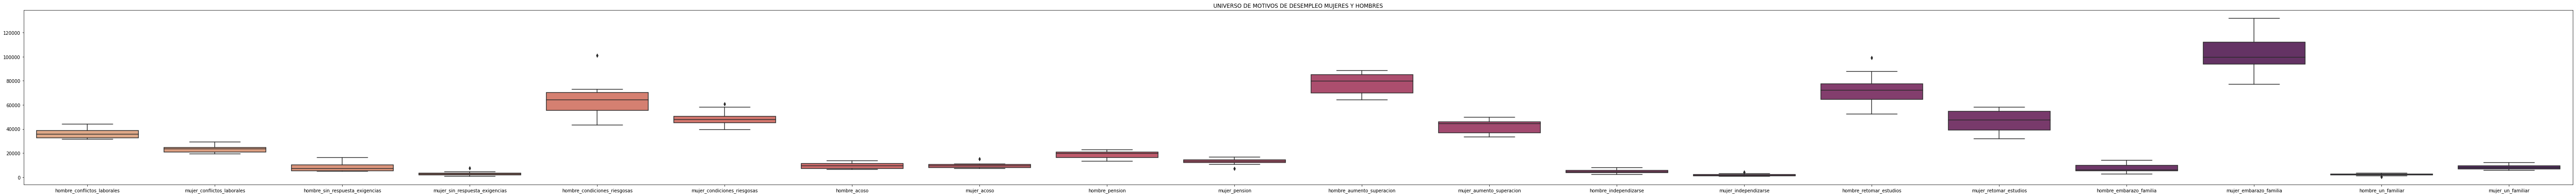

In [ ]:
plt.figure(figsize=(100,7))
plt.title("UNIVERSO DE MOTIVOS DE DESEMPLEO MUJERES Y HOMBRES") 
sns.set(style="whitegrid")
sns.boxplot(palette="flare" , data=df_des_motis)
;

Se puede deducir que: 

* El motivo **conflitos_laborales** presenta menor cantidad en el caso de mujeres lo cuál es esperado debido a que la cantidad de hombres en total es ligeramente mayor. No obstante la mayo cantidad de casos en mujeres se inclina hacia los valores más mínimos.

* El motivo **sin_respuesta_exigencias** presenta menores cantidades para las mujeres incluyendo un dato atípico hacia los valores más altos, pero no demasiado alto.

* El motivo **condiciones_riesgosas** es más frecuente por parte de los hombres incluyendo un valor atípico demasiado elevado.

* El motivo de **acoso** se presenta en similitud de cantidades, presentando valor atípico hacia valores máximos en el caso de las mujeres.

* En el motivo de **pension** puede apreciarse que en el caso de las mujeres es menor la cantidad y que inclusive hay valor atípico hacia el mínimo.

* Para el motivo de **aumento_superacion** se aprecia que los hombres han sido más beneficiados, pues en el caso de las mujeres se han visto menos casos y entre ellos la mayoría se concentra en los valores mínimos.

* El motivo de **independizarse** en el caso de las mujeres presenta un dato atípico hacia el máximo, no obstante la cantidad es menor a la del caso de los hombres.

* Bajo el motivo de **retomar_estudios** los hombres han presentado valores atípicos hacia el máximo y han superado a las cantidades de mujeres.

* El motivo de **embarazo_familia** presenta la diferencia más marcada de todas hacia las mujeres ya que es el motivo con la más alta cantidad de casos superando por mucho al de los hombres, inclusive la mayoría de los casos se concentra en los valores máximos.

* Para el motivo de **un_familar** los hombres presentan menores cantidades y valores atípicos a los mínimos en comparación con las mujeres.

##### IQR - Score

Procedemos a filtrar los datos atípicos en los motivos de mujeres que los presentaron los motivos de: **sin_respuesta_exigencias** y **pension** .




In [ ]:
# Compendio IQR,Q25, Q75
df_mot_filtros=df_motivos_estimados_lov.iloc[[2,5],[12,16,20]]
df_mot_filtros = df_mot_filtros.assign( iqr_por_1_punto_5 = df_mot_filtros['iqr_m']*1.5)
df_mot_filtros

percentil_25_m  ...  iqr_por_1_punto_5
motivo                                    ...                   
sin_respuesta_exigencias          1685.0  ...             2475.0
pension                          12029.5  ...             3667.5

[2 rows x 4 columns]

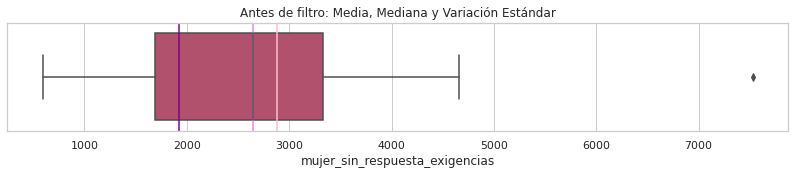

In [ ]:
plt.figure(figsize=(14,2))
plt.title("Antes de filtro: Media, Mediana y Variación Estándar") 
sns.set(style="whitegrid")
sns.boxplot(palette="flare" , x=df_desempleo['mujer_sin_respuesta_exigencias'])
plt.axvline(df_desempleo['mujer_sin_respuesta_exigencias'].mean(),c='pink')
plt.axvline(df_desempleo['mujer_sin_respuesta_exigencias'].std(),c='purple')
plt.axvline(df_desempleo['mujer_sin_respuesta_exigencias'].median(),c='violet');

''

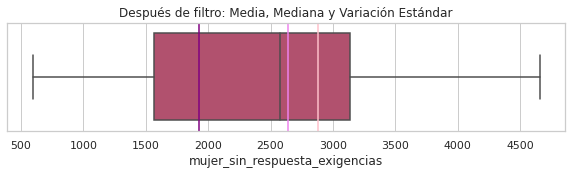

In [ ]:
# CALCULANDO FILTROS
iqr_MSRE = df_desempleo['mujer_sin_respuesta_exigencias'].quantile(0.75) - df_desempleo['mujer_sin_respuesta_exigencias'].quantile(0.25)
fil_inf_MSRE=df_desempleo['mujer_sin_respuesta_exigencias'] > df_desempleo['mujer_sin_respuesta_exigencias'].quantile(0.25) - (iqr_MSRE *1.5)
fil_sup_MSRE=df_desempleo['mujer_sin_respuesta_exigencias'] < df_desempleo['mujer_sin_respuesta_exigencias'].quantile(0.75) + (iqr_MSRE *1.5)

df_fil_MSRE = df_desempleo[fil_inf_MSRE & fil_sup_MSRE]
plt.figure(figsize=(10,2))
plt.title("Después de filtro: Media, Mediana y Variación Estándar") 
sns.boxplot(palette="flare" , x= df_fil_MSRE['mujer_sin_respuesta_exigencias'])
plt.axvline(df_desempleo['mujer_sin_respuesta_exigencias'].mean(),c='pink')
plt.axvline(df_desempleo['mujer_sin_respuesta_exigencias'].std(),c='purple')
plt.axvline(df_desempleo['mujer_sin_respuesta_exigencias'].median(),c='violet')
;

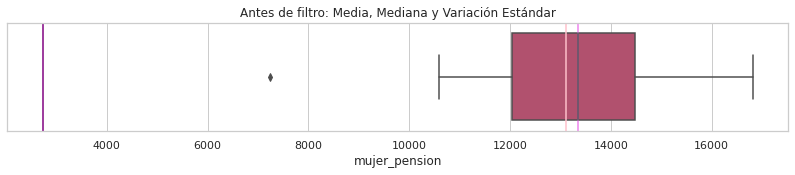

In [ ]:
plt.figure(figsize=(14,2))
plt.title("Antes de filtro: Media, Mediana y Variación Estándar") 
sns.set(style="whitegrid")
sns.boxplot(palette="flare" , x=df_desempleo['mujer_pension'])
plt.axvline(df_desempleo['mujer_pension'].mean(),c='pink')
plt.axvline(df_desempleo['mujer_pension'].std(),c='purple')
plt.axvline(df_desempleo['mujer_pension'].median(),c='violet');

''

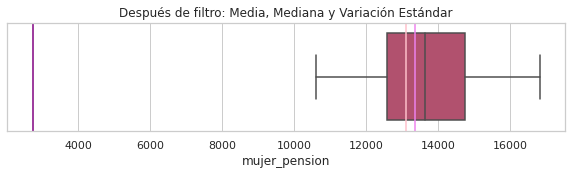

In [ ]:
# CALCULANDO FILTROS
iqr_MP = df_desempleo['mujer_pension'].quantile(0.75) - df_desempleo['mujer_pension'].quantile(0.25)
fil_inf_MP=df_desempleo['mujer_pension'] > df_desempleo['mujer_pension'].quantile(0.25) - (iqr_MP *1.5)
fil_sup_MP=df_desempleo['mujer_pension'] < df_desempleo['mujer_pension'].quantile(0.75) + (iqr_MP *1.5)

df_fil_MP = df_desempleo[fil_inf_MP & fil_sup_MP]
plt.figure(figsize=(10,2))
plt.title("Después de filtro: Media, Mediana y Variación Estándar") 
sns.boxplot(palette="flare" , x= df_fil_MP['mujer_pension'])
plt.axvline(df_desempleo['mujer_pension'].mean(),c='pink')
plt.axvline(df_desempleo['mujer_pension'].std(),c='purple')
plt.axvline(df_desempleo['mujer_pension'].median(),c='violet')
;

##### Tablas de Frecuencias

In [ ]:
t_frec_MSRE=df_desempleo['mujer_sin_respuesta_exigencias']
#Rango para dividir en segmentos
t_frec_MSRE.max()-t_frec_MSRE.min()

6938

In [ ]:
seg_MSRE=pd.cut(t_frec_MSRE, 5)
seg_MSRE

0      (1979.6, 3367.2]
1     (585.062, 1979.6]
2     (585.062, 1979.6]
3      (3367.2, 4754.8]
4      (1979.6, 3367.2]
5     (585.062, 1979.6]
6      (1979.6, 3367.2]
7      (3367.2, 4754.8]
8      (1979.6, 3367.2]
9     (585.062, 1979.6]
10     (6142.4, 7530.0]
Name: mujer_sin_respuesta_exigencias, dtype: category
Categories (5, interval[float64]): [(585.062, 1979.6] < (1979.6, 3367.2] < (3367.2, 4754.8] <
                                    (4754.8, 6142.4] < (6142.4, 7530.0]]

In [ ]:
df_desempleo['mujer_sin_respuesta_exigencias'].groupby(seg_MSRE).count()

mujer_sin_respuesta_exigencias
(585.062, 1979.6]    4
(1979.6, 3367.2]     4
(3367.2, 4754.8]     2
(4754.8, 6142.4]     0
(6142.4, 7530.0]     1
Name: mujer_sin_respuesta_exigencias, dtype: int64

Se aprecia que la tendencia es hacia los mñínimos en el caso del motivo de abandono de empleo por parte de las mujeres de **no responde a exigencias** con un valor atípico.

##### Histogramas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


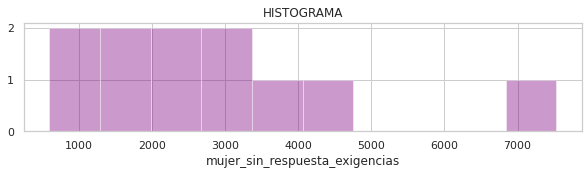

In [ ]:
plt.figure(figsize=(10,2))
plt.title("HISTOGRAMA") 

sns.distplot(df_desempleo['mujer_sin_respuesta_exigencias'], kde = False, norm_hist= False, bins = 10, color="purple");

Se aprecia una distribución asimétrica positiva

##### Curtosis


In [ ]:
#Generación de dataframe para calculo de curtosis y asimetria
df_des_curt_MSRE= df_desempleo['mujer_sin_respuesta_exigencias']
df_des_curt_MSRE

0     2642
1     1441
2     1009
3     4659
4     3280
5     1929
6     2514
7     3390
8     2723
9      592
10    7530
Name: mujer_sin_respuesta_exigencias, dtype: int64

In [ ]:
print(f'Curtosis: {kurtosis(df_des_curt_MSRE)}')
print(f'Asimetria: {skew(df_des_curt_MSRE)}')

Curtosis: 1.160609530307461
Asimetria: 1.2259910343397717


##### Graficas de densidad

In [ ]:
#Generación de dataframe para análisis con gráficas de densidad
df_des_den_muj = df_desempleo[['primer_trimestre',
                                          'mujer_conflictos_laborales',
                                          'mujer_sin_respuesta_exigencias',
                                          'mujer_condiciones_riesgosas',
                                          'mujer_acoso',
                                          'mujer_pension',
                                          'mujer_aumento_superacion',
                                          'mujer_independizarse',
                                          'mujer_retomar_estudios',
                                          'mujer_embarazo_familia',
                                          'mujer_un_familiar']]

#Se renombran las columnas para conjuntar los dataframes                                        

df_des_den_muj.columns = ['año',
                              'conflictos_laborales',
                             'sin_respuesta_exigencias',
                             'condiciones_riesgosas',
                             'acoso',
                             'pension',
                             'aumento_superacion',
                             'independizarse',
                             'retomar_estudios',
                             'embarazo_familia',
                             'un_familiar']

df_des_den_muj.set_index('año',inplace=True)
df_des_den_muj.head()


conflictos_laborales  ...  un_familiar
año                         ...             
2010                 22793  ...        12104
2011                 19269  ...         9739
2012                 29032  ...         7551
2013                 23749  ...         8316
2014                 19864  ...         6952

[5 rows x 10 columns]

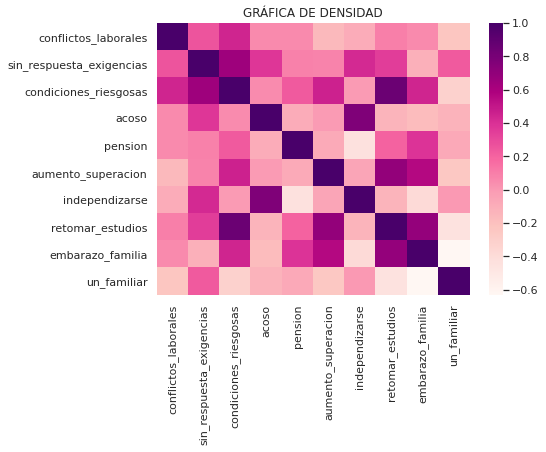

In [ ]:
plt.figure(figsize=(7,5))
plt.title("GRÁFICA DE DENSIDAD") 
sns.heatmap(df_des_den_muj.corr(),cmap="RdPu");

Se puede analizar que los motivos de conflictos laborales y condiciones riesgosas van relacionados fuertemente, mientras que los motivos de pensión e independizarse tienen una relación muy baja.

#### Ingresos: Salarios Mínimos

#####Boxplot

In [ ]:
#Para mejor visulización se comparara el inicio de la decada contra el final de esta, par ello uniendo los df correpsondoentes
df_salarios_2010_2019=pd.merge(pd.DataFrame(df_salarios_2010), pd.DataFrame(df_salarios_2019), left_index=True, right_index=True, how='outer')

In [ ]:
df_salarios_2010_2019.columns=['2010','2019']

In [ ]:
df_salarios_2010_2019

2010        2019
1 salario min                  3166228.25  5817418.25
Más de 1 hasta 2 salarios min  4659329.25  6858195.50
Más de 2 hasta 3 salarios min  3026834.00  2822638.75
Más de 3 hasta 5 salarios min  2349026.25  1438536.25
Más de 5 salarios min          1120738.00   511070.75
Sin ingresos                   1659733.00  1485317.50

A pesar de que hay menos mujeres sin ingresos se puede notar la dismunución significativa de mujeres gananado de 3 a 5 o más salarios, sin embargo hay aumento en lo que son los salarios de 1 a 3.

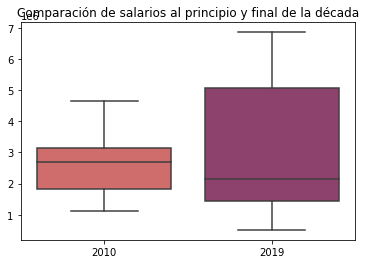

In [ ]:
blox_salarios=sns.boxplot( palette="flare", data=df_salarios_2010_2019)
blox_salarios.set(title='Comparación de salarios al principio y final de la década');

Veamos las cifras en comparativa directa

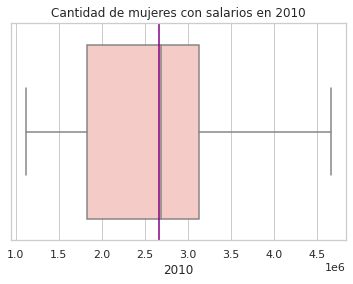

In [ ]:
box_2010=sns.set(style="whitegrid")
box_2010=sns.boxplot(x=df_salarios_2010_2019['2010'],palette=sns.color_palette("RdPu",3))
box_2010.set(title='Cantidad de mujeres con salarios en 2010')
box_2010=plt.axvline(df_salarios_2010_2019['2010'].mean(), c="purple")#media



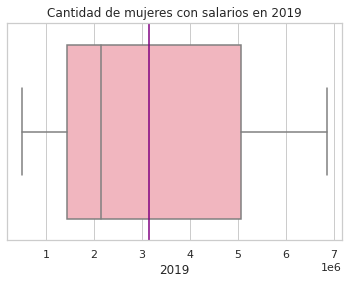

In [ ]:
box2019=sns.set(style="whitegrid")
box2019=sns.boxplot(x=df_salarios_2010_2019['2019'],palette=sns.color_palette("RdPu",2))
box2019.set(title='Cantidad de mujeres con salarios en 2019')
box2019=plt.axvline(df_salarios_2010_2019['2019'].mean(), c="purple")#media

#####Score de Rango Intercuartilico
Ahora se filtrarán los valores atípicos y s emostrarás nuevamente los boxplot para verificar la diferencia.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


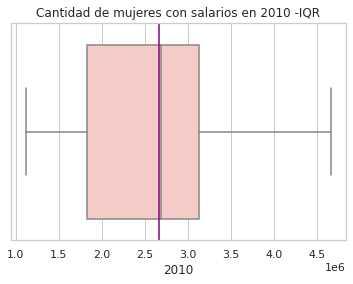

In [ ]:
#2010
iqr = df_salarios_2010_2019['2010'].quantile(0.75) - df_salarios_2010_2019['2010'].quantile(0.25)
filtro_inferior = df_salarios_2010_2019['2010'] > df_salarios_2010_2019['2010'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_salarios_2010_2019['2010'] < df_salarios_2010_2019['2010'].quantile(0.75) + (iqr * 1.5)

df_salarios_filtro_2010 = df_salarios_2010_2019[filtro_inferior & filtro_superior]

boxiqr_2010=sns.boxplot(df_salarios_filtro_2010['2010'],palette=sns.color_palette("RdPu",3))
boxiqr_2010.set(title='Cantidad de mujeres con salarios en 2010 -IQR')
boxiqr_2010=plt.axvline(df_salarios_2010_2019['2010'].mean(), c="purple")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


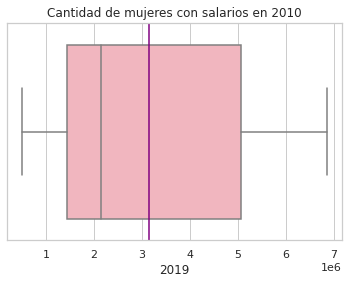

In [ ]:
#2019
iqr = df_salarios_2010_2019['2019'].quantile(0.75) - df_salarios_2010_2019['2019'].quantile(0.25)
filtro_inferior = df_salarios_2010_2019['2019'] > df_salarios_2010_2019['2019'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_salarios_2010_2019['2019'] < df_salarios_2010_2019['2019'].quantile(0.75) + (iqr * 1.5)

df_salarios_filtro_2019 = df_salarios_2010_2019[filtro_inferior & filtro_superior]

boxIqr_2019=sns.boxplot(df_salarios_filtro_2019['2019'],palette=sns.color_palette("RdPu",2))
boxIqr_2019.set(title='Cantidad de mujeres con salarios en 2010')
boxIqr_2019=plt.axvline(df_salarios_2010_2019['2019'].mean(), c="purple")

#####Tabla de Frecuencias
Para ello emplearemos el promedio por cada tipo de salario del 2010 a 2019

In [ ]:
df_salarios.set_index('Año', inplace=True)

In [ ]:
df_salarios

1 salario min  ...         Total
Año                  ...              
2010   3.166228e+06  ...  1.598189e+07
2011   3.135121e+06  ...  1.612519e+07
2012   3.473775e+06  ...  1.686455e+07
2013   3.491178e+06  ...  1.686846e+07
2014   3.406479e+06  ...  1.661602e+07
2015   3.699776e+06  ...  1.707233e+07
2016   4.150490e+06  ...  1.743647e+07
2017   4.003263e+06  ...  1.730905e+07
2018   4.577459e+06  ...  1.780952e+07
2019   5.817418e+06  ...  1.893318e+07
2020   6.145151e+06  ...  1.830163e+07

[11 rows x 8 columns]

In [ ]:
promedio_salarios=df_salarios.iloc[:,:6]

In [ ]:
promedio_salarios=promedio_salarios.mean()

In [ ]:
df_promedio_salarios=pd.DataFrame(promedio_salarios, columns=['Promedio'])

In [ ]:
df_promedio_salarios

Promedio
1 salario min                  4.096940e+06
Más de 1 hasta 2 salarios min  5.599140e+06
Más de 2 hasta 3 salarios min  3.122881e+06
Más de 3 hasta 5 salarios min  1.983625e+06
Más de 5 salarios min          8.832577e+05
Sin ingresos                   1.524909e+06

In [ ]:
tabla_F_salarios = df_promedio_salarios['Promedio']
tabla_F_salarios.max() - tabla_F_salarios.min()

4715881.871212121

In [ ]:
#Segmentamos valores y generamos la tabla de frecuencias
df_promedio_salarios['Promedio'].groupby(pd.cut(tabla_F_salarios, 20)).count()

Promedio
(878541.8, 1119051.775]       1
(1119051.775, 1354845.869]    0
(1354845.869, 1590639.962]    1
(1590639.962, 1826434.056]    0
(1826434.056, 2062228.15]     1
(2062228.15, 2298022.243]     0
(2298022.243, 2533816.337]    0
(2533816.337, 2769610.43]     0
(2769610.43, 3005404.524]     0
(3005404.524, 3241198.617]    1
(3241198.617, 3476992.711]    0
(3476992.711, 3712786.805]    0
(3712786.805, 3948580.898]    0
(3948580.898, 4184374.992]    1
(4184374.992, 4420169.085]    0
(4420169.085, 4655963.179]    0
(4655963.179, 4891757.272]    0
(4891757.272, 5127551.366]    0
(5127551.366, 5363345.459]    0
(5363345.459, 5599139.553]    1
Name: Promedio, dtype: int64

#####Histograma
Una vez teniendo la tabla de frecuencias podemos pasar a realizar el Histograma

In [ ]:
from scipy.stats import skew,kurtosis

In [ ]:
df_salarios.iloc[:,-2:-1]

Mujeres que tuvieron ingresos
Año                                
2010                   1.320142e+07
2011                   1.330074e+07
2012                   1.396711e+07
2013                   1.418267e+07
2014                   1.409430e+07
2015                   1.461491e+07
2016                   1.507338e+07
2017                   1.516264e+07
2018                   1.568357e+07
2019                   1.693679e+07
2020                   1.661093e+07

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


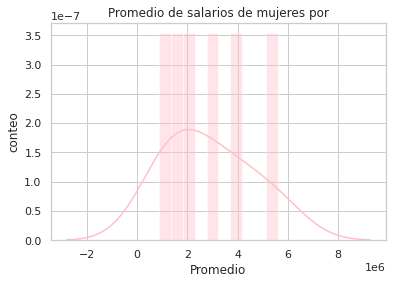

In [ ]:
plot_salario_prom=sns.distplot(df_promedio_salarios['Promedio'], kde=True, color="pink", norm_hist= False, bins=10)
plot_salario_prom.set(title='Promedio de salarios de mujeres por', ylabel='conteo');

In [ ]:
curtosis = kurtosis(df_promedio_salarios['Promedio'])
asimetria = skew(df_promedio_salarios['Promedio'])
print(f'Curtosis: {curtosis}')
print(f'Asimetría: {asimetria}')

Curtosis: -1.0846163096456942
Asimetría: 0.4505933563444776


#####Heatmap

In [ ]:
heatmap_salarios= df_salarios.iloc[:10,:6]
heatmap_salarios_corr= df_salarios.iloc[:10,:6]

In [ ]:
heatmap_salarios

[Text(0.5, 1.0, 'Salarios de mujeres a lo largo de la decada')]

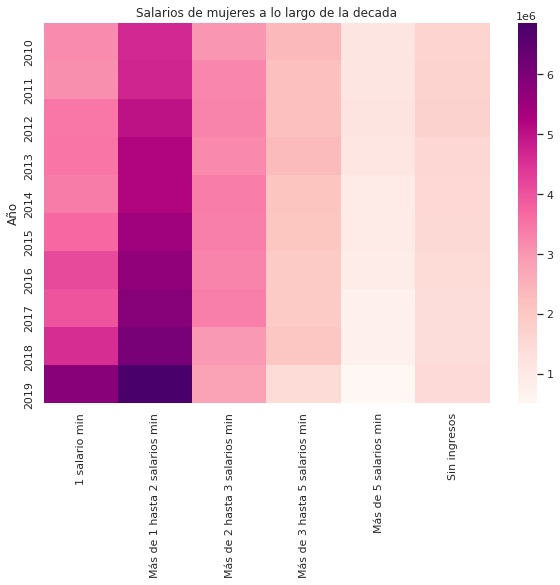

In [ ]:
plt.figure(figsize=(10,7))
grafica=sns.heatmap(heatmap_salarios,cmap="RdPu")
grafica.set(title='Salarios de mujeres a lo largo de la decada')


Dada esta gráfica se puede ver a simple vista que con el paso de los años ha aumentado el número de mujeres con ingresos y por otro lado disminuido el número de muejres sin ingresos. NO obstante, es más que claro que el aumento exponencial de mujeres con salario ha abundado en el salario que va de "1 hasta 2 salarios mínimos" y que el aumento de mujeres recibiendo "1 salario" ha crecido de forma más ritmica.
También es notorio que no hay muchas mujeres ganando "más de 5 salarios" y que esto no ha cmabido demasiado e a lo largo de los años.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

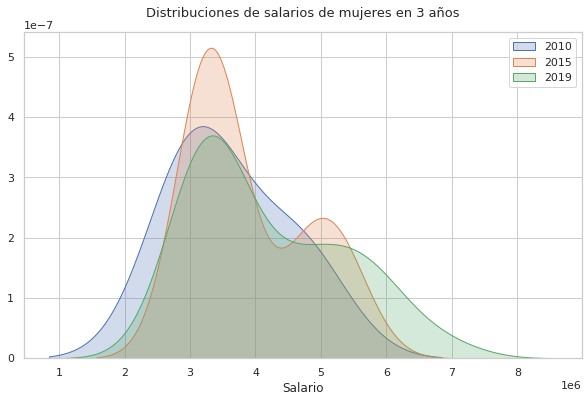

In [ ]:
plt.figure(figsize=(10,6))
plot=sns.distplot(heatmap_salarios.iloc[:1,:-3], hist = False, kde_kws = {'shade': True}, label="2010")#2010

plot=sns.distplot(heatmap_salarios.iloc[:6,:-3], hist = False, kde_kws = {'shade': True}, label="2015")#2015

plot=sns.distplot(heatmap_salarios.iloc[:10,:-3], hist = False, kde_kws = {'shade': True}, label="2019")#2019

plot.set_title('Distribuciones de salarios de mujeres en 3 años', fontsize=13, pad=15);
plot.set(xlabel='Salario', ylabel="");
plot.legend(loc='upper right');

In [ ]:
df_salarios.iloc[:9,:-3]

1 salario min  ...  Más de 5 salarios min
Año                  ...                       
2010     3166228.25  ...             1120738.00
2011     3135121.25  ...             1140325.50
2012     3473774.75  ...             1194443.25
2013     3491178.00  ...             1101664.00
2014     3406479.25  ...              973753.75
2015     3699776.00  ...              930246.25
2016     4150490.50  ...              901757.75
2017     4003263.25  ...              722211.25
2018     4577458.75  ...              710942.00

[9 rows x 5 columns]

### Prestaciones Laborales
####Análisis a profundidad de los datos

#### Estimados de Locación y Variabilidad
Obtención de estimados:
- Promedio
- Mediana
- Media Truncada
- Desviación estándar
- Rango
- Percéntiles 10, 25, 50, 75 y 90
- Rango intercuartil

Se considera que estos datos se pueden reprecentar de mejor manera usando las 2 bases de datos, de hombres y mujeres en el primer trimestre. Así será más facil visualizar y comparar las diferencias o similitudes entre cada uno.

In [ ]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Utilizaremos la fila "Nacional" que es donde se generalizan más los datos
prestaciones_nacionales_M = prestaciones_M_1er_T.loc['Nacional',]
prestaciones_nacionales_H = prestaciones_H_1er_T.loc['Nacional',]
prestaciones_nacionales_M
prestaciones_nacionales_H

2010    10847815
2011    11389787
2012    11751102
2013    12152581
2014    12631234
2015    12783199
2016    13170610
2017    13362106
2018    13681162
2019    13993040
2020    14408709
Name: Nacional, dtype: int64

In [ ]:
#Generamos una nueva base de datos para visualizar y comparar mejor los estimados de cada una.
estimados = pd.DataFrame ({
    'Mujeres' : {
        'Media' : round(prestaciones_nacionales_M.mean(), 2),
        'Mediana' : round(prestaciones_nacionales_M.median(),2),
        'Media Truncada' : round(stats.trim_mean(prestaciones_nacionales_M, 0.1),2),
        'Desviacion Estandar' : round(prestaciones_nacionales_M.std(),2),
        'Rango' : round(prestaciones_nacionales_M.max() - prestaciones_nacionales_M.min(),2),
        'Minimo' : prestaciones_nacionales_M.min(),
        'Percentil 10' : round(prestaciones_nacionales_M.quantile(0.1),2),
        'Percentil 25' : round(prestaciones_nacionales_M.quantile(0.25),2),
        'Percentil 50' : round(prestaciones_nacionales_M.median(),2),
        'Percentil 75' : round(prestaciones_nacionales_M.quantile(0.75),2),
        'Percentil 90' : round(prestaciones_nacionales_M.quantile(0.9),2),
        'Maximo' : prestaciones_nacionales_M.max(),
        'Rango intercuantil' : round(prestaciones_nacionales_M.quantile(0.75) - prestaciones_nacionales_M.quantile(0.25),2),
    },
    'Hombres' : {
        'Media' : round(prestaciones_nacionales_H.mean(),2),
        'Mediana' : round(prestaciones_nacionales_H.median(),2),
        'Media Truncada' : round(stats.trim_mean(prestaciones_nacionales_H, 0.1),2),
        'Desviacion Estandar' : round(prestaciones_nacionales_H.std(),2),
        'Rango' : round(prestaciones_nacionales_H.max() - prestaciones_nacionales_H.min(),2),
        'Minimo' : prestaciones_nacionales_H.min(),
        'Percentil 10' : round(prestaciones_nacionales_H.quantile(0.1),2),
        'Percentil 25' : round(prestaciones_nacionales_H.quantile(0.25),2),
        'Percentil 50' : round(prestaciones_nacionales_H.median(),2),
        'Percentil 75' : round(prestaciones_nacionales_H.quantile(0.75),2),
        'Percentil 90' :round( prestaciones_nacionales_H.quantile(0.9),2),
        'Maximo' : prestaciones_nacionales_H.max(),
        'Rango intercuantil' :   round(prestaciones_nacionales_H.quantile(0.75) - prestaciones_nacionales_H.quantile(0.25),2),
    },
})
estimados

Mujeres      Hombres
Media                 8594606.55  12742849.55
Mediana               8466038.00  12783199.00
Media Truncada        8554912.56  12768313.44
Desviacion Estandar    874118.60   1120399.58
Rango                 2896259.00   3560894.00
Minimo                7325100.00  10847815.00
Percentil 10          7518613.00  11389787.00
Percentil 25          8027878.50  11951841.50
Percentil 50          8466038.00  12783199.00
Percentil 75          9152147.50  13521634.00
Percentil 90          9496762.00  13993040.00
Maximo               10221359.00  14408709.00
Rango intercuantil    1124269.00   1569792.50

De esta tabla, es más facil comparar entre ambos sexos, lo que ayuda a responder la pregunta de sí hay una diferencia entre las prestaciones a hombres y mujeres. En promedio en la última década, los hombres han recibido casi el doble de prestaciones, algo muy notable. 
Otro punto a destacar esque durante los años, estos valores no han variado a gran escala, es por esto que en la media truncada no se ve un cambio evidente, aunque si lo hay. 

#### Boxplot

In [ ]:
#Unimos ambas tablas para crear el boxplot
prestaciones_nacionales_MyH = pd.merge(pd.DataFrame(prestaciones_nacionales_M), pd.DataFrame(prestaciones_nacionales_H), left_index=True, right_index=True, how='outer')
prestaciones_nacionales_MyH = prestaciones_nacionales_MyH.rename(columns={'Nacional_x':'Nacional M','Nacional_y' :'Nacional H'}, inplace=False)
prestaciones_nacionales_MyH

Nacional M  Nacional H
2010     7325100    10847815
2011     7518613    11389787
2012     7891668    11751102
2013     8164089    12152581
2014     8386908    12631234
2015     8466038    12783199
2016     8765840    13170610
2017     9049544    13362106
2018     9254751    13681162
2019     9496762    13993040
2020    10221359    14408709

Text(0.5, 1.0, 'Comparación de Prestaciones Anuales a Nivel Nacional')

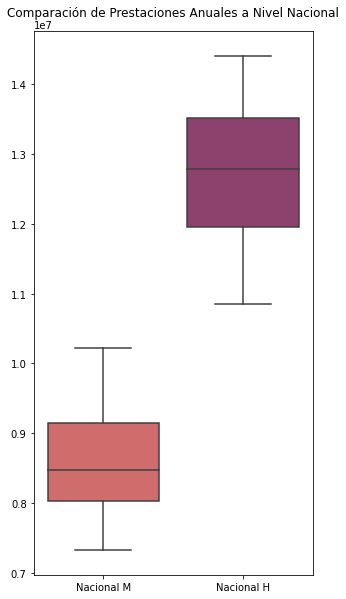

In [ ]:
prestaciones_nacionales_MyH['Año'] = prestaciones_nacionales_MyH.index
plt.figure(figsize=(5,10))
box_HyM = sns.boxplot( palette="flare",data=prestaciones_nacionales_MyH)
plt.title('Comparación de Prestaciones Anuales a Nivel Nacional', pad=15)

Text(0.5, 1.0, 'Comparación de Prestaciones Anuales a Nivel Nacional')

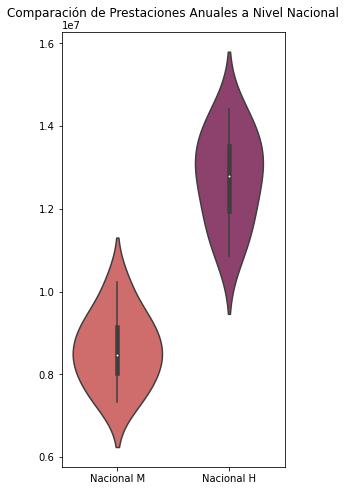

In [ ]:
prestaciones_nacionales_MyH['Año'] = prestaciones_nacionales_MyH.index
plt.figure(figsize=(4,8))
box_HyM = sns.violinplot( palette="flare",data=prestaciones_nacionales_MyH)
plt.title('Comparación de Prestaciones Anuales a Nivel Nacional', pad=15)

Comparando ambos boxplots es más facil ver la diferencia entre cada uno.

Text(0.5, 1.0, 'Prestaciones Nnuales a Nivel Nacional para las Mujeres')

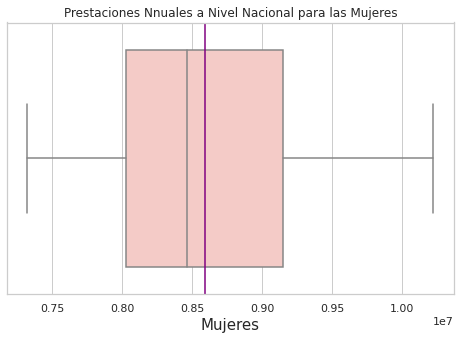

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.boxplot(x=prestaciones_nacionales_MyH['Nacional M'],palette=sns.color_palette("RdPu",3))
plt.axvline(prestaciones_nacionales_MyH['Nacional M'].mean(), c="purple")
plt.xlabel('Mujeres',fontsize=15)
plt.title('Prestaciones Nnuales a Nivel Nacional para las Mujeres')

Text(0.5, 1.0, 'Prestaciones Anuales a Nivel Nacional para los Hombres')

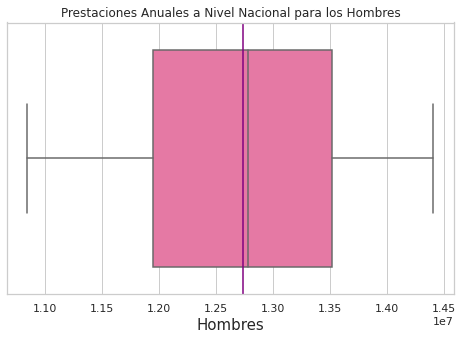

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.boxplot(x=prestaciones_nacionales_MyH['Nacional H'],palette=sns.color_palette("RdPu",1))
plt.axvline(prestaciones_nacionales_MyH['Nacional H'].mean(), c="purple")
plt.xlabel('Hombres',fontsize=15)
plt.title('Prestaciones Anuales a Nivel Nacional para los Hombres')

#### Score de Rango Intercuartilico

Filtrando Valores Atípicos, ya que la mayoría de los datos no varian mucho unos de otros, es poco visible este cambio en los boxplot. Se muestran a continuación:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Filtrado: Prestaciones Anuales a Nivel Nacional para las Mujeres')

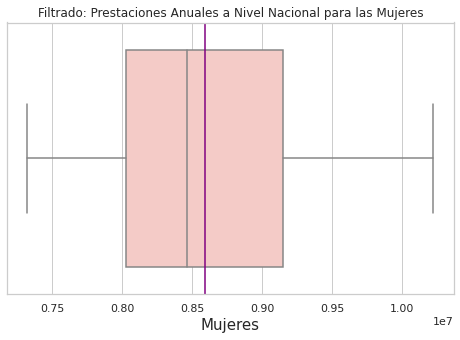

In [ ]:
iqr = prestaciones_nacionales_MyH['Nacional M'].quantile(0.75) - prestaciones_nacionales_MyH['Nacional M'].quantile(0.25)
filtro_inferior = prestaciones_nacionales_MyH['Nacional M'] > prestaciones_nacionales_MyH['Nacional M'].quantile(0.25) - (iqr * 1.5)
filtro_superior = prestaciones_nacionales_MyH['Nacional M'] < prestaciones_nacionales_MyH['Nacional M'].quantile(0.75) + (iqr * 1.5)

prestaciones_nacionales_M_filtrado = prestaciones_nacionales_MyH[filtro_inferior & filtro_superior]
plt.figure(figsize=(8,5))
sns.boxplot(prestaciones_nacionales_M_filtrado['Nacional M'],palette=sns.color_palette("RdPu",3))
plt.axvline(prestaciones_nacionales_MyH['Nacional M'].mean(), c="purple")
plt.xlabel('Mujeres',fontsize=15)
plt.title('Filtrado: Prestaciones Anuales a Nivel Nacional para las Mujeres')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Filtrado: Prestaciones Anuales a Nivel Nacional para los Hombres')

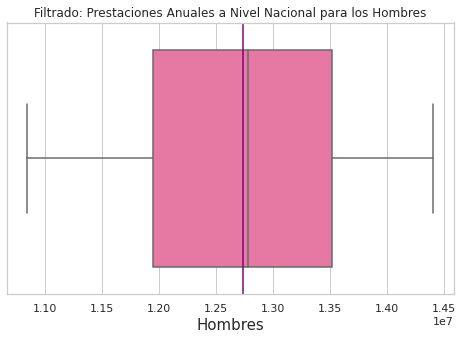

In [ ]:
iqr = prestaciones_nacionales_MyH['Nacional H'].quantile(0.75) - prestaciones_nacionales_MyH['Nacional H'].quantile(0.25)
filtro_inferior = prestaciones_nacionales_MyH['Nacional H'] > prestaciones_nacionales_MyH['Nacional H'].quantile(0.25) - (iqr * 1.5)
filtro_superior = prestaciones_nacionales_MyH['Nacional H'] < prestaciones_nacionales_MyH['Nacional H'].quantile(0.75) + (iqr * 1.5)

prestaciones_nacionales_H_filtrado = prestaciones_nacionales_MyH[filtro_inferior & filtro_superior]
plt.figure(figsize=(8,5))
sns.boxplot(prestaciones_nacionales_H_filtrado['Nacional H'],palette=sns.color_palette("RdPu",1))
plt.axvline(prestaciones_nacionales_MyH['Nacional H'].mean(), c="purple")
plt.xlabel('Hombres',fontsize=15)
plt.title('Filtrado: Prestaciones Anuales a Nivel Nacional para los Hombres')

#### Tabla de Frecuencias

In [ ]:
#Utilizaremos la tabla de promedio por estado
promedio_estados = promedio_estados.drop(['Nacional'],axis=0)

In [ ]:
tabla_F_estados = promedio_estados['Promedio']
tabla_F_estados.max() - tabla_F_estados.min()

1043714.4545454546

In [ ]:
#Segmentamos valores y generamos la tabla de frecuencias
promedio_estados['Promedio'].groupby(pd.cut(tabla_F_estados, 20)).count()

Promedio
(59670.286, 112899.723]       8
(112899.723, 165085.445]      8
(165085.445, 217271.168]      3
(217271.168, 269456.891]      1
(269456.891, 321642.614]      3
(321642.614, 373828.336]      4
(373828.336, 426014.059]      0
(426014.059, 478199.782]      1
(478199.782, 530385.505]      1
(530385.505, 582571.227]      0
(582571.227, 634756.95]       0
(634756.95, 686942.673]       1
(686942.673, 739128.395]      0
(739128.395, 791314.118]      0
(791314.118, 843499.841]      0
(843499.841, 895685.564]      0
(895685.564, 947871.286]      0
(947871.286, 1000057.009]     1
(1000057.009, 1052242.732]    0
(1052242.732, 1104428.455]    1
Name: Promedio, dtype: int64

#### Histograma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma del Prestaciones para las Mujeres en el 2010')

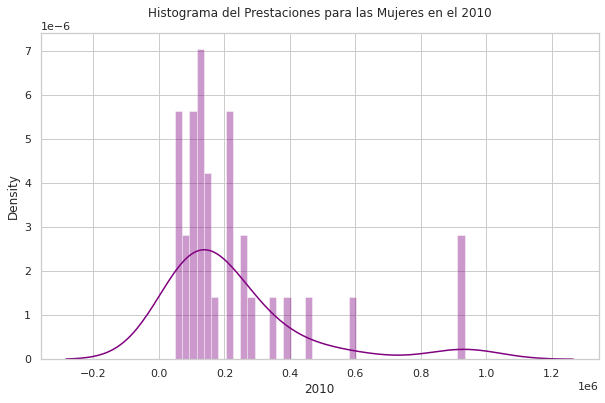

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(prestaciones_M_1er_T_snN['2010'], kde=True, color="purple", norm_hist= False, bins=40)
plt.title('Histograma del Prestaciones para las Mujeres en el 2010', pad=16)

In [ ]:
curtosis = kurtosis(prestaciones_M_1er_T_snN['2010'])
asimetria = skew(prestaciones_M_1er_T_snN['2010'])
print(f'Curtosis: {curtosis}')
print(f'Asimetría: {asimetria}')

Curtosis: 4.1241790053765275
Asimetría: 2.1453134763247212


La distribucion como se observa es achatada y no es simétrica. Mientras que la asimetria es positiva, tiende a la derecha, que son lo alejados que estan de la media.

#### Graficas de densidad

Text(0.5, 39.5, 'Año')

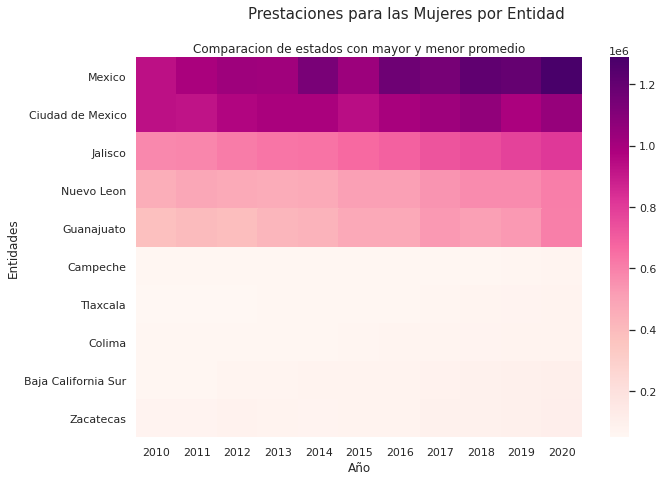

In [ ]:
#heatmap_MyH = pd.merge(prestaciones_M_1er_T.drop(['Nacional'],axis=0), prestaciones_H_1er_T.drop(['Nacional'],axis=0), on='Entidades')
heatmap_M = prestaciones_M_1er_T.drop(['Nacional'],axis=0)
heatmap_H = prestaciones_H_1er_T.drop(['Nacional'],axis=0)
plt.figure(figsize=(10,7))
sns.heatmap(heatmap_M.loc[['Mexico', 'Ciudad de Mexico','Jalisco', 'Nuevo Leon', 'Guanajuato', 'Campeche','Tlaxcala', 'Colima', 'Baja California Sur', 'Zacatecas'],:'2020'],cmap="RdPu")
plt.title('Comparacion de estados con mayor y menor promedio', fontsize=12, pad=5)
plt.suptitle('Prestaciones para las Mujeres por Entidad', fontsize=15)
plt.xlabel('Año')


Con este heatmap, nos es posible ver el cambio con los años de los 5 estados que en promedio más prestaciones han dado a la mujer y la comparativa entre los 5 estados con promedio menor, que si nos detenemos a pensar, estos son los estados con menos población del país.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


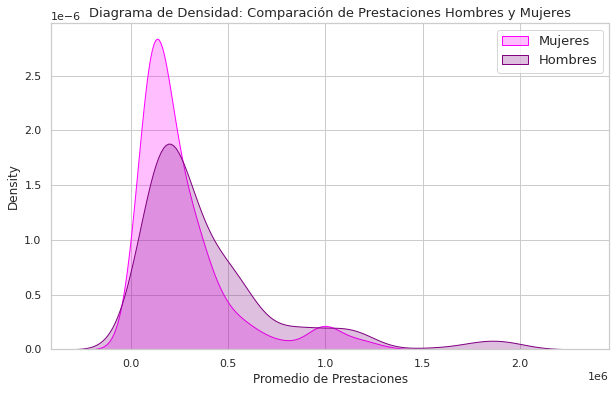

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(heatmap_M, hist = False, kde_kws = {'shade': True}, label='Mujeres', color='magenta')
sns.distplot(heatmap_H, hist = False, kde_kws = {'shade': True}, ax=ax, label='Hombres', color='purple')
plt.title('Diagrama de Densidad: Comparación de Prestaciones Hombres y Mujeres', fontsize=13)
plt.xlabel('Promedio de Prestaciones')
ax.legend(loc='upper right', fontsize=13)

## <font color=Deeppink> **3 Exploración de Variables Categóricas y Análisis Multivariable** </font>

**OBJETIVO**

* Agregar anotaciones y títulos a las gráficas que hemos hecho hasta el momento
* Realizar gráficas de barras para explorar la distribución de variables categóricas
* Realizar tablas de contingencia y gráficas con múltiples axes para explorar dos o más variables categóricas
* Usar boxplots y violinplots para explorar variables numéricas segmentadas por variables categóricas

**REQUISITOS**

*Tener un dataset limpio
*Tener una serie de preguntas que queremos contestar usando nuestro dataset
*Haber explorado ya la distribuciones de nuestras variables numéricas

**DESARROLLO**

En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. En el postwork pasado exploramos las variables numéricas y ya deberías de tener una idea general bastante buena de cómo están organizadas. Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

1. Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
2. Identifica todas las variables categóricas en tu dataset.
3. Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
4. Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
5. Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
6. Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
7. De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.

### Motivos de Abandono del empleo

In [ ]:
import seaborn as sns
import pandas as pd


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/FanyEstAg/Team-25-Proyecto_M3/main/Datasets/dfm.csv', encoding='latin-1', index_col = 0)


In [ ]:
df.head()


Año   total  ...  hombre_indefinido  mujer_indefinido
0  2010  609539  ...               3085               198
1  2011  628531  ...               1467              1439
2  2012  667781  ...               5808               607
3  2013  675433  ...               3679               879
4  2014  712369  ...               3854              1839

[5 rows x 40 columns]


1.- Identifica todas las variables categóricas en tu dataset.

No hay variables categóricas en este dataset, todas son cuantitativas. 

### Ingresos: Salarios Mínimos

La implementación de etiquetas en los anteriores gráficos fue llevada a cabo correctamente

#####Graficas de Barra

In [ ]:
#Definimos las categorías

df_salarioXaño = df_salarios['Mujeres que tuvieron ingresos']


In [ ]:
df_salarioXaño['Año'] = df_salarioXaño.index

Text(0.5, 1.0, 'Cantidad de mujeres que tuvieron ingreso salarial')

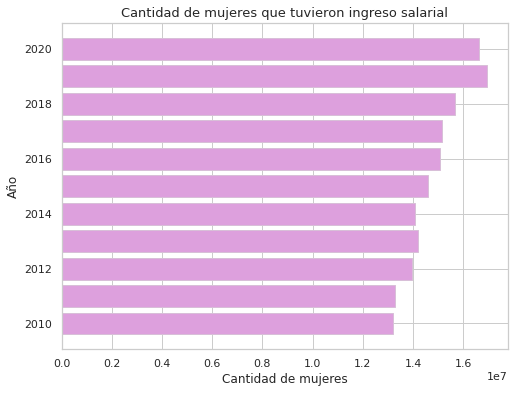

In [ ]:
plt.subplots(figsize =(8, 6))
plt.barh(df_salarioXaño['Año'], df_salarios['Mujeres que tuvieron ingresos'], color ='plum', edgecolor ='thistle')
plt.xlabel('Cantidad de mujeres')
plt.ylabel('Año')
plt.title('Cantidad de mujeres que tuvieron ingreso salarial', fontsize=13)

La gráfica anterior nos muestra de manera más fácil e intuitiva el crecimiento en la cantidad de mujeres con ingreso salarial por año

In [ ]:
df_salarioXaño['Salarios'] = df_salarios.transpose().index


In [ ]:
df_salarioXaño['Salarios']


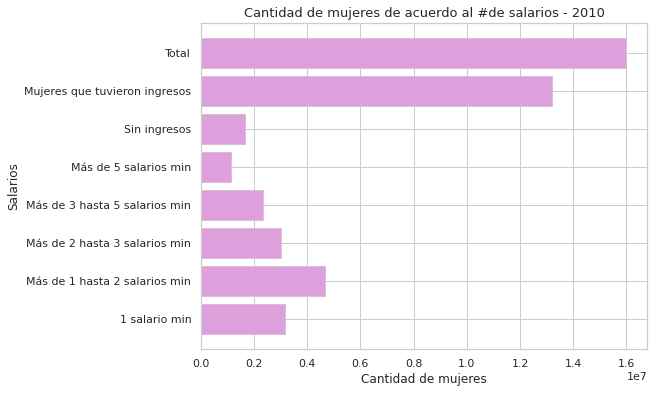

In [ ]:
plot_2010=plt.subplots(figsize =(8, 6))
plot_2010=plt.barh(df_salarioXaño['Salarios'], df_salarios.iloc[0,:], color ='plum', edgecolor ='thistle')
plot_2010=plt.xlabel('Cantidad de mujeres')
plot_2010=plt.ylabel('Salarios')
plot_2010=plt.title('Cantidad de mujeres de acuerdo al #de salarios - 2010', fontsize=13)

In [ ]:
plot_2015=plt.subplots(figsize =(8, 6))
plot_2015=plt.barh(df_salarioXaño['Salarios'], df_salarios.iloc[5,:], color ='plum', edgecolor ='thistle')
plot_2015=plt.xlabel('Cantidad de mujeres')
plot_2015=plt.ylabel('Salarios')
plot_2015=plt.title('Cantidad de mujeres de acuerdo al #de salarios - 2015', fontsize=13)

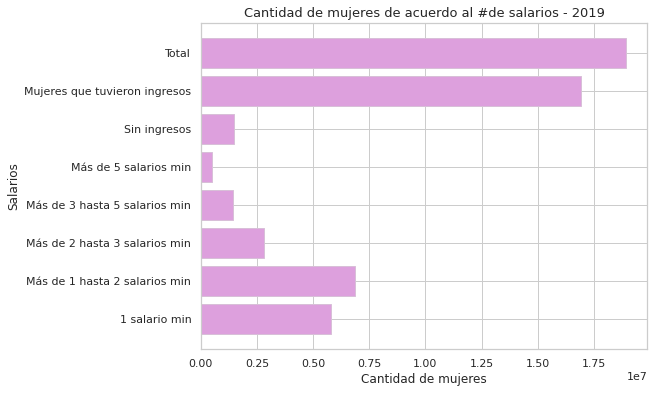

In [ ]:
plot_2019=plt.subplots(figsize =(8, 6))
plot_2019=plt.barh(df_salarioXaño['Salarios'], df_salarios.iloc[9,:], color ='plum', edgecolor ='thistle')
plot_2019=plt.xlabel('Cantidad de mujeres')
plot_2019=plt.ylabel('Salarios')
plot_2019=plt.title('Cantidad de mujeres de acuerdo al #de salarios - 2019', fontsize=13)

En las anteriores gráficos pudimos observar los datos a lo largo de la decada 2010. Tomando el año 2010 como inicio, 2015 como año intermedio y 2019 como final.

In [ ]:
df_salario_plot=df_salarios.transpose()
df_salario_plot['Salario']=df_salario_plot.index

In [ ]:
df_salario_plot.iloc[:,[1,3,8]]

Año                                   2011         2013         2018
1 salario min                   3135121.25   3491178.00   4577458.75
Más de 1 hasta 2 salarios min   4708785.25   5202731.75   6084455.75
Más de 2 hasta 3 salarios min   3241849.25   3189170.50   2972580.50
Más de 3 hasta 5 salarios min   2214979.75   2299591.25   2049073.50
Más de 5 salarios min           1140325.50   1101664.00    710942.00
Sin ingresos                    1684129.00   1584125.25   1415007.25
Mujeres que tuvieron ingresos  13300735.50  14182671.50  15683568.50
Total                          16125190.00  16868460.75  17809517.75

In [ ]:
plot_comp = df_salario_plot.iloc[:-2,[0,5,10]].plot.barh(stacked=False, figsize=(12, 9), color= ['mediumvioletred','rebeccapurple','orchid'], align='center')

for rect in plot_comp.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

plt.title('Comparación de Salarios para las Mujeres Cada 5 Años')
plt.xlabel('Cantidad de mujeres')

Con ayuda de la anterior gráfica podemos hacer una comparación más rápida e intuitiva acerca del crecimiento en adquisición de salarios cada 5 año, compenzando desde 2010 y concluyendo en 2020.
Tal como ya se había observado en gráficos anteriores, se nota como "Más de 1 hasta 2 salarios minimos" es el salario con más crecimiento. Por le contrario se tiene a "Más de 5 salarios min" que es salario menos com´pun y el que menos crecimeinto ha tenido.

### Prestaciones Laborales

##### Graficas de Barra

In [ ]:
#Definimos las categorías
prestaciones_M_1er_T['Entidades'] = prestaciones_M_1er_T.index
prestaciones_M_1er_T_2010 = prestaciones_M_1er_T[['2010', 'Entidades']].drop(['Nacional'],axis=0)
prestaciones_M_1er_T_2015 = prestaciones_M_1er_T[['2015', 'Entidades']].drop(['Nacional'],axis=0)
prestaciones_M_1er_T_2020 = prestaciones_M_1er_T[['2020', 'Entidades']].drop(['Nacional'],axis=0)

Text(0.5, 1.0, 'Prestaciones para las Mujeres en el 2010')

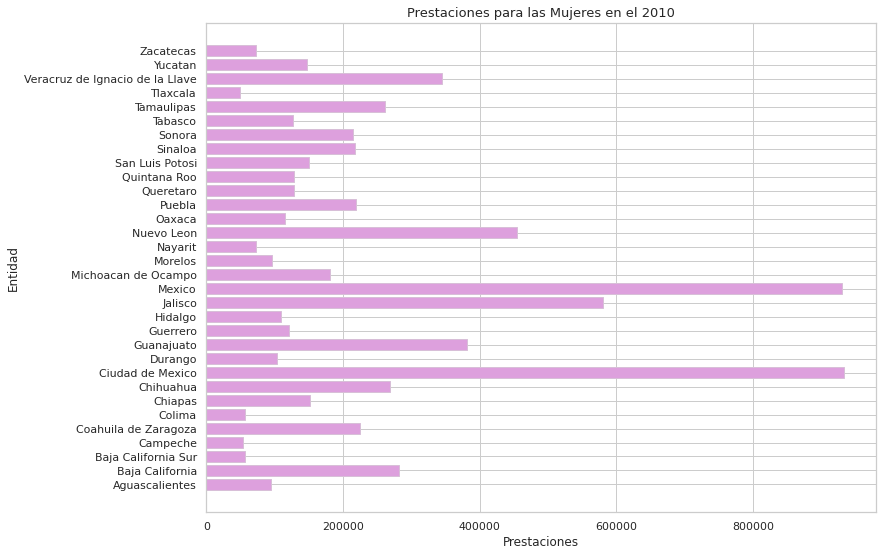

In [ ]:
#2010
plt.subplots(figsize =(12, 9))
plt.barh(prestaciones_M_1er_T_2010['Entidades'], prestaciones_M_1er_T_2010['2010'], color ='plum', edgecolor ='thistle')
plt.xlabel('Prestaciones')
plt.ylabel('Entidad')
plt.title('Prestaciones para las Mujeres en el 2010', fontsize=13)

Text(0.5, 1.0, 'Prestaciones para las Mujeres en el 2015')

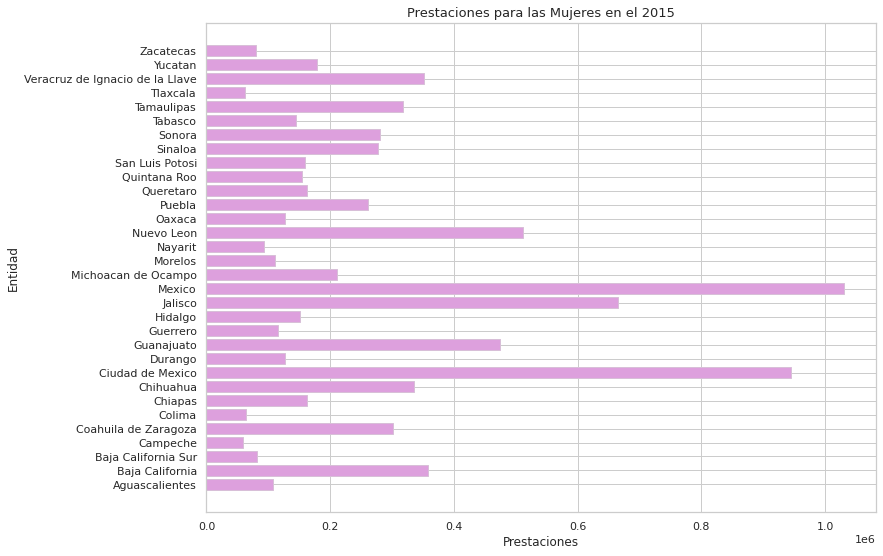

In [ ]:
#2015
plt.subplots(figsize =(12, 9))
plt.barh(prestaciones_M_1er_T_2010['Entidades'], prestaciones_M_1er_T_2015['2015'], color ='plum', edgecolor ='thistle')
plt.xlabel('Prestaciones')
plt.ylabel('Entidad')
plt.title('Prestaciones para las Mujeres en el 2015', fontsize=13)

Text(0.5, 1.0, 'Prestaciones para las Mujeres en el 2020')

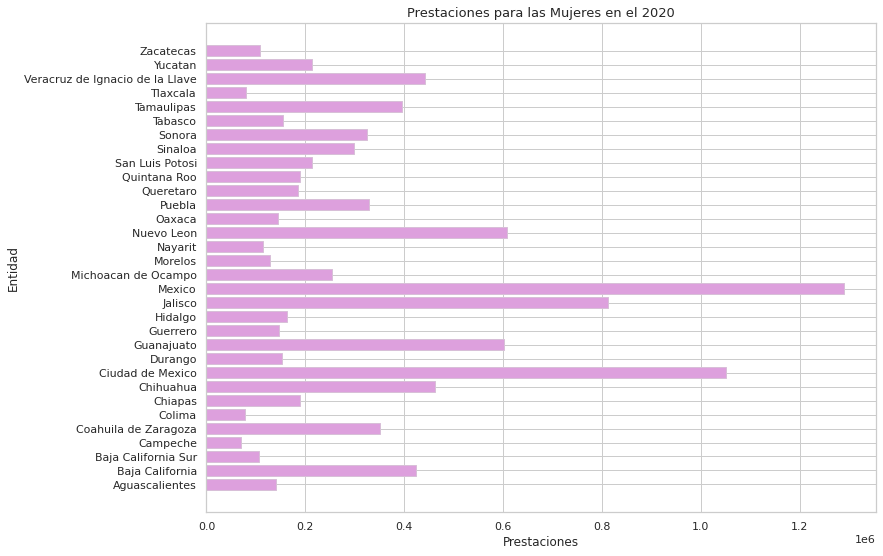

In [ ]:
#2020
plt.subplots(figsize =(12, 9))
plt.barh(prestaciones_M_1er_T_2010['Entidades'], prestaciones_M_1er_T_2020['2020'], color ='plum', edgecolor ='thistle')
plt.xlabel('Prestaciones')
plt.ylabel('Entidad')
plt.title('Prestaciones para las Mujeres en el 2020', fontsize=13)

Text(0.5, 0, 'Prestaciones')

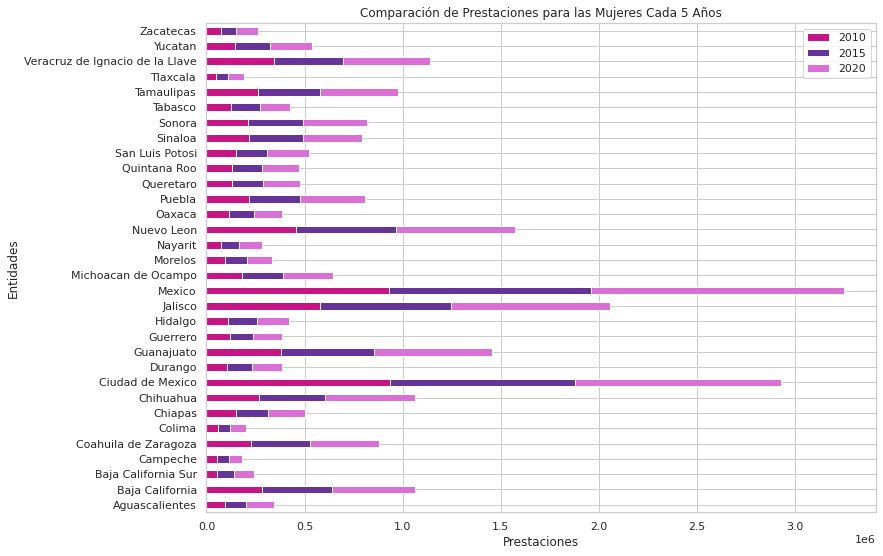

In [ ]:
ax = prestaciones_M_1er_T[['2010','2015', '2020', 'Entidades']].drop(['Nacional'],axis=0).plot.barh(stacked=True, figsize=(12, 9), color= ['mediumvioletred','rebeccapurple','orchid'], align='center')

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

plt.title('Comparación de Prestaciones para las Mujeres Cada 5 Años')
plt.xlabel('Prestaciones')

Con estas 3 gráficas de barra, observamos el cambio anual de cada estado. Facilmente se observa el cambio con los años, principalmente del 2015 al 2020.

## <font color=Deeppink> **4 Correlaciones y Regresión Linear Simple** </font>

**OBJETIVO**

*Realizar análisis bivariado con variables numéricas
*Identificar valores atípicos y decidir qué hacer con ellos
*Explorar las relaciones existentes entre nuestras variables numéricas
*Entrenar modelos de regresión lineal para realizar predicciones

**REQUISITOS**

Tener un dataset que contenga variables numéricas

**DESARROLLO**

En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. Si tu dataset sólo tiene variables categóricas o datos no estructurados (texto libre), entonces puedes pedirle a tu experta que te comparta algún dataset con el que puedas realizar estos ejercicios.

Utilizando tu dataset, realiza las siguientes actividades:

1. Identifica cuáles son las variables numéricas en tu dataset.
2. Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
3. Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
4. Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
5. Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
6. Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

### Motivos de Abandono del empleo

1.- Identifica cuáles son las variables numéricas en tu dataset.

Todas son variables numéricas.

2.- Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.

In [ ]:
import matplotlib.pyplot as plt
sns.set_style('white')

In [ ]:
df.corr()

Año  ...  mujer_indefinido
Año                              1.000000  ...          0.818652
total                            0.950324  ...          0.751233
total_hombre                     0.881142  ...          0.775927
total_mujer                      0.911142  ...          0.635108
total_conflictos_laborales       0.150808  ...          0.140428
hombre_conflictos_laborales      0.058195  ...          0.060610
mujer_conflictos_laborales       0.259513  ...          0.232399
total_sin_respuesta_exigencias   0.593433  ...          0.812369
hombre_sin_respuesta_exigencias  0.480431  ...          0.676880
mujer_sin_respuesta_exigencias   0.358027  ...          0.454098
total_condiciones_riesgosas      0.821888  ...          0.733163
hombre_condiciones_riesgosas     0.737152  ...          0.683652
mujer_condiciones_riesgosas      0.855410  ...          0.697210
total_acoso                      0.316171  ...          0.384938
hombre_acoso                     0.383131  ...          0.449470
mujer_acoso                      0.019717  ...          0.043048
total_pension                    0.416915  ...          0.064639
hombre_pension                   0.457312  ...          0.248002
mujer_pension                    0.179368  ...         -0.182557
total_aumento_superacion         0.837424  ...          0.694425
hombre_aumento_superacion        0.763364  ...          0.547947
mujer_aumento_superacion         0.685134  ...          0.694906
total_independizarse             0.293343  ...          0.435966
hombre_independizarse            0.441117  ...          0.512665
mujer_independizarse            -0.186373  ...         -0.038331
total_retomar_estudios           0.859817  ...          0.627646
hombre_retomar_estudios          0.733083  ...          0.489330
mujer_retomar_estudios           0.906771  ...          0.727744
total_embarazo_familia           0.737921  ...          0.357581
hombre_embarazo_familia          0.442983  ...          0.333579
mujer_embarazo_familia           0.708238  ...          0.314893
total_un_familiar               -0.222818  ...          0.004442
hombre_un_familiar               0.547140  ...          0.212287
mujer_un_familiar               -0.419157  ...         -0.087508
total_otros                     -0.303786  ...         -0.106830
hombre_otros                    -0.425936  ...         -0.034878
mujer_otros                      0.193685  ...         -0.087807
total_indefinido                 0.728860  ...          0.891767
hombre_indefinido                0.399581  ...          0.490888
mujer_indefinido                 0.818652  ...          1.000000

[40 rows x 40 columns]

3. Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.

Variables que se correlacionan significativamente y tienen sentido empírico: Año, mujer_condiciones_riesgosas, hombre_retomar_estudios, hombre_aumento_superacion, mujer_aumento_superacion, mujer_retomar_estudios, mujer_embarazo_familia. 


In [ ]:
df_filtrado = df.filter(['Año', 'mujer_condiciones_riesgosas', 'hombre_retomar_estudios', 'hombre_aumento_superacion', 'mujer_aumento_superacion', 'mujer_retomar_estudios', 'mujer_embarazo_familia'], axis=1)

In [ ]:
df_filtrado.head()

Año  ...  mujer_embarazo_familia
0  2010  ...                   76943
1  2011  ...                   82941
2  2012  ...                   96857
3  2013  ...                   91081
4  2014  ...                  103812

[5 rows x 7 columns]

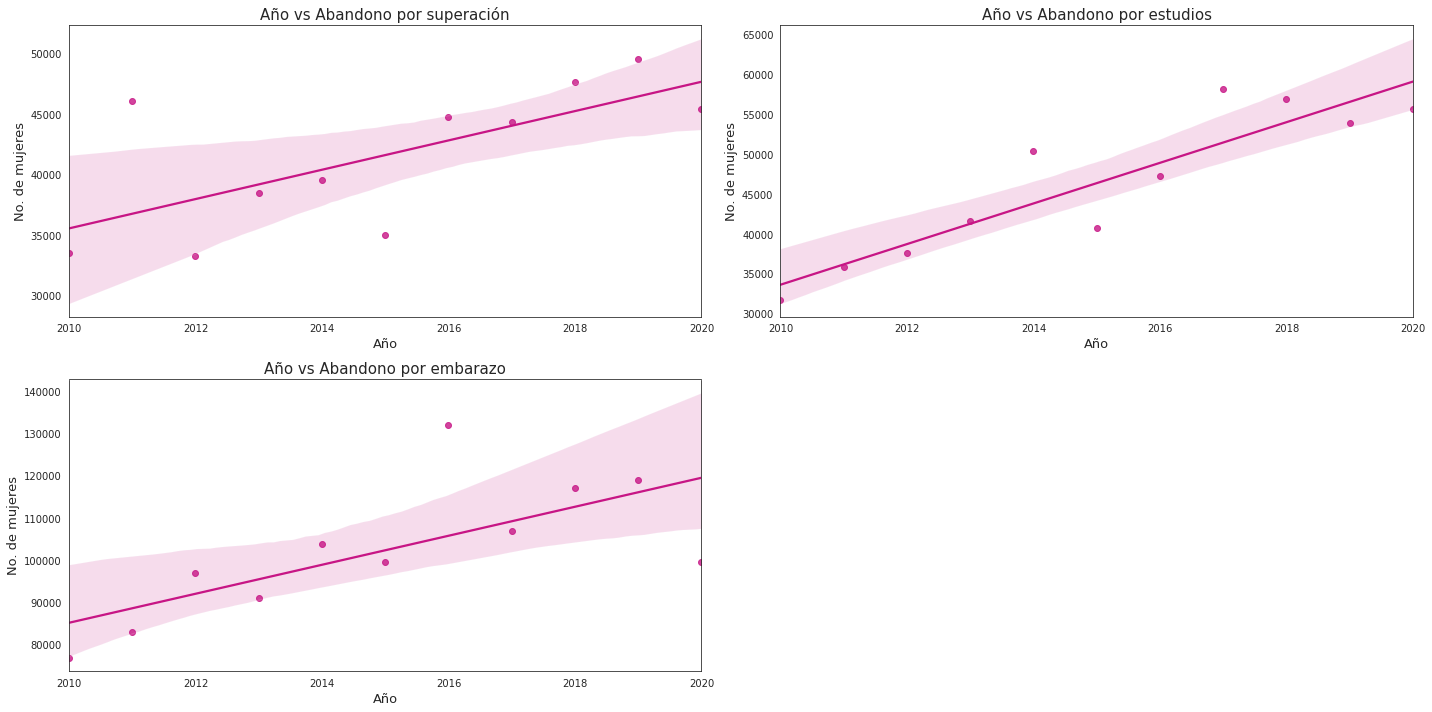

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ax = sns.regplot(x="Año", y="mujer_aumento_superacion", data=df_filtrado, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Año vs Abandono por superación', fontsize=15)
ax.set( xlabel='Año', 
    ylabel='No. de mujeres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.subplot(2,2,2)
ax = sns.regplot(x="Año", y="mujer_retomar_estudios", data=df_filtrado, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Año vs Abandono por estudios', fontsize=15)
ax.set( xlabel='Año', 
    ylabel='No. de mujeres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.subplot(2,2,3)
ax = sns.regplot(x="Año", y="mujer_embarazo_familia", data=df_filtrado, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Año vs Abandono por embarazo', fontsize=15)
ax.set( xlabel='Año', 
    ylabel='No. de mujeres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.tight_layout()

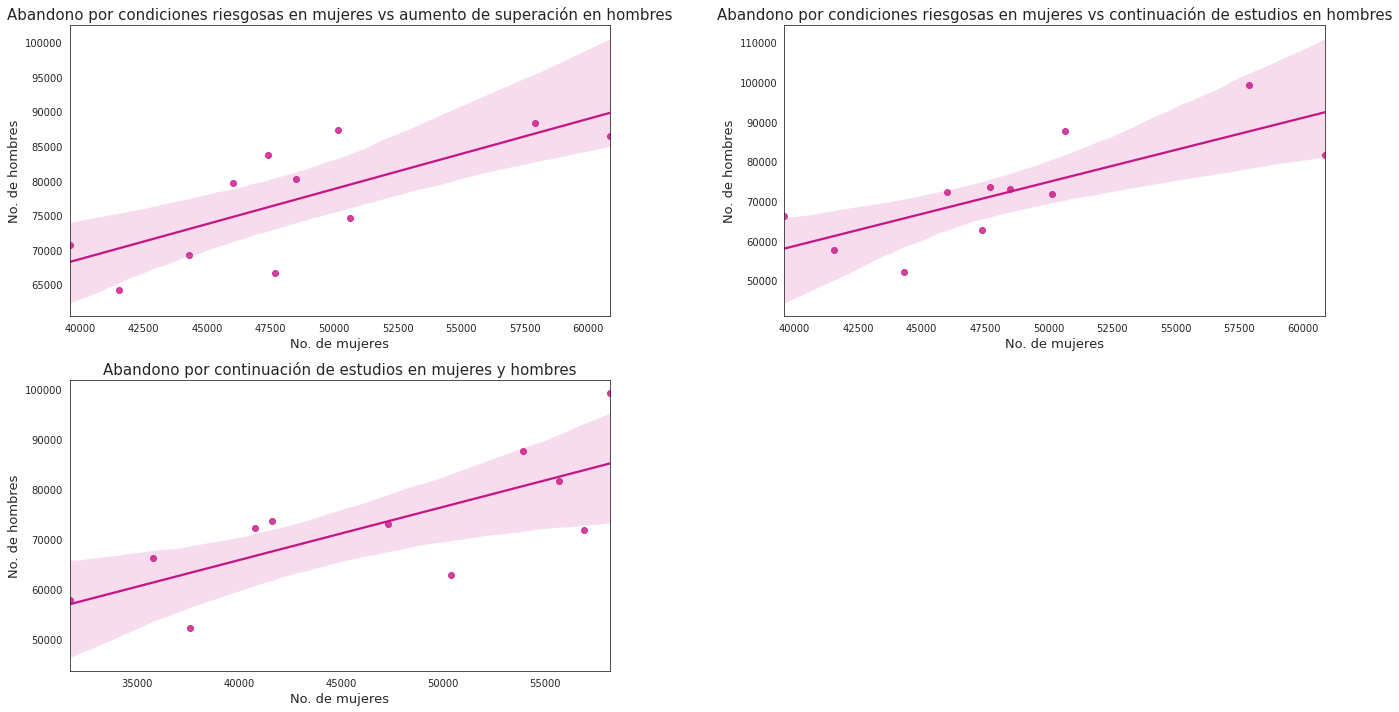

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ax = sns.regplot(x="mujer_condiciones_riesgosas", y="hombre_aumento_superacion", data=df_filtrado, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Abandono por condiciones riesgosas en mujeres vs aumento de superación en hombres', fontsize=15)
ax.set( xlabel='No. de mujeres', 
    ylabel='No. de hombres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.subplot(2,2,2)
ax = sns.regplot(x="mujer_condiciones_riesgosas", y="hombre_retomar_estudios", data=df_filtrado, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Abandono por condiciones riesgosas en mujeres vs continuación de estudios en hombres',fontsize=15)
ax.set( xlabel='No. de mujeres', 
    ylabel='No. de hombres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.subplot(2,2,3)
ax = sns.regplot(x="mujer_retomar_estudios", y="hombre_retomar_estudios", data=df_filtrado, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Abandono por continuación de estudios en mujeres y hombres',fontsize=15)
ax.set( xlabel='No. de mujeres', 
    ylabel='No. de hombres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.tight_layout()
   

In [ ]:
Q1 = df_filtrado.quantile(0.25)
Q3 = df_filtrado.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Año                                5.0
mujer_condiciones_riesgosas     5227.0
hombre_retomar_estudios        13126.5
hombre_aumento_superacion      15109.0
mujer_aumento_superacion        9038.0
mujer_retomar_estudios         15640.0
mujer_embarazo_familia         17974.0
dtype: float64


In [ ]:
df_out = df_filtrado[~((df_filtrado < (Q1 - 1.5 * IQR)) |(df_filtrado > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(9, 7)


In [ ]:
df_out.corr()

Año  ...  mujer_embarazo_familia
Año                          1.000000  ...                0.865597
mujer_condiciones_riesgosas  0.899175  ...                0.821963
hombre_retomar_estudios      0.782171  ...                0.561052
hombre_aumento_superacion    0.700721  ...                0.708015
mujer_aumento_superacion     0.668339  ...                0.584094
mujer_retomar_estudios       0.915082  ...                0.815700
mujer_embarazo_familia       0.865597  ...                1.000000

[7 rows x 7 columns]

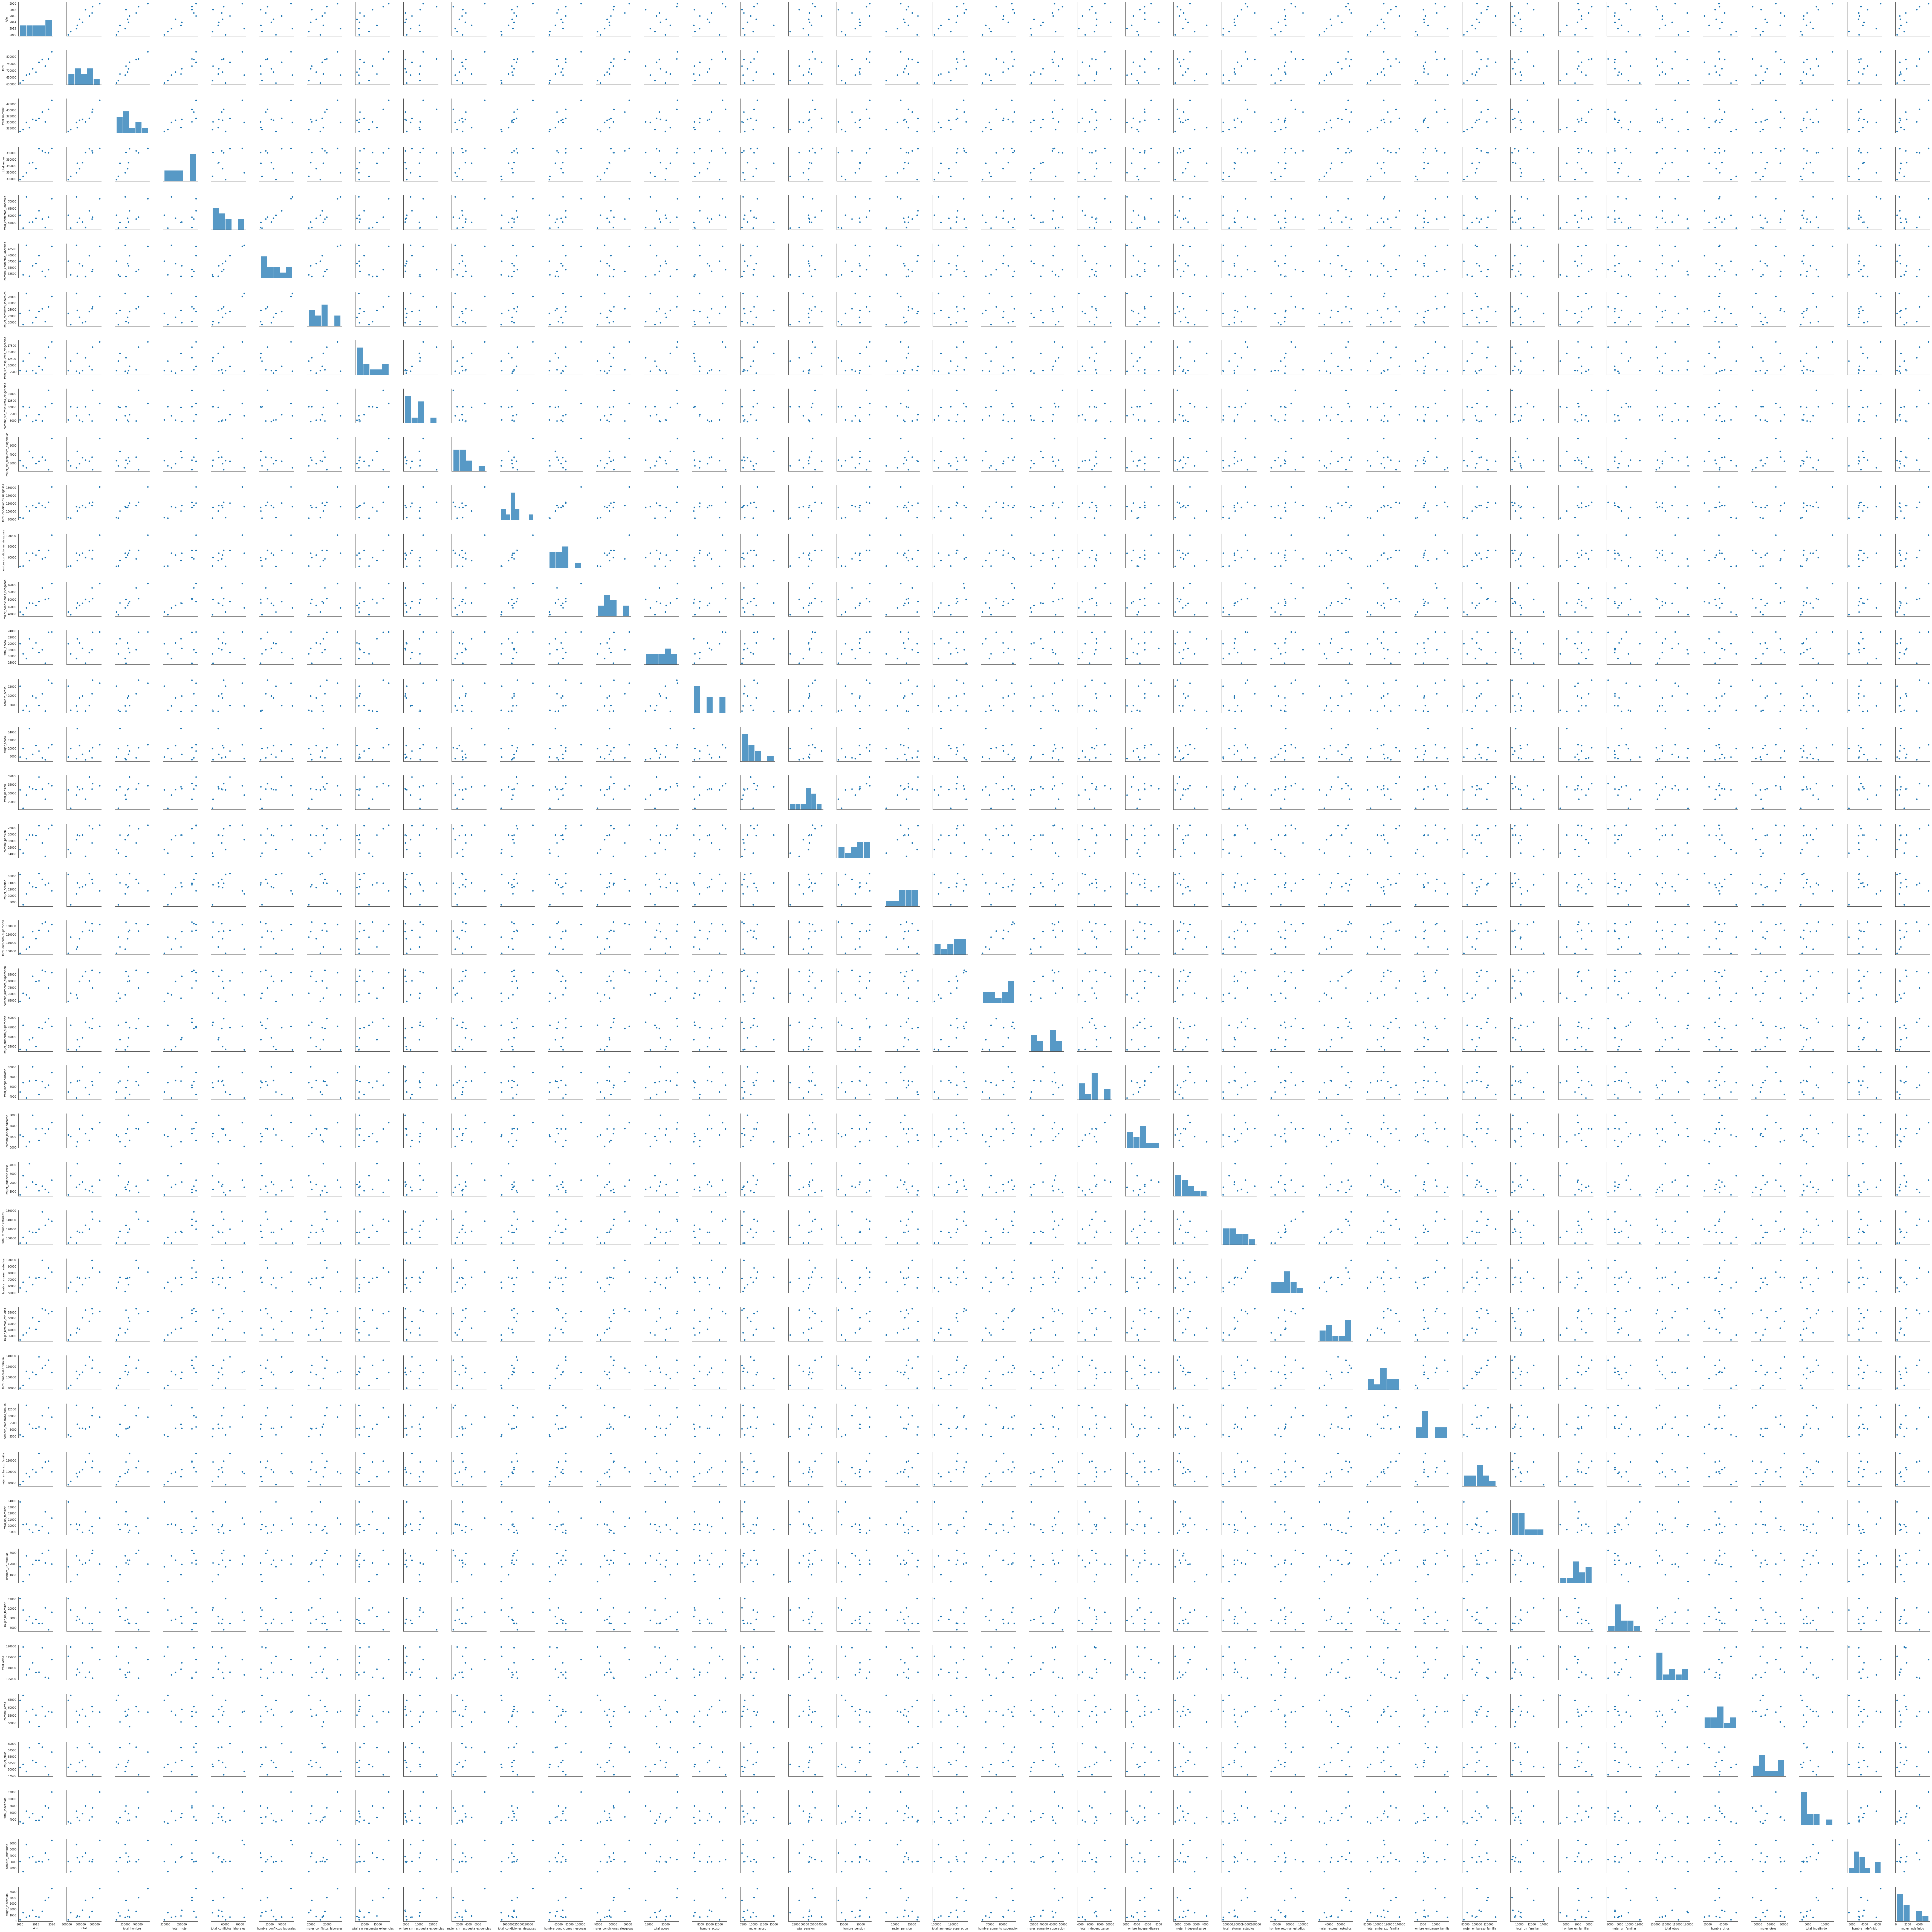

In [ ]:
sns.pairplot(df);

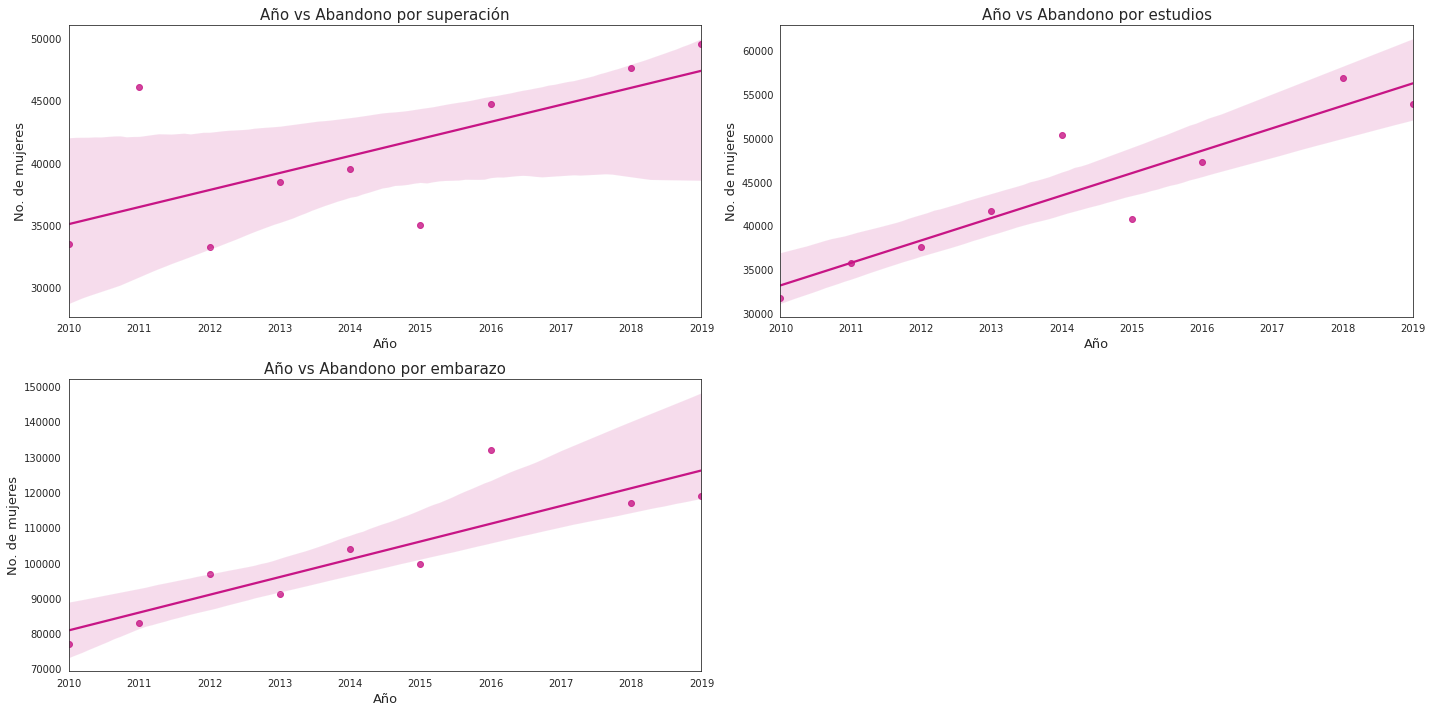

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ax = sns.regplot(x="Año", y="mujer_aumento_superacion", data=df_out, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Año vs Abandono por superación', fontsize=15)
ax.set( xlabel='Año', 
    ylabel='No. de mujeres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.subplot(2,2,2)
ax = sns.regplot(x="Año", y="mujer_retomar_estudios", data=df_out, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Año vs Abandono por estudios', fontsize=15)
ax.set( xlabel='Año', 
    ylabel='No. de mujeres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.subplot(2,2,3)
ax = sns.regplot(x="Año", y="mujer_embarazo_familia", data=df_out, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Año vs Abandono por embarazo', fontsize=15)
ax.set( xlabel='Año', 
    ylabel='No. de mujeres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.tight_layout()

La eliminacion de outliers benefició en las correlaciones con los años, pero no en el resto, por lo que solo se utilizará la base filtrada en los primeros tres gráficos. 

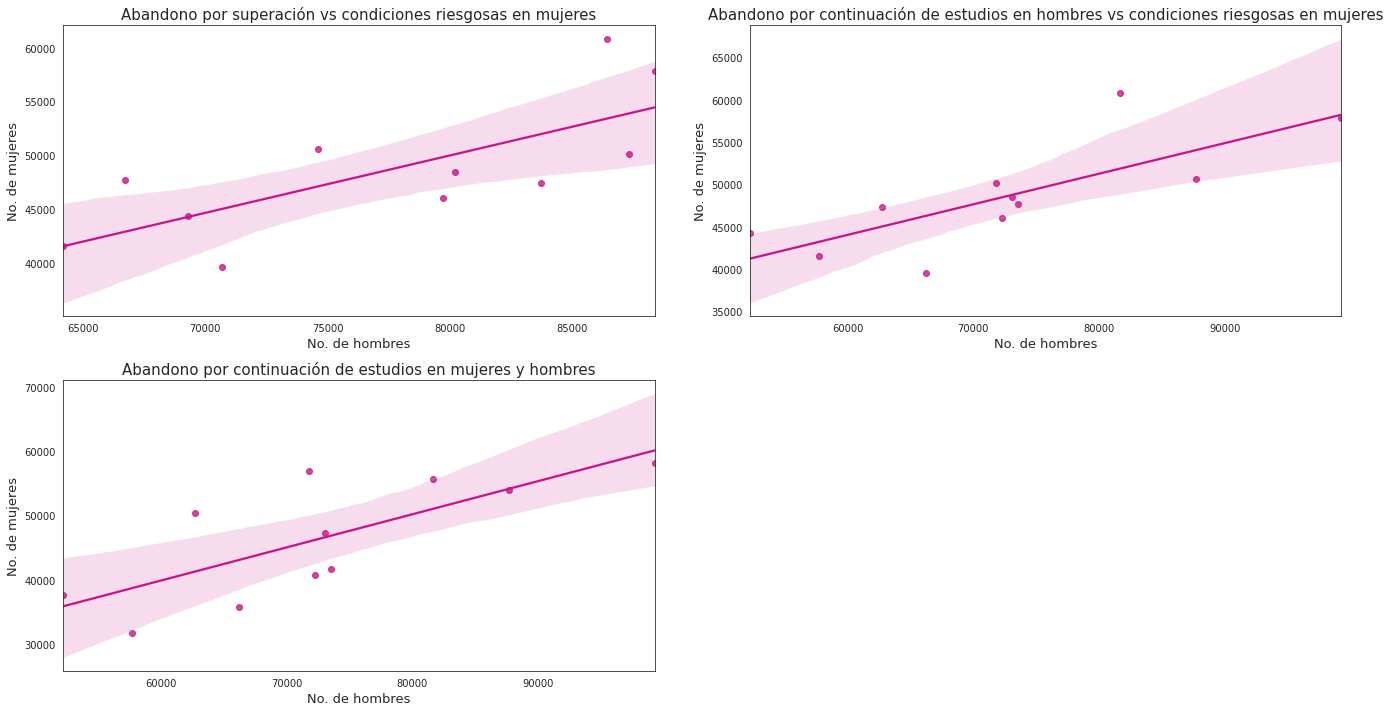

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ax = sns.regplot(x="hombre_aumento_superacion", y="mujer_condiciones_riesgosas", data=df_filtrado, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Abandono por superación vs condiciones riesgosas en mujeres', fontsize=15)
ax.set( xlabel='No. de hombres', 
    ylabel='No. de mujeres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.subplot(2,2,2)
ax = sns.regplot(x="hombre_retomar_estudios", y="mujer_condiciones_riesgosas", data=df_filtrado, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Abandono por continuación de estudios en hombres vs condiciones riesgosas en mujeres',fontsize=15)
ax.set( xlabel='No. de hombres', 
    ylabel='No. de mujeres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.subplot(2,2,3)
ax = sns.regplot(x="hombre_retomar_estudios", y="mujer_retomar_estudios", data=df_filtrado, ci=95, color="mediumvioletred", fit_reg=True)
ax.set_title('Abandono por continuación de estudios en mujeres y hombres',fontsize=15)
ax.set( xlabel='No. de hombres', 
    ylabel='No. de mujeres')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.tight_layout()

6. Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()


In [ ]:
lr.fit(df_out['Año'].to_frame(), df_out['mujer_aumento_superacion'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:

y_predict = lr.predict(df_out['Año'].to_frame())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


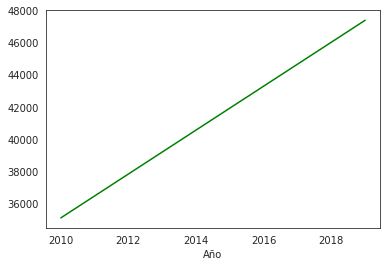

In [ ]:
sns.lineplot(df_out['Año'], y_predict, color='g');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


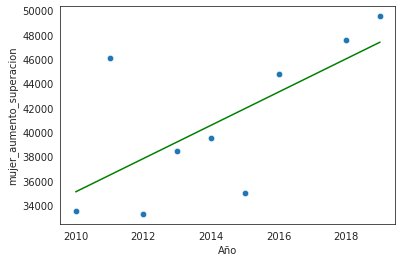

In [ ]:
sns.scatterplot(df_out['Año'], df['mujer_aumento_superacion'], s=40);
sns.lineplot(df_out['Año'], y_predict, color='g');

In [ ]:
lr.score(df_out['Año'].to_frame(), df_out['mujer_aumento_superacion'])

0.4466766614510802

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.8373752619049883

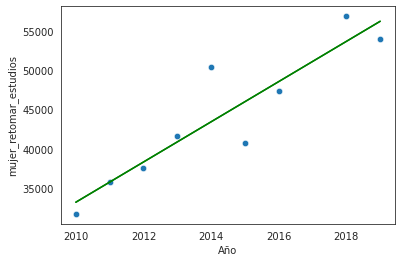

In [ ]:
lr.fit(df_out['Año'].to_frame(), df_out['mujer_retomar_estudios'])
y_predict = lr.predict(df_out['Año'].to_frame())
sns.lineplot(df_out['Año'], y_predict, color='g');
sns.scatterplot(df_out['Año'], df_out['mujer_retomar_estudios'], s=40);
sns.lineplot(df_out['Año'], y_predict, color='g');
lr.score(df_out['Año'].to_frame(), df_out['mujer_retomar_estudios'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.7492586385032312

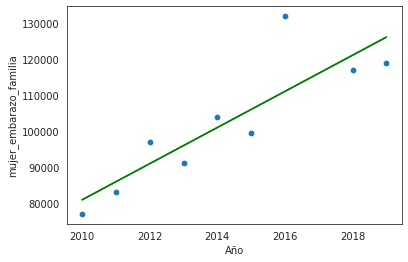

In [ ]:
lr.fit(df_out['Año'].to_frame(), df_out['mujer_embarazo_familia'])
y_predict = lr.predict(df_out['Año'].to_frame())
sns.lineplot(df_out['Año'], y_predict, color='g');
sns.scatterplot(df_out['Año'], df_out['mujer_embarazo_familia'], s=40);
sns.lineplot(df_out['Año'], y_predict, color='g');
lr.score(df_out['Año'].to_frame(), df_out['mujer_embarazo_familia'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.541673418515248

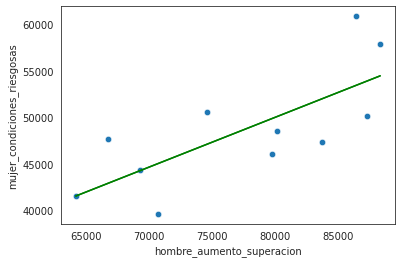

In [ ]:
lr.fit(df_filtrado['hombre_aumento_superacion'].to_frame(), df_filtrado['mujer_condiciones_riesgosas'])
y_predict = lr.predict(df_filtrado['hombre_aumento_superacion'].to_frame())
sns.lineplot(df_filtrado['hombre_aumento_superacion'], y_predict, color='g');
sns.scatterplot(df_filtrado['hombre_aumento_superacion'], df_filtrado['mujer_condiciones_riesgosas'], s=40);
sns.lineplot(df_filtrado['hombre_aumento_superacion'], y_predict, color='g');
lr.score(df_filtrado['hombre_aumento_superacion'].to_frame(), df_filtrado['mujer_condiciones_riesgosas'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.5844459416572054

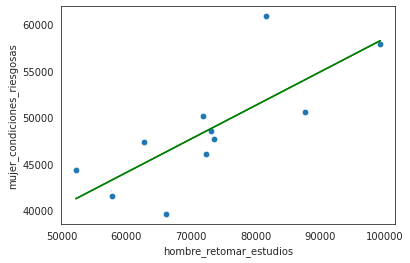

In [ ]:
lr.fit(df_filtrado['hombre_retomar_estudios'].to_frame(), df_filtrado['mujer_condiciones_riesgosas'])
y_predict = lr.predict(df_filtrado['hombre_retomar_estudios'].to_frame())
sns.lineplot(df_filtrado['hombre_retomar_estudios'], y_predict, color='g');
sns.scatterplot(df_filtrado['hombre_retomar_estudios'], df_filtrado['mujer_condiciones_riesgosas'], s=40);
sns.lineplot(df_filtrado['hombre_retomar_estudios'], y_predict, color='g');
lr.score(df_filtrado['hombre_retomar_estudios'].to_frame(), df_filtrado['mujer_condiciones_riesgosas'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.5505411445125057

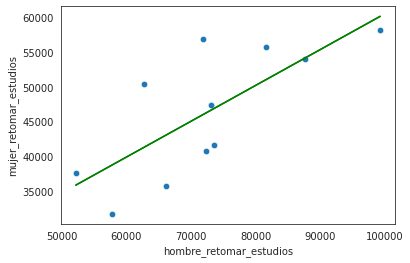

In [ ]:
lr.fit(df_filtrado['hombre_retomar_estudios'].to_frame(), df_filtrado['mujer_retomar_estudios'])
y_predict = lr.predict(df_filtrado['hombre_retomar_estudios'].to_frame())
sns.lineplot(df_filtrado['hombre_retomar_estudios'], y_predict, color='g');
sns.scatterplot(df_filtrado['hombre_retomar_estudios'], df_filtrado['mujer_retomar_estudios'], s=40);
sns.lineplot(df_filtrado['hombre_retomar_estudios'], y_predict, color='g');
lr.score(df_filtrado['hombre_retomar_estudios'].to_frame(), df_filtrado['mujer_retomar_estudios'])

Los mejores modelos resultaron los del aumento de mujeres que abandonan sus empleos para retomar sus estudios (R2= 0.83) o por embarazo (R2 =0.74) a través de los años.

### Ingresos: Salarios Mínimos

#####Heatmap-Correlación

Text(0.5, 0.98, 'Correlación: Salarios de Mujeres a Nivel Nacional')

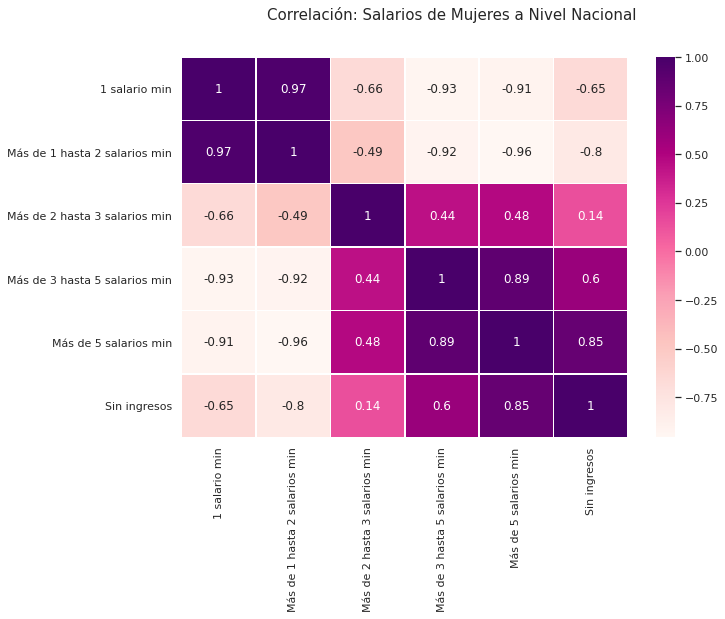

In [ ]:
# heatmap inicial para observar la correlación
plt.figure(figsize=(10,7))
sns.heatmap(heatmap_salarios_corr.corr(), annot=True, cmap="RdPu", linewidths=.5)
plt.suptitle('Correlación: Salarios de Mujeres a Nivel Nacional', fontsize=15)

A pesar de que los colores ya brindaban cierta informaicón acerca de los salarios para mujeres, el nivel de correlación nos da un vistazo un poco más profundo debido a que la correlación como tal no es perfecta de hehco hasta existe negativa.

#####Pairplots

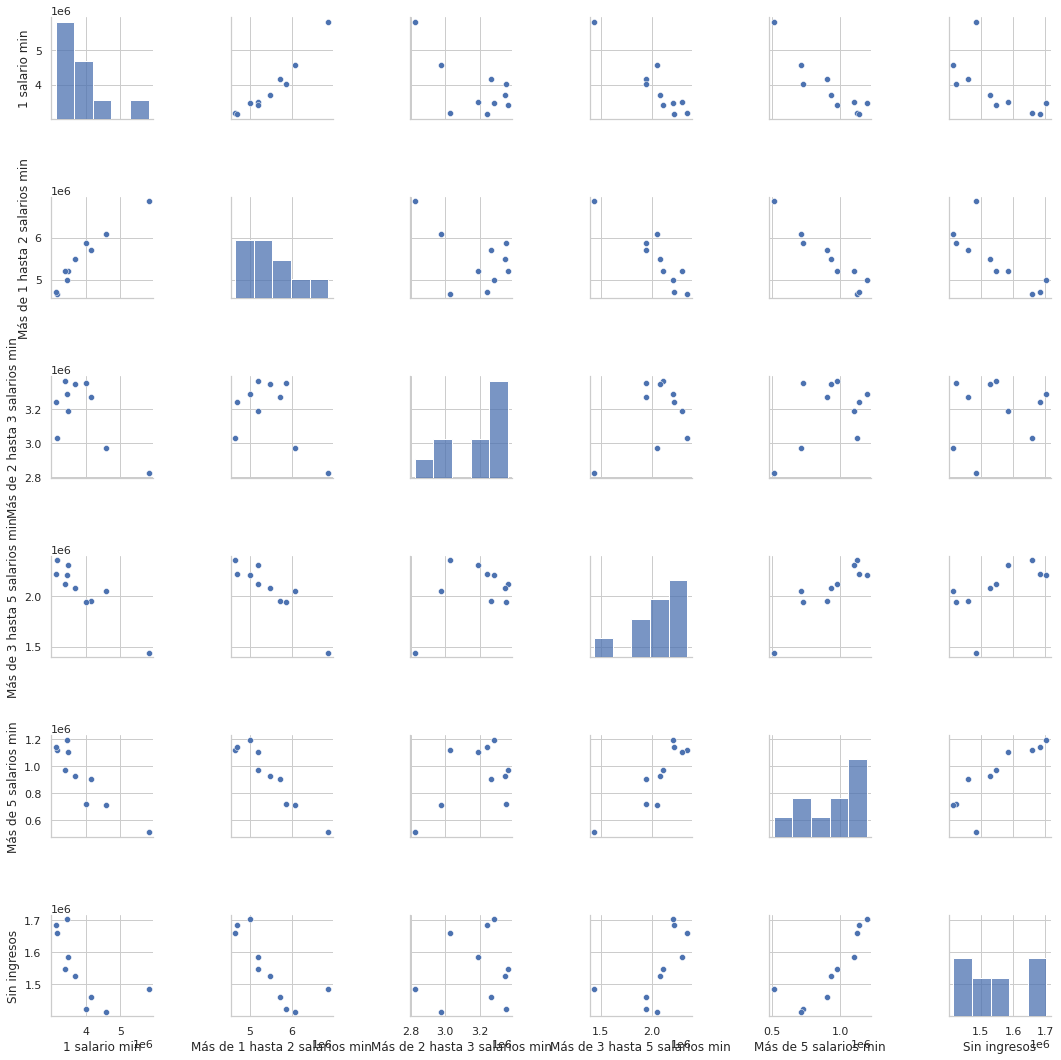

In [ ]:
#Los valores de la correlación vistos en los Heatmap se observan mejor con las siguientes gráficas (pairplot)
sns.pairplot(heatmap_salarios)

Como podemos ver la correlaicón es muy dispareja  con respetco al acercamiento de la recta

### Prestaciones Laborales

#### Matriz de Correlaciones

Text(0.5, 0.98, 'Correlación: Prestaciones para las Mujeres a Nivel Nacional')

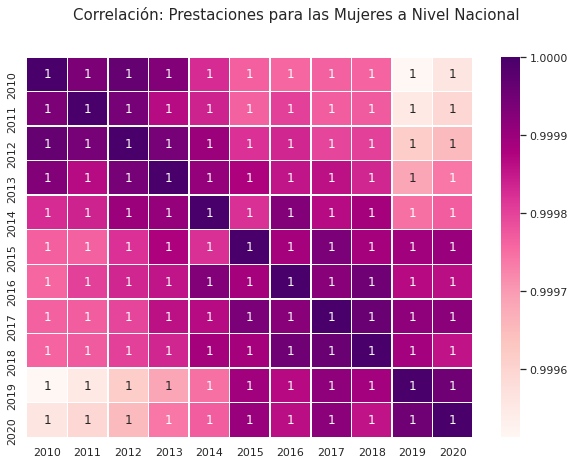

In [ ]:
#Utilizaremos los datos del heatmap del principio para observar la correlación
plt.figure(figsize=(10,7))
sns.heatmap(prestaciones_M_1er_T.corr(), annot=True, cmap="RdPu", linewidths=.5)
plt.suptitle('Correlación: Prestaciones para las Mujeres a Nivel Nacional', fontsize=15)

Text(0.5, 0.98, 'Correlación: Prestaciones para las Hombres a Nivel Nacional')

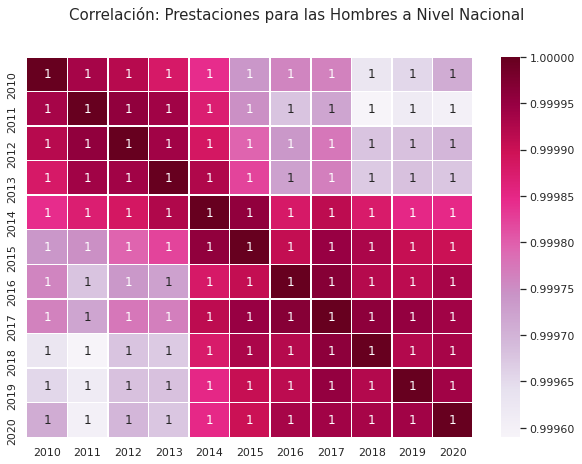

In [ ]:
#Haremos esto con el dataset de los Hombres para ver la diferencia
plt.figure(figsize=(10,7))
sns.heatmap(prestaciones_H_1er_T.corr(), annot=True, cmap="PuRd", linewidths=.5)
plt.suptitle('Correlación: Prestaciones para las Hombres a Nivel Nacional', fontsize=15)

Al no ser un cambio tan alto, todos los datos son 1, pero con los colores es facil percibir el cambio entre cada correlación de los datos.
Relacionado a los datos, encontramos algo nuevo al compararlos, el cambio ha sido más alto para las mujeres que a los hombres.

#### Pairplots

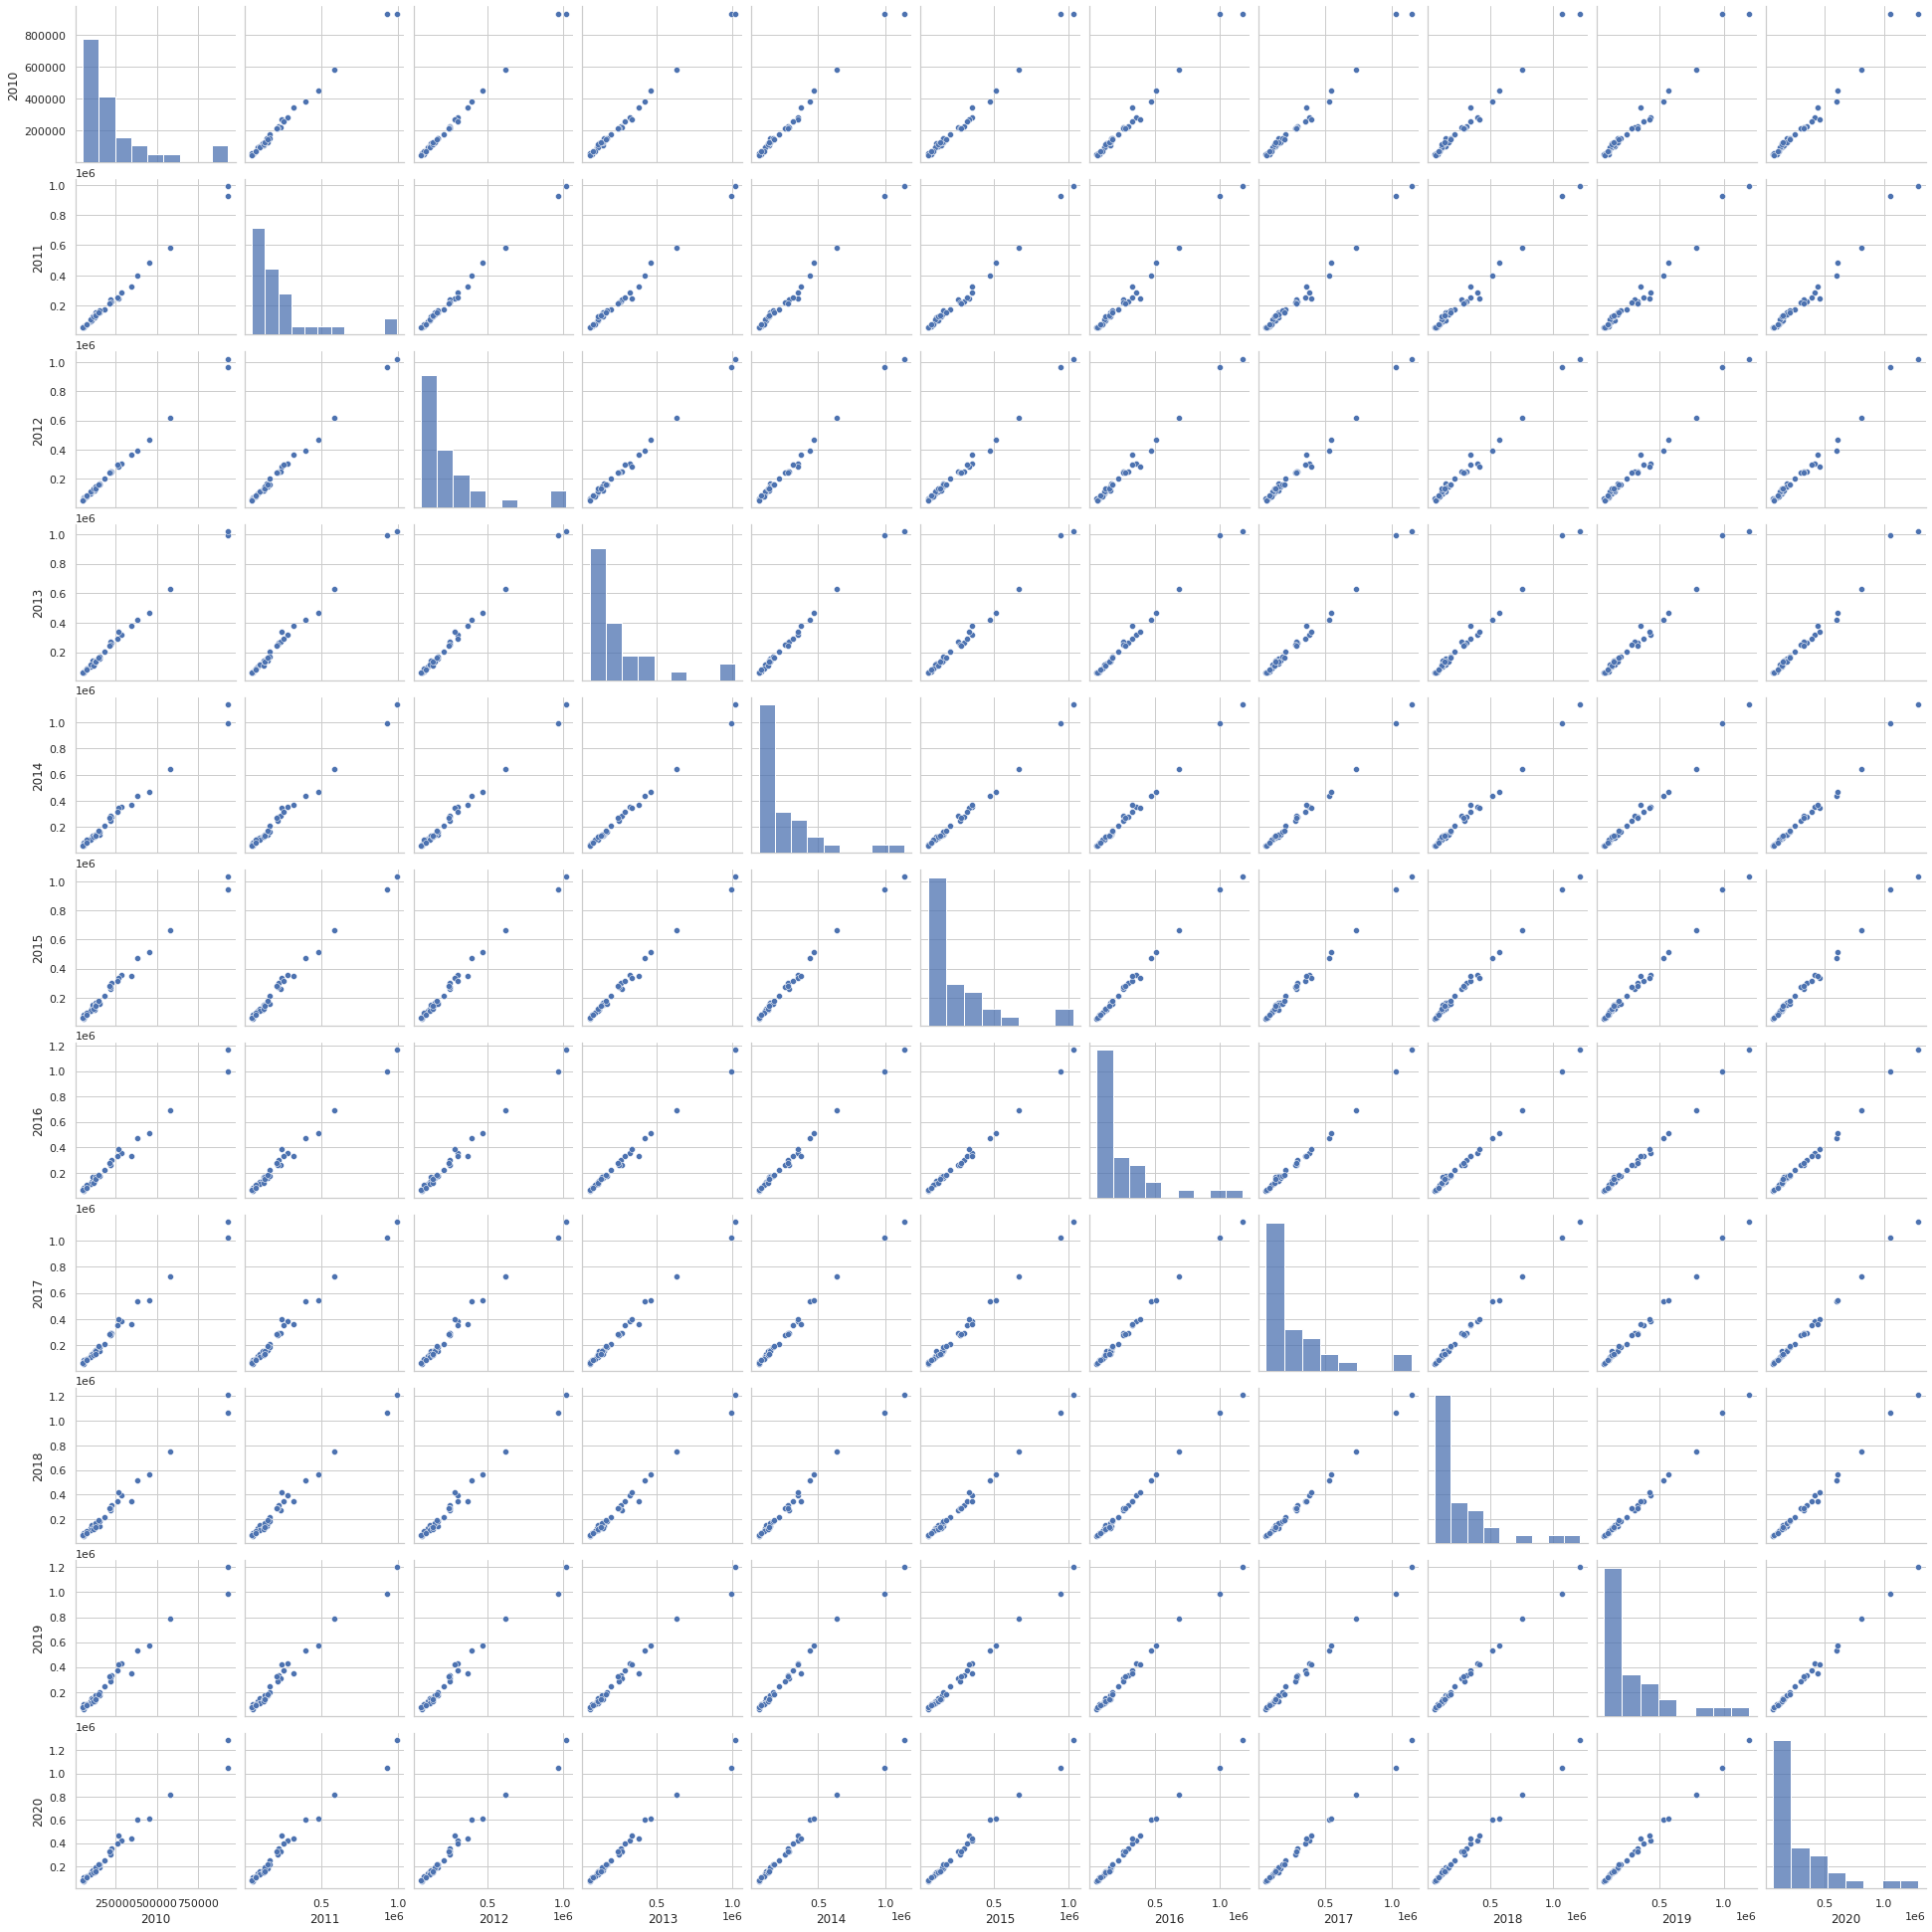

In [ ]:
#Los valores (1) anteriores de los Heatmap se observa mejor con las siguientes grpaficas
sns.pairplot(prestaciones_M_1er_T.drop('Nacional', axis=0))

Existe un aumento anual, y una correlación donde la mayoria de los datos se acercan a la recta de regresión.

#### Graficas de Dispersión

In [ ]:
#Relizamos transpuesta a la base de datos de Prestaciones para las Mujeres, esto permite trabajar mejor con los datos.
transpuesta_prestaciones_M = prestaciones_M_1er_T.drop(['Entidades'], axis=1)
transpuesta_prestaciones_M = transpuesta_prestaciones_M.T.sort_values('Nacional', ascending=False).drop(['Nacional'], axis=1)
transpuesta_prestaciones_M.index = pd.to_datetime(transpuesta_prestaciones_M.index)
transpuesta_M_10_max =transpuesta_prestaciones_M[['Mexico', 'Ciudad de Mexico','Jalisco', 'Nuevo Leon', 'Guanajuato', 'Veracruz de Ignacio de la Llave','Chihuahua', 'Baja California', 'Tamaulipas', 'Coahuila de Zaragoza']]
transpuesta_M_10_min =transpuesta_prestaciones_M[['Durango','Oaxaca','Aguascalientes','Morelos','Nayarit','Campeche','Tlaxcala', 'Colima', 'Baja California Sur', 'Zacatecas']]

Text(0.5, 8.959999999999994, 'Año')

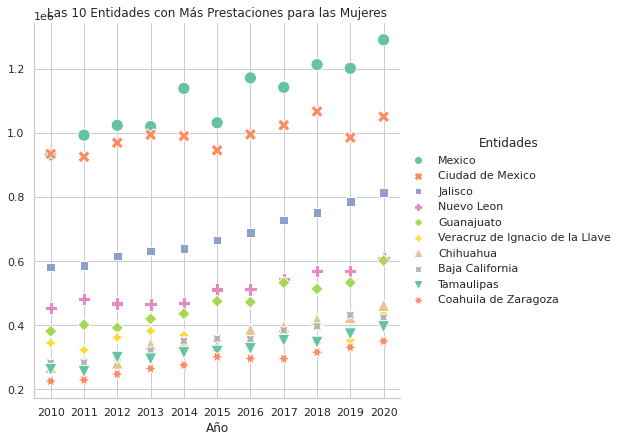

In [ ]:
#Se decide usar relplor en vez de scatterplot, ya que acomoda la grafica para visualizarla mejor
sns.relplot(data=transpuesta_M_10_max, s=150, palette="Set2", height=6)
plt.title('Las 10 Entidades con Más Prestaciones para las Mujeres')
plt.xlabel('Año')

Text(0.5, 8.959999999999994, 'Año')

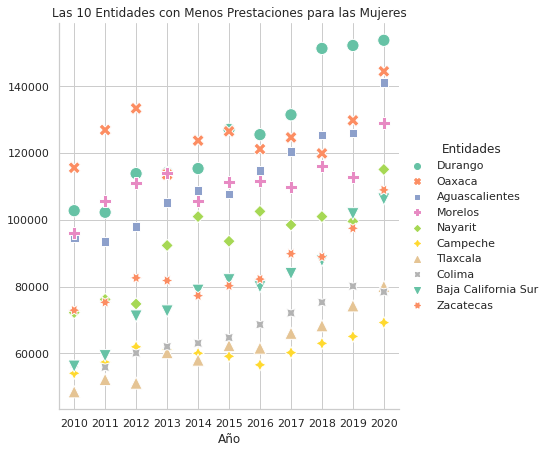

In [ ]:
sns.relplot(data=transpuesta_M_10_min, s=150, palette="Set2", height=6)
plt.title('Las 10 Entidades con Menos Prestaciones para las Mujeres')
plt.xlabel('Año')

Observamos la correlación entre los estados que más y menos cambios han tenido al proporcionar prestaciones a las mujeres. En los estados donde hubo más, se visualiza el cambio con los años, el como suben los datos anualmente es en escalera, incluso se percibe mejor cuales son los estados que más han proporcionado, el estado de México y la Ciudad de México; mientras que en los estados con menores cambios, podemos ver que por razones externas, suelen tener subidas y bajadas como lo es Campeche y Oaxaca.

#### Regresion Lineal Simple

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


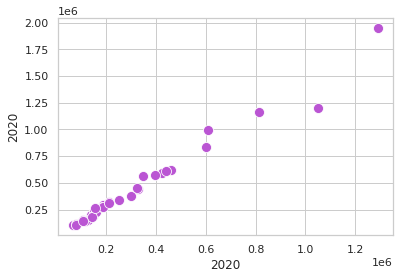

In [ ]:
#Esta vez se realiza una correlación de los datos del año 2020 para ver si existe una correlación entre hombres y mujeres
sns.scatterplot(prestaciones_M_1er_T_snN['2020'], prestaciones_H_1er_T_snN['2020'], s=100, color='mediumorchid')

In [ ]:
lr = LinearRegression()

lr.fit(prestaciones_M_1er_T_snN['2020'].to_frame(), prestaciones_H_1er_T_snN['2020'])

y_predict = lr.predict(prestaciones_M_1er_T_snN['2020'].to_frame())

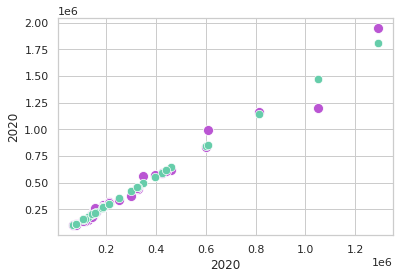

In [ ]:
sns.scatterplot(x=prestaciones_M_1er_T_snN['2020'], y = prestaciones_H_1er_T_snN['2020'], s=100, color='mediumorchid')
sns.scatterplot(x=prestaciones_M_1er_T_snN['2020'], y = y_predict, s=70, color = 'mediumaquamarine')

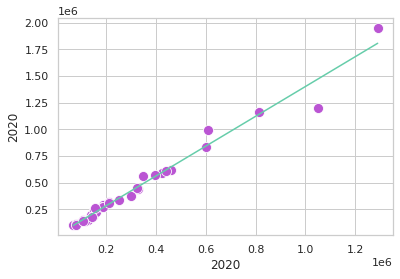

In [ ]:
sns.scatterplot(x=prestaciones_M_1er_T_snN['2020'], y = prestaciones_H_1er_T_snN['2020'], s=100, color='mediumorchid')
sns.lineplot(x=prestaciones_M_1er_T_snN['2020'], y = y_predict, color = 'mediumaquamarine')

In [ ]:
print(f'Coeficiente', lr.coef_[0])
print(f'Escalar', lr.intercept_)

Coeficiente 1.3988497103005462
Escalar 3455.122624128766


## <font color=Deeppink> **5 Distribuciones muestrales y técnicas de evaluación de modelos** </font>

**OBJETIVO**

* Explorar las distribuciones muestrales de estadísticas de las variables numéricas en nuestro dataset
* Practicar el entrenamiento de modelos de Regresión Lineal Múltiple

**REQUISITOS**

Tener un dataset que contenga variables numéricas

**DESARROLLO**

En este Postwork vamos a analizar la incertidumbre y los sesgos que existen en las medidas de locación y dispersión de nuestras variables numéricas. También vamos a practicar el entrenamiento de modelos de Regresión Lineal Múltiple, aunque eso no sea el objetivo de tu proyecto. Realiza los siguientes pasos:

1. Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.
2. Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:

* La distribución, su asimetría y curtosis
* El error estándar
* El intervalo de confianza que te parezca más apropiado

3. Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.
4. Comparte con tus compañeros y la experta tus hallazgos.

### Motivos de Abandono del empleo

#### Boostrap

In [ ]:
estudios = df_filtrado['mujer_retomar_estudios']

means = []

for i in range(100_000):
    sample = estudios.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


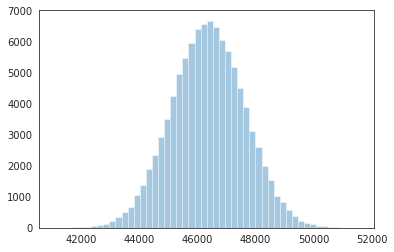

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

In [ ]:
serie_means.kurtosis()
serie_means.skew()

-0.010620245071521405

In [ ]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 1255.8744724741775


In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {estudios.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 43891.222499999996 < 46355.63636363636 < 48807.6635


a) La distribución: paramétrica , su asimetría: -0.013 y curtosis: -0.019

b) El error estándar: 1255.64

c) El intervalo de confianza que te parezca más apropiado: Intervalo de 95% confianza de la media: 43892.61 < 46355.63 < 48813.12

In [ ]:
embarazo = df_filtrado['mujer_embarazo_familia']

means = []

for i in range(100_000):
    sample = embarazo.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


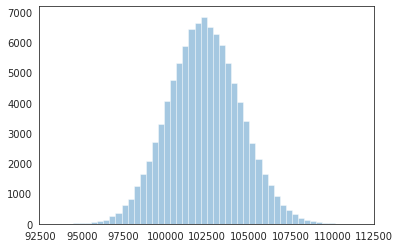

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

In [ ]:
serie_means.kurtosis()

-0.01441115268343518

In [ ]:
serie_means.skew()

0.044944616914438226

In [ ]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 2162.6522164190183


In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {embarazo.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 98139.089 < 102316.54545454546 < 106615.1


a) La distribución: paramétrica , su asimetría: -0.014 y curtosis: 0.044

b) El error estándar: 2162.65

c) El intervalo de confianza que te parezca más apropiado: Intervalo de 95% confianza de la media: 98139.089 < 102316.54545454546 < 106615.1

3. Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.

El tamaño muestral es demasiado pequeño como para dividir la base de datos y probar los modelos.

### Salarios Mínimos

#####Boostrap

In [ ]:
boos_promedio = promedio_salarios
means = []

for i in range(100_000):
    sample = boos_promedio.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_boos = pd.Series(means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


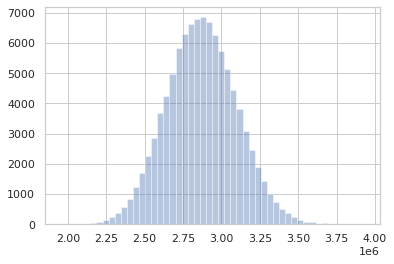

In [ ]:
sns.distplot(serie_boos, kde=False, norm_hist=False);

In [ ]:
print(f'Error estandar: {serie_boos.std()}')

Error estandar: 227480.19862162383


In [ ]:
limite_inferior = serie_boos.quantile(0.025)
limite_superior = serie_boos.quantile(0.975)

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {boos_promedio.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 2429848.148333333 < 2868458.8131313133 < 3319505.486818181


### Prestaciones Laborales

#### Boostrap

In [ ]:
boos_2010_M = prestaciones_M_1er_T_snN['2010']
meanss = []

for i in range(100_000):
    samples = boos_2010_M.sample(n=50, replace=True)
    meanss.append(samples.mean())
    
serie_boos_2010 = pd.Series(meanss)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


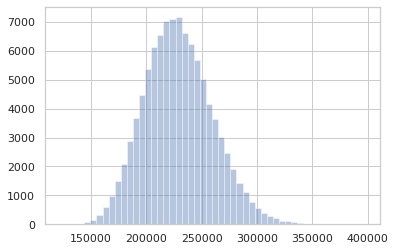

In [ ]:
sns.distplot(serie_boos_2010, kde=False, norm_hist=False)

In [ ]:
print(f'Asimetria {serie_boos_2010.skew()}')
print(f'Curtosis {serie_boos_2010.kurtosis()}')
print(f'Error estandar: {serie_boos_2010.std()}')
print(f'Valor mínimo: {serie_boos_2010.min()}')
print(f'Valor máximo: {serie_boos_2010.max()}')
print(f'Rango: {serie_boos_2010.max() - serie_boos_2010.min()}')

Asimetria 0.3055367421538167
Curtosis 0.09088685379879236
Error estandar: 30885.086475091135
Valor mínimo: 122037.04
Valor máximo: 396948.64
Rango: 274911.60000000003


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


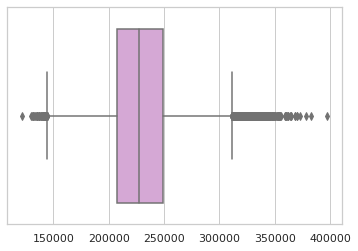

In [ ]:
sns.boxplot(serie_boos_2010, color='plum')

Intervalo de 95% confianza de la media: 173128.16650000002 < 228943.68047100081 < 293271.60349999997
Intervalo de 95% confianza de la media: 228943.68047100081 +/- 60071.71849999997


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


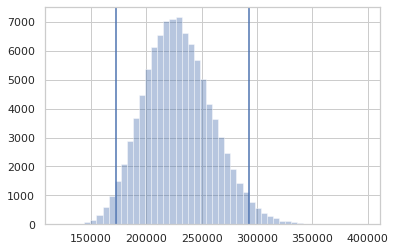

In [ ]:
limite_inferio = serie_boos_2010.quantile(0.025)
limite_superio = serie_boos_2010.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {limite_inferio} < {serie_boos_2010.mean()} < {limite_superio}')

mean_of_intervals = ((serie_boos_2010.mean() - limite_inferio) + (limite_superio - serie_boos_2010.mean())) / 2
print(f'Intervalo de 95% confianza de la media: {serie_boos_2010.mean()} +/- {mean_of_intervals}')
sns.distplot(serie_boos_2010, kde=False, norm_hist=False)
plt.axvline(limite_inferio)
plt.axvline(limite_superio)

In [ ]:
boos_2020_M = prestaciones_M_1er_T_snN['2020']
means = []

for i in range(100_000):
    sample = boos_2020_M.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_boos = pd.Series(means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


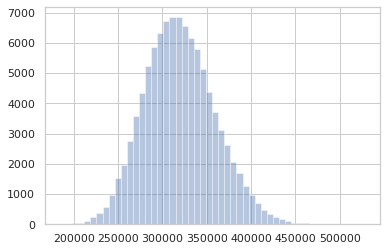

In [ ]:
sns.distplot(serie_boos, kde=False, norm_hist=False)

In [ ]:
print(f'Asimetria {serie_boos.skew()}')
print(f'Curtosis {serie_boos.kurtosis()}')
print(f'Error estandar: {serie_boos.std()}')
print(f'Valor mínimo: {serie_boos.min()}')
print(f'Valor máximo: {serie_boos.max()}')
print(f'Rango: {serie_boos.max() - serie_boos.min()}')

Asimetria 0.2654411368934268
Curtosis 0.034445614956431836
Error estandar: 39738.36106483599
Valor mínimo: 184246.22
Valor máximo: 527804.24
Rango: 343558.02


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


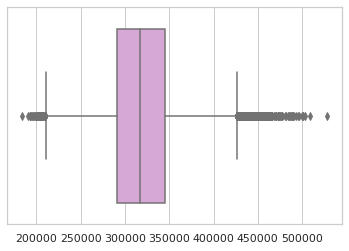

In [ ]:
sns.boxplot(serie_boos, color='plum')

Sin realizar boostrap, la curtosis era de casi el doble de lo que se obtiene ahora, cosa que en cierto punto predijo.

Intervalo de 95% confianza de la media: 246865.806 < 319156.03807260114 < 401724.3264999999
Intervalo de 95% confianza de la media: 319156.03807260114 +/- 77429.26024999995


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


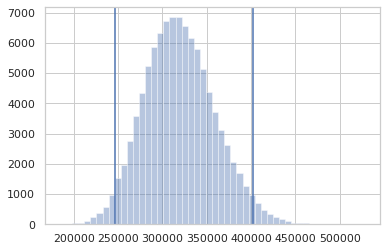

In [ ]:
limite_inferior = serie_boos.quantile(0.025)
limite_superior = serie_boos.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {serie_boos.mean()} < {limite_superior}')

mean_of_intervals = ((serie_boos.mean() - limite_inferior) + (limite_superior - serie_boos.mean())) / 2
print(f'Intervalo de 95% confianza de la media: {serie_boos.mean()} +/- {mean_of_intervals}')
sns.distplot(serie_boos, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior)

## <font color=Deeppink>**6 Visualización de Datos Avanzada** </font>

**OBJETIVO**

* Realizar nuevos tipos de gráficas que nos ayuden a explorar y entender mejor nuestros datos
* Estilizar nuestras gráficas para que sean agradables a la vista y llamen la atención

**REQUISITOS**

Tener un dataset limpio

**DESARROLLO**

En esta sesión conocimos muchos nuevos tipos de gráficas que nos ayudan a explorar y entender con más detalle nuestros datos. Ojalá y hayas percibido el poder tan grande que tienen las visualizaciones y la variedad tan enorme que existe. Cada visualización tiene sus ventajas y desventajas, sus características específicas, y es importante conocerlas bien para poder elegir la gráfica adecuada para cada momento. Revisa con detenimiento si hay alguna buena razón para utilizar en tu proyecto alguna de las gráficas que aprendimos hoy. Aquí hay un pequeño 'cheat sheet' para tomar estas decisiones:

1. Si hay relaciones jerárquicas que quieras hacer claras o si quieres explorar las proporciones de una variable numérica agrupada en múltiples niveles utiliza un treemap.
2. Si quieres explorar la relación entre dos variables numéricas divididas por una variable categórica, utiliza scatterplots por categorías o scatterplots con variables condicionantes.
3. Si quieres explorar la relación entre dos variables numéricas pero tu dataset es tan grande que es imposible definir las densidades de tus datos, utiliza un binning hexagonal.
4. Si quieres explorar datos geográficos, como definir regiones o puntos en un mapa o visualizar una variable numérica que puede segmentarse por regiones geográficas, utiliza un mapa cloroplético.
5. Si quieres explorar una variable numérica agrupada en dos niveles por variables categóricas, utiliza una gráfica de barras apiladas.

Si quieres conocer más gráficas para aplicarlas a tu proyecto, puedes visitar el siguiente Notebook. Este Notebok contiene alrededor de 80 gráficas distintas elaboradas con matplotlib y otras librerías de visualización de Python. Explora el Notebook y si encuentras alguna gráfica que te pueda ser de utilidad consulta con tu experta para saber cómo aplicarla.

### Motivos de Abandono del empleo

In [ ]:
df_sex = pd.read_csv('https://raw.githubusercontent.com/FanyEstAg/Team-12-Proyecto-M4/main/DataSets/df_sexo.csv', index_col = 0)

In [ ]:
import plotly.express as px

In [ ]:

sns.scatterplot(df_sex['Año'], df_sex['retomar_estudios'], hue=df_sex['Sexo']);


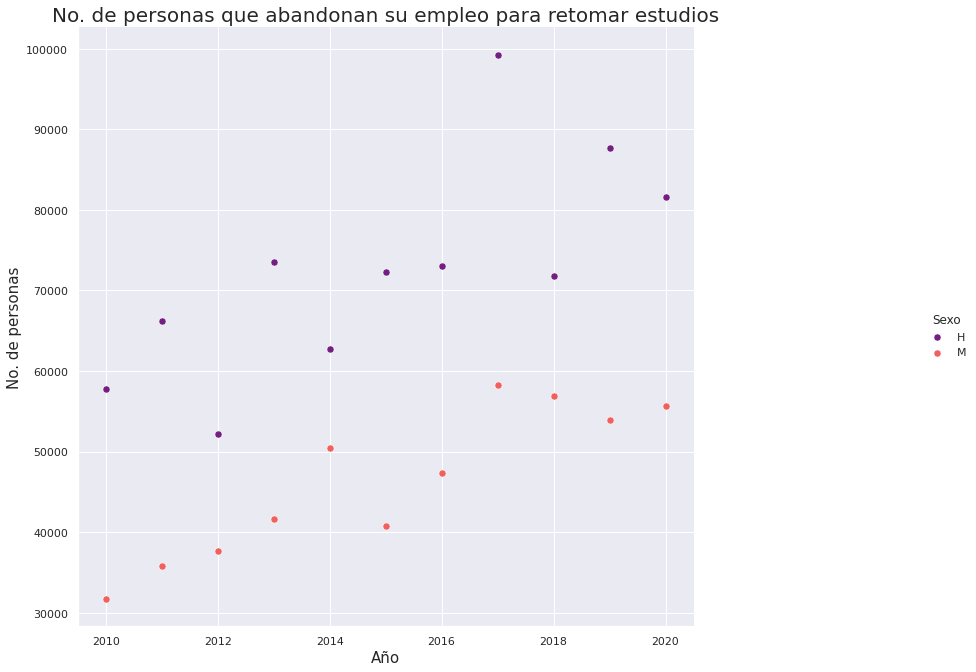

In [ ]:

kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(df_sex, hue="Sexo", palette="magma")
g = g.map(plt.scatter, "Año", "retomar_estudios", **kws).add_legend().set_axis_labels("Año", "No. de personas", fontsize = 15)
plt.title("No. de personas que abandonan su empleo para retomar estudios", fontsize = 20)
g.fig.set_figwidth(20)
g.fig.set_figheight(11.7)

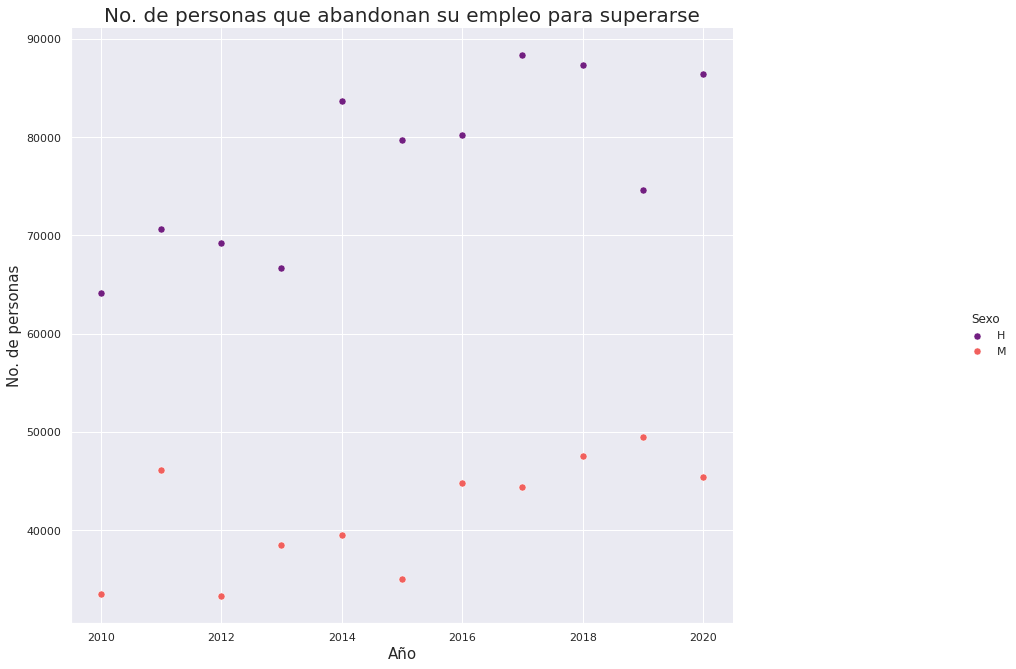

In [ ]:
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(df_sex, hue="Sexo", palette="magma")
g = g.map(plt.scatter, "Año", "aumento_superacion", **kws).add_legend().set_axis_labels("Año", "No. de personas", fontsize = 15)
plt.title("No. de personas que abandonan su empleo para superarse", fontsize = 20)
g.fig.set_figwidth(20)
g.fig.set_figheight(11.7)

### Ingresos: Salarios Mínimos

#####Grafica de barras apiladas

A continuación una grafica de barras apiladas con el fin de percibir de mejor manera el crecimiento o disminución existente cada 5 años a partir de 2010 referente a los salarios mínimos de las mujeres.

Text(0, 0.5, 'Cantidad de mujeres')

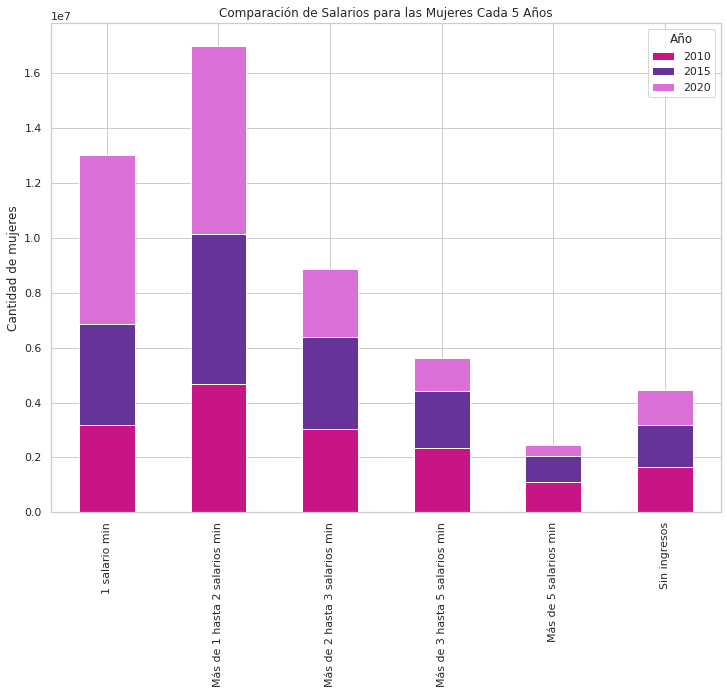

In [ ]:
plot_comp = df_salario_plot.iloc[:-2,[0,5,10]].plot.bar(stacked=True, figsize=(12, 9), color= ['mediumvioletred','rebeccapurple','orchid'], align='center')

for rect in plot_comp.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

plt.title('Comparación de Salarios para las Mujeres Cada 5 Años')
plt.ylabel('Cantidad de mujeres')

Del mismo modo, a continuación de muestra una grafica de barras apiladas acerca del aumento o dismunución de los salarios que ganan las muejeres a lo largo de la decada del 2010, cada 3 años.
Podemos observar como el indice de "1  hasta 2 salarios minimos" es el más destacado en todos lo años y como el indice de "5 o más salarios" ha disminuido.

In [ ]:
plot_comp = df_salario_plot.iloc[:-2,[0,3,6,9]].plot.barh(stacked=True, figsize=(10, 7), color= ['mediumvioletred','rebeccapurple','orchid',"hotpink", "purple"], align='center')

for rect in plot_comp.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

plt.title('Comparación de Salarios para las Mujeres Cada 5 Años')
plt.xlabel('Cantidad de mujeres')

## <font color=Deeppink> **7 Procesamiento de Lenguaje Natural** </font>

**OBJETIVO**

Aplicar los conceptos de Procesamiento de Lenguaje Natural aprendidos en esta sesión a nuestro proyecto


**REQUISITOS**

* Tener un dataset limpio que contenga una columna con datos no estructurados.

<font color=4CABD9 size= 3 face="Courier"><blockquote> En caso de que tu dataset no contenga datos no estructurados, date una vuelta por Kaggle y busca algún dataset apropiado. Lo que nos interesa en que practiques estas herramientas durante la clase para que puedas expresarle tus dudas a la experta. </blockquote></font>

**DESARROLLO**

En esta sesión aprendimos dos cosas: Pruebas A/B y Procesamiento de Lenguaje Natural. No podemos practicar Pruebas A/B en nuestro proyecto, porque en realidad los proyectos que estamos realizando no se prestan a esto. No pasa nada, ¡ya tendrás oportunidad de practicar eso en tu primer trabajo como científico de datos!

Por lo pronto en este Postwork vamos a practicar las técnicas de Procesamiento de Lenguaje Natural que hemos aprendido. Si tu dataset no contiene datos no estructurados, busca un dataset apropiado y realiza los siguientes ejercicios. Si tu dataset contiene datos no estructurados, entonces éste es el momento de agregar PLN a tu proyecto.

Realiza los siguientes procedimientos en caso de que apliquen a tu dataset:

1. Utiliza patrones Regex para limpiar tus datos estructurados
2. Dado que debes de conocer bien tu dataset (excepto si es un nuevo dataset que buscaste para este Postwork), es probable que tengas una idea de las palabras que son relevantes para tu tema. Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método similar para obtener palabras que tengan contextos similares a las palabras originales. Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.
3. Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.
4. Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.
5. Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.
6. Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
7. Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.

#### IWD Dataset

Se procede a importar un nuevo dataset que contiene los tweets que se enviaron en relación al Día Internacional De La Mujer (International Woman Day iwd ) obtenido de Kaggle, debido a que los anteriores datasets no presentaban datos no estructurados.

In [ ]:
df_tweets_iwd = pd.read_csv("https://raw.githubusercontent.com/FanyEstAg/Team-12-Proyecto-M4/main/DataSets/IWD_clean2.csv", sep = ',', encoding='utf-8' , index_col = 0)
df_tweets_iwd.head()

replyToUID  ... latitude
id                          ...         
1.368900e+18  5.705148e+07  ...      NaN
1.368900e+18  1.325510e+18  ...      NaN
1.368900e+18  1.247980e+18  ...      NaN
1.368900e+18  1.410116e+08  ...      NaN
1.368900e+18  1.437265e+08  ...      NaN

[5 rows x 11 columns]

In [ ]:
#Redefinicion del index
df_tweets_iwd_c=df_tweets_iwd.reset_index()
df_tweets_iwd_c.head()

id    replyToUID  ... longitude  latitude
0  1.368900e+18  5.705148e+07  ...       NaN       NaN
1  1.368900e+18  1.325510e+18  ...       NaN       NaN
2  1.368900e+18  1.247980e+18  ...       NaN       NaN
3  1.368900e+18  1.410116e+08  ...       NaN       NaN
4  1.368900e+18  1.437265e+08  ...       NaN       NaN

[5 rows x 12 columns]

In [ ]:
#Obtención de los tweets 
df_tweets_iwd_t = df_tweets_iwd_c['text']
df_tweets_iwd_t

0       Listen to an experimental podcast recorded by ...
1           @NeverTrumperok Happy #InternationalWomensDay
2       @Shameer_PPP_ @FaryalTalpurPk @AqrabaFatima @B...
3       I could go on, but my point here is the things...
4       @HospitalHinduja My di @PampaDutta11<U+2764><U...
                              ...                        
1855    Our second influential woman to be featured in...
1856    "You belong here." Nana Adae @jpmorgan speaks ...
1857    7. What else should be in the #FemGND? &gt;&gt...
1858    @BioInnovate_Ire @IrishMedtech @nuigalway @EI_...
1859    Not only that, this is seriously ill-timed bec...
Name: text, Length: 1860, dtype: object

In [ ]:
#Busqueda de patron en los tweets
df_tweets_iwd_t.str.contains('woman')

0       False
1       False
2       False
3       False
4        True
        ...  
1855     True
1856    False
1857    False
1858    False
1859    False
Name: text, Length: 1860, dtype: bool

In [ ]:
#Visualización de los Tweets con la palabra 'woman'
df_tweets_iwd_t[df_tweets_iwd_t.str.contains('woman', case=True)]

4       @HospitalHinduja My di @PampaDutta11<U+2764><U...
35      @LongwoodOma @longwoodu congratulation super w...
98      @ShazzBakes Another hypocrite! Being nasty to ...
100     And of course, to my unstoppable wife and favo...
101     Some other inspirational woman who I love so m...
152     I #ChooseToChallenge unspoken blind side of ho...
190     Laverne Cox is an American actor, who became t...
192     Sally Ride was an American astronaut and engin...
224     @visshnumittal “A woman is like a tea bag – yo...
248     We will continue to work hard to reveal the mi...
339     @anshisharma_man Happy woman's Day <U+0001F60D...
347     @SpainMFA @sanchezdiaz_p A #hazara ethnicity w...
348     @visshnumittal “A woman is like a tea bag – yo...
413     We are sending our love to all women and women...
417     @DiorBirima @kan_fore I am speaking to the wor...
424     But in our generation, a woman’s essence may v...
433     On the issues of #STEM workers, Shane shares t...
462     @kucoi

##### REGEX
Se procede a quitar los nombres de los usuarios etiquetados y los números para conservar el contenido del texto del tweet.

In [ ]:
#Antes de Limpieza con REGEX
df_tweets_iwd_t[df_tweets_iwd_t.str.contains('\@[a-zA-Z0-9]*')]


1           @NeverTrumperok Happy #InternationalWomensDay
2       @Shameer_PPP_ @FaryalTalpurPk @AqrabaFatima @B...
4       @HospitalHinduja My di @PampaDutta11<U+2764><U...
5       @moving_classics Happy #InternationalWomensDay...
6       @BoyleMo It's all in the genes. Now I know whe...
                              ...                        
1850    @WHCOS Good mental health is essential to over...
1851    @OctoberBones @Davorka1965774 @silicasun @Kace...
1854    @LordMcLugo @KirstySNP Two research questions ...
1856    "You belong here." Nana Adae @jpmorgan speaks ...
1858    @BioInnovate_Ire @IrishMedtech @nuigalway @EI_...
Name: text, Length: 1261, dtype: object

In [ ]:
#Despues de Limpieza con REGEX
df_tweets_iwd_t = df_tweets_iwd_t.str.replace('\@[a-zA-Z0-9]*','')
df_tweets_iwd_t

0       Listen to an experimental podcast recorded by ...
1                           Happy #InternationalWomensDay
2        _PPP_    _Qadir_Patel  … https://t.co/gxRzwgFUvf
3       I could go on, but my point here is the things...
4        My di <U+2764><U+FE0F>  is the  inspiring wom...
                              ...                        
1855    Our second influential woman to be featured in...
1856    "You belong here." Nana Adae  speaks about emb...
1857    7. What else should be in the #FemGND? &gt;&gt...
1858            _Ire   _HPSU    … https://t.co/VBAkI0LZoN
1859    Not only that, this is seriously ill-timed bec...
Name: text, Length: 1860, dtype: object

In [ ]:
#Validación de la limpieza exitosa de las personas etiquetadas con @
df_tweets_iwd_t[df_tweets_iwd_t.str.contains('@')]

Series([], Name: text, dtype: object)

In [ ]:
df_tweets_iwd_t[df_tweets_iwd_t.str.contains('\d[a-zA-Z0-9]*')]

0       Listen to an experimental podcast recorded by ...
3       I could go on, but my point here is the things...
4        My di <U+2764><U+FE0F>  is the  inspiring wom...
5       _classics Happy #InternationalWomensDay <U+000...
6        It's all in the genes. Now I know where you g...
                              ...                        
1854      Two research questions for you. What % of pr...
1855    Our second influential woman to be featured in...
1856    "You belong here." Nana Adae  speaks about emb...
1857    7. What else should be in the #FemGND? &gt;&gt...
1858            _Ire   _HPSU    … https://t.co/VBAkI0LZoN
Name: text, Length: 1398, dtype: object

In [ ]:
df_tweets_iwd_t = df_tweets_iwd_t.str.replace('\d[a-zA-Z0-9]*','')
df_tweets_iwd_t

0       Listen to an experimental podcast recorded by ...
1                           Happy #InternationalWomensDay
2        _PPP_    _Qadir_Patel  … https://t.co/gxRzwgFUvf
3       I could go on, but my point here is the things...
4        My di <U+><U+FE>  is the  inspiring woman of ...
                              ...                        
1855    Our second influential woman to be featured in...
1856    "You belong here." Nana Adae  speaks about emb...
1857    . What else should be in the #FemGND? &gt;&gt;...
1858                 _Ire   _HPSU    … https://t.co/VBAkI
1859    Not only that, this is seriously ill-timed bec...
Name: text, Length: 1860, dtype: object

In [ ]:
df_tweets_iwd_t[df_tweets_iwd_t.str.contains('\d')]

Series([], Name: text, dtype: object)

In [ ]:
#Se procede a quitar las direcciones de páginas web
df_tweets_iwd_t[df_tweets_iwd_t.str.contains('https')]

0       Listen to an experimental podcast recorded by ...
2        _PPP_    _Qadir_Patel  … https://t.co/gxRzwgFUvf
3       I could go on, but my point here is the things...
4        My di <U+><U+FE>  is the  inspiring woman of ...
6        It's all in the genes. Now I know where you g...
                              ...                        
1855    Our second influential woman to be featured in...
1856    "You belong here." Nana Adae  speaks about emb...
1857    . What else should be in the #FemGND? &gt;&gt;...
1858                 _Ire   _HPSU    … https://t.co/VBAkI
1859    Not only that, this is seriously ill-timed bec...
Name: text, Length: 1373, dtype: object

In [ ]:
df_tweets_iwd_t = df_tweets_iwd_t.str.replace('https\.[a-zA-Z0-9]*','')
df_tweets_iwd_t

0       Listen to an experimental podcast recorded by ...
1                           Happy #InternationalWomensDay
2        _PPP_    _Qadir_Patel  … https://t.co/gxRzwgFUvf
3       I could go on, but my point here is the things...
4        My di <U+><U+FE>  is the  inspiring woman of ...
                              ...                        
1855    Our second influential woman to be featured in...
1856    "You belong here." Nana Adae  speaks about emb...
1857    . What else should be in the #FemGND? &gt;&gt;...
1858                 _Ire   _HPSU    … https://t.co/VBAkI
1859    Not only that, this is seriously ill-timed bec...
Name: text, Length: 1860, dtype: object

In [ ]:
df_tweets_iwd_t[df_tweets_iwd_t.str.contains('https')]

0       Listen to an experimental podcast recorded by ...
2        _PPP_    _Qadir_Patel  … https://t.co/gxRzwgFUvf
3       I could go on, but my point here is the things...
4        My di <U+><U+FE>  is the  inspiring woman of ...
6        It's all in the genes. Now I know where you g...
                              ...                        
1855    Our second influential woman to be featured in...
1856    "You belong here." Nana Adae  speaks about emb...
1857    . What else should be in the #FemGND? &gt;&gt;...
1858                 _Ire   _HPSU    … https://t.co/VBAkI
1859    Not only that, this is seriously ill-timed bec...
Name: text, Length: 1373, dtype: object

In [ ]:
df_tweets_iwd_t = df_tweets_iwd_t.str.replace('\#|\<|\>|\;|\!|\,|\.|\;|\&|\|\/|\_|\“|\+|\?|\(|\:|\-|\…|\/|\)|\`\`|\'\'','')
df_tweets_iwd_t = df_tweets_iwd_t.str.lower()
df_tweets_iwd_t = df_tweets_iwd_t.str.strip()

##### Text Tokenize

In [ ]:
#Tokenizador
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
token_iwd=df_tweets_iwd_t.apply(nltk.word_tokenize)

In [ ]:
token_iwd

0       [listen, to, an, experimental, podcast, record...
1                         [happy, internationalwomensday]
2                        [ppp, qadirpatel, tcogxrzwgfuvf]
3       [i, could, go, on, but, my, point, here, is, t...
4       [my, di, uufe, is, the, inspiring, woman, of, ...
                              ...                        
1855    [our, second, influential, woman, to, be, feat...
1856    [``, you, belong, here, '', nana, adae, speaks...
1857    [what, else, should, be, in, the, femgnd, gtgt...
1858                                [ire, hpsu, tcovbaki]
1859    [not, only, that, this, is, seriously, illtime...
Name: text, Length: 1860, dtype: object

In [ ]:
#Objeto Text
palabras_iwd=token_iwd.sum()
palabras_iwd

['listen',
 'to',
 'an',
 'experimental',
 'podcast',
 'recorded',
 'by',
 'artist',
 'shenece',
 'oretha',
 'for',
 'hyperfunctionalultrahealthy',
 'exploring',
 'sou',
 'tcoag',
 'happy',
 'internationalwomensday',
 'ppp',
 'qadirpatel',
 'tcogxrzwgfuvf',
 'i',
 'could',
 'go',
 'on',
 'but',
 'my',
 'point',
 'here',
 'is',
 'the',
 'things',
 'that',
 'make',
 'you',
 'not',
 'fall',
 'in',
 'line',
 'with',
 '‘',
 'traditional',
 'office',
 'culture',
 '’',
 'are',
 'tcohgsh',
 'my',
 'di',
 'uufe',
 'is',
 'the',
 'inspiring',
 'woman',
 'of',
 'my',
 'life',
 'her',
 'work',
 'and',
 'struggle',
 'always',
 'motivate',
 'tcovs',
 'classics',
 'happy',
 'internationalwomensday',
 'u',
 'it',
 "'s",
 'all',
 'in',
 'the',
 'genes',
 'now',
 'i',
 'know',
 'where',
 'you',
 'get',
 'your',
 'good',
 'looks',
 'from',
 'lovely',
 'family',
 'photos',
 'maureen',
 'amp',
 'your',
 'tcorsab',
 'tcoqnnmudz',
 'today',
 'is',
 'our',
 'moment',
 'to',
 'celebrate',
 'all',
 'the',
 'dif

In [ ]:
text_iwd=nltk.Text(palabras_iwd)
text_iwd.concordance('woman',lines=20)

Displaying 20 of 56 matches:
 tcohgsh my di uufe is the inspiring woman of my life her work and struggle alw
t tcoeazqzgilic congratulation super woman shayla betts internationalwomensday 
y another hypocrite being nasty to a woman then celebrating womenwow internatio
 to my unstoppable wife and favorite woman of all time robaina who fills our fa
ith lov tco some other inspirational woman who i love so much internationalwome
 of how to conduct my lifestyle as a woman '' adeyinka adekeye tco and to my fa
o became the first known transgender woman to appear on the cover of time magaz
gineer who became the first american woman to travel to space in tcorvwgqbf wom
rs nurses and medical tcojhgruzdps a woman is like a tea bag – you never know h
 to reveal the mistreatment to every woman in the world happy women 's day inte
nternationalwomensday lucy man happy woman 's day u uufe internationalwomensday
o the first presenter of the bbc ’ s woman ’ s hour in alan ivimey a specialist
r end up st

##### Similar
Tomamos las similitudes de contexto de uso en las palabras mujer y hombre.

In [ ]:
text_iwd.similar('woman')

women day man point line tco ladies need love world thing initiative
chance name lot first strong challenge same right


In [ ]:
text_iwd.similar('man')

woman women happy line thing great day chance year lot student sister
mission shoutout callout guide gift crime reminder tcoquclvpmiod


##### Contextos

In [ ]:
text_iwd.common_contexts(['woman','man'])

a_who a_to


In [ ]:
text_iwd.common_contexts(['woman'])

inspiring_of super_shayla a_then favorite_of inspirational_who
a_adeyinka transgender_to american_to a_is every_in happy_day s_s
ethnicity_in a_you senegal_was a_s a_takes little_anymore a_so
talented_quite


In [ ]:
text_iwd.common_contexts(['man'])

international_day a_who lucy_happy young_shot the_who one_that
whiteprivilege_on a_to a_internationalwomensday


In [ ]:
text_iwd.common_contexts(['violence'])

of_against end_against women_against of_is chose_on uufeuufe_against
encouraging_against


In [ ]:
text_iwd.common_contexts(['rights'])

your_demand human_defender lgbt_campaigner lesbian_activist
women_wearing and_just fundamental_as respect_and what_could women_day
s_histor human_empowering their_tcofsf women_tcotkoy for_in
their_internationalwomensday human_work s_acce labor_groups equal_for


In [ ]:
#Total de palabras analizadas
len(text_iwd)

25391

In [ ]:
#Total de palabras UNICAS analizadas
len(set(text_iwd))

5972

In [ ]:
#El porcentaje de palabras unicas respecto del total es:
(len(set(text_iwd))/len(text_iwd))*100

23.520144933244065

##### StopWords

In [ ]:
#Descarga de paquete
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text_iwd.collocations(num=88)

happy internationalwomensday; international women; mental health;
happy international; good morning; global nthengwe; overall wellbeing;
gender equality; poor mental; listening happyinternationalwomensday;
joined zimrights; role model; united states; upmost respect;
internalizing mental; mental illnesses; particularly exposed;
daughters speaking; daw aung; iwd iwd; weak leader; better place;
internationalwomensday iwd; lasting peace; peace lasting; stemworkers
face; ladies listening; alaska marine; marine science; science
symposium; leader daw; peace dignity; every day; greater risk;
standing strong; challenges stemworkers; peerj congratulates; days
since; nthengwe movement; want peace; uuuu uuu; wisdom sophia;
economic factors; true leader; brilliant inspiring; tco happy; san
suu; suu kyi; good mental; day internationalwomensday; movement org;
peerj award; tumitv episode; specifically women; right back; aung san;
human rights; iwd brilliant; uufeuufeuufe justinisaac; incredible
women;

##### FreqDist
Procedemos a analizar la distrbución de frecuencia de nuestras palabras

In [ ]:
from nltk.probability import ConditionalFreqDist
from nltk.tokenize import word_tokenize

In [ ]:
freq_dist_iwd= nltk.FreqDist(palabras_iwd)
print(freq_dist_iwd)

<FreqDist with 5972 samples and 25391 outcomes>


In [ ]:
freq_dist_iwd.most_common(50)

[('the', 858),
 ('internationalwomensday', 797),
 ('to', 708),
 ('and', 628),
 ('women', 510),
 ('of', 503),
 ('a', 457),
 ('you', 389),
 ('in', 364),
 ('happy', 356),
 ('for', 298),
 ('is', 287),
 ('i', 262),
 ('on', 242),
 ('tco', 228),
 ('we', 211),
 ('’', 203),
 ('this', 195),
 ('that', 181),
 ('are', 175),
 ('all', 161),
 ('my', 154),
 ('our', 154),
 ("'s", 150),
 ('as', 142),
 ('day', 139),
 ('it', 135),
 ('s', 135),
 ('u', 134),
 ('with', 131),
 ('who', 126),
 ('have', 116),
 ('not', 102),
 ('so', 100),
 ('her', 98),
 ('at', 96),
 ('she', 93),
 ('an', 89),
 ('your', 88),
 ('amp', 88),
 ('thank', 87),
 ('by', 85),
 ('be', 83),
 ('from', 80),
 ('me', 79),
 ('more', 73),
 ('iwd', 67),
 ('can', 66),
 ('about', 65),
 ('was', 65)]

In [ ]:
#ELIMINANDO LAS STOP WORDS
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in palabras_iwd if word not in english_stop_words]

freq_dist_idw_no_sw = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
#Para calcular las frecuencias sin las palabras vacías
mas_comunes_50=freq_dist_idw_no_sw.most_common(50)
mas_comunes_50

[('internationalwomensday', 797),
 ('women', 510),
 ('happy', 356),
 ('tco', 228),
 ('’', 203),
 ("'s", 150),
 ('day', 139),
 ('u', 134),
 ('amp', 88),
 ('thank', 87),
 ('iwd', 67),
 ('``', 62),
 ('international', 58),
 ('woman', 56),
 ('us', 56),
 ('one', 56),
 ('love', 55),
 ('also', 54),
 ('today', 52),
 ('uu', 51),
 ('work', 49),
 ("n't", 47),
 ('good', 45),
 ('amazing', 44),
 ('great', 41),
 ('celebrate', 40),
 ('like', 40),
 ('world', 38),
 ('make', 37),
 ('uuu', 36),
 ('many', 34),
 ('rights', 33),
 ("''", 33),
 ('much', 30),
 ('thanks', 30),
 ('know', 29),
 ('female', 29),
 ("'re", 28),
 ('need', 28),
 ('choosetochallenge', 28),
 ('first', 28),
 ('inspiring', 27),
 ('always', 27),
 ('people', 27),
 ('health', 27),
 ('uufe', 26),
 ('support', 26),
 ('would', 26),
 ('mental', 26),
 ('strong', 25)]

In [ ]:
mas_comunes_50

[('internationalwomensday', 797),
 ('women', 510),
 ('happy', 356),
 ('tco', 228),
 ('’', 203),
 ("'s", 150),
 ('day', 139),
 ('u', 134),
 ('amp', 88),
 ('thank', 87),
 ('iwd', 67),
 ('``', 62),
 ('international', 58),
 ('woman', 56),
 ('us', 56),
 ('one', 56),
 ('love', 55),
 ('also', 54),
 ('today', 52),
 ('uu', 51),
 ('work', 49),
 ("n't", 47),
 ('good', 45),
 ('amazing', 44),
 ('great', 41),
 ('celebrate', 40),
 ('like', 40),
 ('world', 38),
 ('make', 37),
 ('uuu', 36),
 ('many', 34),
 ('rights', 33),
 ("''", 33),
 ('much', 30),
 ('thanks', 30),
 ('know', 29),
 ('female', 29),
 ("'re", 28),
 ('need', 28),
 ('choosetochallenge', 28),
 ('first', 28),
 ('inspiring', 27),
 ('always', 27),
 ('people', 27),
 ('health', 27),
 ('uufe', 26),
 ('support', 26),
 ('would', 26),
 ('mental', 26),
 ('strong', 25)]

In [ ]:
# Conteo de una palabra y porcentaje de aparición

print(f'{(100 * freq_dist_idw_no_sw["woman"] / len(all_words_except_stop_words)):.3f}%')

0.364%


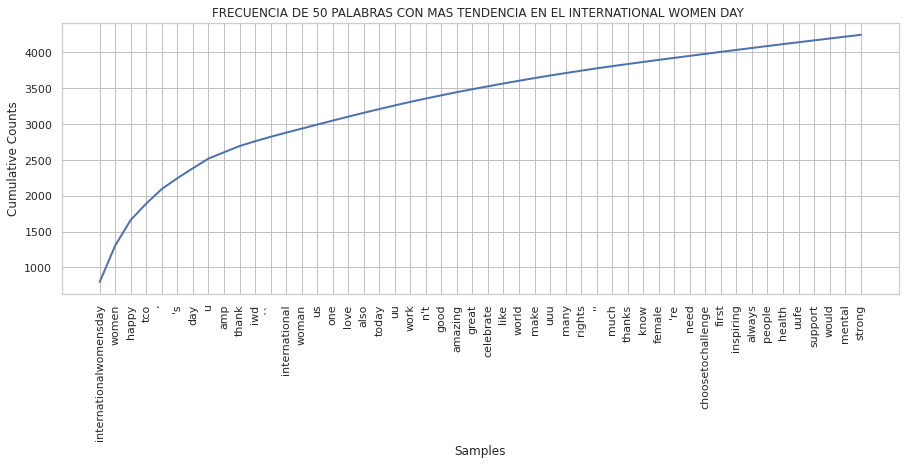

In [ ]:
# Veamos qué proporción del text está siendo ocupada por las 50 palabras más comunes
plt.figure(figsize=(15,5))
plt.title("FRECUENCIA DE 50 PALABRAS CON MAS TENDENCIA EN EL INTERNATIONAL WOMEN DAY ") 

freq_dist_idw_no_sw.plot( 50, cumulative=True );

## <font color=Deeppink> **8 Clasificación No Supervisada y Supervisada** </font>

**OBJETIVO**
 
Aplicar los algoritmos de Clasificación No Supervisada y Supervisada aprendidos en esta sesión a nuestro proyecto

**REQUISITOS**

* Tener un dataset limpio que contenga una variable dependiente binaria.

En caso de que tu dataset no contenga una variable dependiente binaria, date una vuelta por Kaggle y busca algún dataset apropiado. Lo que nos interesa en que practiques estas herramientas durante la clase para que puedas expresarle tus dudas a la experta.

**DESARROLLO**

¡Bienvenid@ a tu último Postwork! En este Postwork haremos dos cosas: practicar la aplicación del algoritmo de Regresión Logística y resolver dudas generales sobre tu proyecto. Realiza los siguientes pasos:

1. Si hay un problema de clasificación binaria en tu proyecto, ¡genial! Aplica lo aprendido en esta sesión y entrena un modelo de Regresión Logística con tu dataset.
2. Si no hay un problema de clasificación binaria en tu proyecto, pídele ayuda a la experta para conseguir un dataset con el que puedas practicar.
3. Evalúa tu modelo de Regresión Logística utilizando matriz de confusión; medidas de precisión, exactitud, sensibilidad y especificidad; y curva ROC / AUC.

#### Tweets IWD
Se pueden apreciar datos de clasificación binaria bajo el campo que nos indica si el Tweet ha sido truncado o no **trncated**

In [ ]:
df_tweets_iwd.head()

replyToUID  ... latitude
id                          ...         
1.368900e+18  5.705148e+07  ...      NaN
1.368900e+18  1.325510e+18  ...      NaN
1.368900e+18  1.247980e+18  ...      NaN
1.368900e+18  1.410116e+08  ...      NaN
1.368900e+18  1.437265e+08  ...      NaN

[5 rows x 11 columns]

In [ ]:
#Creación de dataframe para este análisis
df_tweets_iwd_8 =df_tweets_iwd
df_tweets_iwd_8.head()

replyToUID  ... latitude
id                          ...         
1.368900e+18  5.705148e+07  ...      NaN
1.368900e+18  1.325510e+18  ...      NaN
1.368900e+18  1.247980e+18  ...      NaN
1.368900e+18  1.410116e+08  ...      NaN
1.368900e+18  1.437265e+08  ...      NaN

[5 rows x 11 columns]

In [ ]:
df_tweets_iwd_8.reset_index()

id    replyToUID  ... longitude  latitude
0     1.368900e+18  5.705148e+07  ...       NaN       NaN
1     1.368900e+18  1.325510e+18  ...       NaN       NaN
2     1.368900e+18  1.247980e+18  ...       NaN       NaN
3     1.368900e+18  1.410116e+08  ...       NaN       NaN
4     1.368900e+18  1.437265e+08  ...       NaN       NaN
...            ...           ...  ...       ...       ...
1855  1.370000e+18  2.412377e+09  ...       NaN       NaN
1856  1.370000e+18  3.576616e+07  ...       NaN       NaN
1857  1.370000e+18  7.483281e+07  ...       NaN       NaN
1858  1.370000e+18  2.934127e+09  ...       NaN       NaN
1859  1.370000e+18  1.316680e+18  ...       NaN       NaN

[1860 rows x 12 columns]

In [ ]:
#Apreciamos los valores únicos
df_tweets_iwd_8['truncated'].unique()

array([ True, False])

In [ ]:
df_tweets_iwd_8_c = df_tweets_iwd_8['text'].str.replace('\@[a-zA-Z0-9]*','')
df_tweets_iwd_8_c

id
1.368900e+18    Listen to an experimental podcast recorded by ...
1.368900e+18                        Happy #InternationalWomensDay
1.368900e+18     _PPP_    _Qadir_Patel  … https://t.co/gxRzwgFUvf
1.368900e+18    I could go on, but my point here is the things...
1.368900e+18     My di <U+2764><U+FE0F>  is the  inspiring wom...
                                      ...                        
1.370000e+18    Our second influential woman to be featured in...
1.370000e+18    "You belong here." Nana Adae  speaks about emb...
1.370000e+18    7. What else should be in the #FemGND? &gt;&gt...
1.370000e+18            _Ire   _HPSU    … https://t.co/VBAkI0LZoN
1.370000e+18    Not only that, this is seriously ill-timed bec...
Name: text, Length: 1860, dtype: object

In [ ]:
# Se apolica 1: True y 0:False que indican si ha sido truncado el tweet o no
df_tweets_iwd_8['truncated'] = df_tweets_iwd_8['truncated'].apply(lambda x: 1 if x == True  else 0)
df_tweets_iwd_8.head()

replyToUID  ... latitude
id                          ...         
1.368900e+18  5.705148e+07  ...      NaN
1.368900e+18  1.325510e+18  ...      NaN
1.368900e+18  1.247980e+18  ...      NaN
1.368900e+18  1.410116e+08  ...      NaN
1.368900e+18  1.437265e+08  ...      NaN

[5 rows x 11 columns]

In [ ]:
X = df_tweets_iwd_8.drop(columns=['truncated'])
y = df_tweets_iwd_8['truncated']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
log_reg=LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

ValueError: ignored

In [ ]:
df_tweets_iwd_8[df_tweets_iwd_8['text'].str.contains('\@[a-zA-Z0-9]*')]


replyToUID  ... latitude
id                          ...         
1.368900e+18  1.325510e+18  ...      NaN
1.368900e+18  1.247980e+18  ...      NaN
1.368900e+18  1.437265e+08  ...      NaN
1.368900e+18  3.028182e+09  ...      NaN
1.368900e+18  3.116774e+08  ...      NaN
...                    ...  ...      ...
1.368960e+18  1.351280e+18  ...      NaN
1.368950e+18  7.678020e+17  ...      NaN
1.370000e+18  1.417750e+07  ...      NaN
1.370000e+18  3.576616e+07  ...      NaN
1.370000e+18  2.934127e+09  ...      NaN

[1261 rows x 11 columns]